# Load the libraries

In [1]:
library(data.table);
library(ggplot2);
library(repr)
library(reshape2)
##library(gplots)
library(pheatmap)
library(cowplot)
library(RColorBrewer)
library(sva)
library(ggExtra)
library(gridExtra)
library(grid)
source("helper_functions.R")


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Warning message:
“package ‘sva’ was built under R version 3.6.1”Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Warning message:
“package ‘genefilter’ was built under R version 3.6.1”Loading required package: BiocParallel
Warning message:
“package ‘BiocParallel’ was built under R version 3.6.1”Warning message:
“package ‘ggExtra’ was built under R version 3.6.1”Warning message:
“package ‘nnls’ was built under R version 3.6.1”

# Load the necessary input

In [2]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=80)
name <- "CLUESImmVar_processed.V5.1";

## Load the covariates from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [3]:
cm_covs <- fread("v5.expr/v5.full.allpDC.cM.blind.covs.txt");
colnames(cm_covs) <- sapply(colnames(cm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})
covs_gene_names <- cm_covs$V1;
cm_covs <- as.matrix(cm_covs[,-1]);

th_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.covs.txt")[,-1]);
colnames(th_covs) <- sapply(colnames(th_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.covs.txt")[,-1]);
colnames(tc_covs) <- sapply(colnames(tc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.covs.txt")[,-1]);
colnames(ncm_covs) <- sapply(colnames(ncm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

b_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.covs.txt")[,-1]);
colnames(b_covs) <- sapply(colnames(b_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.covs.txt")[,-1]);
colnames(nk_covs) <- sapply(colnames(nk_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

cdc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.covs.txt")[,-1]);
colnames(cdc_covs) <- sapply(colnames(cdc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

pdc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.covs.txt")[,-1]);
colnames(pdc_covs) <- sapply(colnames(pdc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.covs.txt")[,-1]);
colnames(pbmc_covs) <- sapply(colnames(pbmc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

# pbmc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.covs.txt")[,-1]);
# colnames(pbmc_covs) <- sapply(colnames(pbmc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

rownames(pbmc_covs) <- rownames(cm_covs) <- rownames(th_covs) <- rownames(tc_covs) <- rownames(ncm_covs) <- rownames(b_covs) <- rownames(nk_covs) <-rownames(cdc_covs) <- rownames(pdc_covs)<- covs_gene_names;


In [4]:
dim(cdc_covs)

[1] 205   3

## Load the processed expression data from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [5]:
cm_expr <- fread("v5.expr/v5.full.allpDC.cM.blind.expr.txt");
colnames(cm_expr) <- sapply(colnames(cm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
expr_gene_names <- cm_expr$V1;
cm_expr <- as.matrix(cm_expr[,-1]);

th_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.expr.txt")[,-1]);
colnames(th_expr) <- sapply(colnames(cm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

tc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.expr.txt")[,-1]);
colnames(tc_expr) <- sapply(colnames(tc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

ncm_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.expr.txt")[,-1]);
colnames(ncm_expr) <- sapply(colnames(ncm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

b_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.expr.txt")[,-1]);
colnames(b_expr) <- sapply(colnames(b_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

nk_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.expr.txt")[,-1]);
colnames(nk_expr) <- sapply(colnames(nk_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

cdc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.expr.txt")[,-1]);
colnames(cdc_expr) <- sapply(colnames(cdc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

pdc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.expr.txt")[,-1]);
colnames(pdc_expr) <- sapply(colnames(pdc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

pbmc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.expr.txt")[,-1]);
colnames(pbmc_expr) <- sapply(colnames(pbmc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

rownames(pbmc_expr) <- rownames(cm_expr) <- rownames(th_expr) <- rownames(tc_expr) <- rownames(ncm_expr) <- rownames(b_expr) <- rownames(nk_expr) <-rownames(cdc_expr) <-rownames(pdc_expr) <- expr_gene_names;

## do a quick filter for all zeros
any_zeros = unique(c(which(rowSums(pbmc_expr) ==0),
                     which(rowSums(cm_expr)==0),
                     which(rowSums(ncm_expr)==0),
                     which(rowSums(th_expr)==0),
                     which(rowSums(tc_expr)==0),
                     which(rowSums(b_expr)==0),
                     which(rowSums(nk_expr)==0),
                     which(rowSums(cdc_expr)==0),
                     which(rowSums(pdc_expr)==0)))
pbmc_expr <- pbmc_expr[-any_zeros,];
cm_expr <- cm_expr[-any_zeros,];
ncm_expr <- ncm_expr[-any_zeros,];
th_expr <- th_expr[-any_zeros,];
tc_expr <- tc_expr[-any_zeros,];
b_expr <- b_expr[-any_zeros,];
nk_expr <- nk_expr[-any_zeros,];
cdc_expr <- cdc_expr[-any_zeros,];
pdc_expr <- pdc_expr[-any_zeros,];
expr_gene_names <- expr_gene_names[-any_zeros];


Warning message in fread("v5.expr/v5.full.allpDC.cM.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Th.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Tc.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an

## Load the processed counts data from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [7]:
cm_counts <- fread("v5.expr/v5.full.allpDC.cM.blind.counts.txt");
colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
counts_gene_names <- cm_counts$V1_NA;
cm_counts <- as.matrix(cm_counts[,-1]);
cm_counts <- cm_counts[match(expr_gene_names, counts_gene_names),]

th_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.counts.txt")[,-1]);
colnames(th_counts) <- sapply(colnames(cm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
th_counts <- th_counts[match(expr_gene_names, counts_gene_names),]

tc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.counts.txt")[,-1]);
colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
tc_counts <- tc_counts[match(expr_gene_names, counts_gene_names),]

ncm_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.counts.txt")[,-1]);
colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
ncm_counts <- ncm_counts[match(expr_gene_names, counts_gene_names),]

b_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.counts.txt")[,-1]);
colnames(b_counts) <- sapply(colnames(b_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
b_counts <- b_counts[match(expr_gene_names, counts_gene_names),]

nk_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.counts.txt")[,-1]);
colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
nk_counts <- nk_counts[match(expr_gene_names, counts_gene_names),]

cdc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.counts.txt")[,-1]);
colnames(cdc_counts) <- sapply(colnames(cdc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
cdc_counts <- cdc_counts[match(expr_gene_names, counts_gene_names),]

pdc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.counts.txt")[,-1]);
colnames(pdc_counts) <- sapply(colnames(pdc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
pdc_counts <- pdc_counts[match(expr_gene_names, counts_gene_names),]

pbmc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.counts.txt")[,-1]);
colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
pbmc_counts <- pbmc_counts[match(expr_gene_names, counts_gene_names),]

rownames(pbmc_counts) <- rownames(cm_counts) <- rownames(th_counts) <- rownames(tc_counts) <- rownames(ncm_counts) <- rownames(b_counts) <- rownames(nk_counts) <-rownames(cdc_counts) <-rownames(pdc_counts) <- expr_gene_names;
colnames(pbmc_counts) <- colnames(cm_counts) <- colnames(th_counts) <- colnames(tc_counts) <- colnames(ncm_counts) <- colnames(b_counts) <- colnames(nk_counts) <-colnames(cdc_counts) <-colnames(pdc_counts) <- colnames(pbmc_expr)

# ## do a quick filter for all zeros
# any_zeros = unique(c(which(rowSums(pbmc_counts) ==0),
#                      which(rowSums(cm_counts)==0),
#                      which(rowSums(ncm_counts)==0),
#                      which(rowSums(th_counts)==0),
#                      which(rowSums(tc_counts)==0),
#                      which(rowSums(b_counts)==0),
#                      which(rowSums(nk_counts)==0),
#                      which(rowSums(cdc_counts)==0),
#                      which(rowSums(pdc_counts)==0)))
# pbmc_counts <- pbmc_counts[-any_zeros,];
# cm_counts <- cm_counts[-any_zeros,];
# ncm_counts <- ncm_counts[-any_zeros,];
# th_counts <- th_counts[-any_zeros,];
# tc_counts <- tc_counts[-any_zeros,];
# b_counts <- b_counts[-any_zeros,];
# nk_counts <- nk_counts[-any_zeros,];
# cdc_counts <- cdc_counts[-any_zeros,];
# pdc_counts <- pdc_counts[-any_zeros,];
# ##counts_gene_names <- counts_gene_names[-any_zeros];


Warning message in fread("v5.expr/v5.full.allpDC.cM.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Th.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Tc.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names

## let's normalize counts in two ways: 1. by total number of counts per donor and 2. by number of counts per cell type per donor

In [8]:
pbmc_total <- apply(pbmc_counts, 2, sum)

pbmc_colSums <- colSums(pbmc_counts);
pbmc_expr <- t(sapply(1:nrow(pbmc_counts), function(x) {pbmc_counts[x,]/pbmc_colSums}))

cm_colSums <- colSums(cm_counts);
cm_expr_pbmc_counts <- t(sapply(1:nrow(cm_counts), function(x) {cm_counts[x,]/pbmc_colSums}))
cm_expr_ct_counts <- t(sapply(1:nrow(cm_counts), function(x) {cm_counts[x,]/cm_colSums}))

ncm_colSums <- colSums(ncm_counts);
ncm_expr_pbmc_counts <- t(sapply(1:nrow(ncm_counts), function(x) {ncm_counts[x,]/pbmc_colSums}))
ncm_expr_ct_counts <- t(sapply(1:nrow(ncm_counts), function(x) {ncm_counts[x,]/ncm_colSums}))

th_colSums <- colSums(th_counts);
th_expr_pbmc_counts <- t(sapply(1:nrow(th_counts), function(x) {th_counts[x,]/pbmc_colSums}))
th_expr_ct_counts <- t(sapply(1:nrow(th_counts), function(x) {th_counts[x,]/th_colSums}))

tc_colSums <- colSums(tc_counts);
tc_expr_pbmc_counts <- t(sapply(1:nrow(tc_counts), function(x) {tc_counts[x,]/pbmc_colSums}))
tc_expr_ct_counts <- t(sapply(1:nrow(tc_counts), function(x) {tc_counts[x,]/tc_colSums}))

b_colSums <- colSums(b_counts)
b_expr_pbmc_counts <- t(sapply(1:nrow(b_counts), function(x) {b_counts[x,]/pbmc_colSums}))
b_expr_ct_counts <- t(sapply(1:nrow(b_counts), function(x) {b_counts[x,]/b_colSums}))

nk_colSums <- colSums(nk_counts);
nk_expr_pbmc_counts <- t(sapply(1:nrow(nk_counts), function(x) {nk_counts[x,]/pbmc_colSums}))
nk_expr_ct_counts <- t(sapply(1:nrow(nk_counts), function(x) {nk_counts[x,]/nk_colSums}))

cdc_colSums <- colSums(cdc_counts);
cdc_expr_pbmc_counts <- t(sapply(1:nrow(cdc_counts), function(x) {cdc_counts[x,]/pbmc_colSums}))
cdc_expr_ct_counts <- t(sapply(1:nrow(cdc_counts), function(x) {cdc_counts[x,]/cdc_colSums}))

pdc_colSums <- colSums(pdc_counts);
pdc_expr_pbmc_counts <- t(sapply(1:nrow(pdc_counts), function(x) {pdc_counts[x,]/pbmc_colSums}))
pdc_expr_ct_counts <- t(sapply(1:nrow(pdc_counts), function(x) {pdc_counts[x,]/pdc_colSums}))

rownames(pbmc_expr) <- rownames(cm_expr_pbmc_counts) <- rownames(ncm_expr_pbmc_counts) <- rownames(th_expr_pbmc_counts) <- rownames(tc_expr_pbmc_counts) <- rownames(b_expr_pbmc_counts) <- rownames(nk_expr_pbmc_counts) <- rownames(cdc_expr_pbmc_counts) <- rownames(pdc_expr_pbmc_counts) <- expr_gene_names

rownames(cm_expr_ct_counts) <- rownames(ncm_expr_ct_counts) <- rownames(th_expr_ct_counts) <- rownames(tc_expr_ct_counts) <- rownames(b_expr_ct_counts) <- rownames(nk_expr_ct_counts) <- rownames(cdc_expr_ct_counts) <- rownames(pdc_expr_ct_counts) <- expr_gene_names

[,1]         [,2]         [,3]         [,4]         [,5]        
[1,] 1.338876e-08 4.891769e-09 5.665586e-10 7.254546e-09 3.741457e-09
     [,6]         [,7]         [,8]         [,9]       
[1,] 2.154716e-09 6.064105e-10 6.730229e-11 8.98924e-12

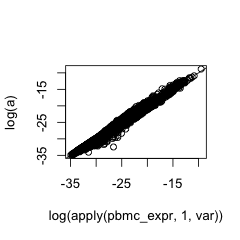

In [9]:
t(c(mean(apply(pbmc_expr,1,var),na.rm=T),mean(apply(cm_expr_pbmc_counts,1,var),na.rm=T),mean(apply(ncm_expr_pbmc_counts,1,var),na.rm=T),mean(apply(th_expr_pbmc_counts,1,var),na.rm=T),mean(apply(tc_expr_pbmc_counts,1,var),na.rm=T),mean(apply(b_expr_pbmc_counts,1,var),na.rm=T),mean(apply(nk_expr_pbmc_counts,1,var),na.rm=T),mean(apply(cdc_expr_pbmc_counts,1,var),na.rm=T),mean(apply(pdc_expr_pbmc_counts,1,var),na.rm=T)))

a <- apply(cm_expr_pbmc_counts,1,var)+apply(ncm_expr_pbmc_counts,1,var)+apply(th_expr_pbmc_counts,1,var)+apply(tc_expr_pbmc_counts,1,var)+apply(b_expr_pbmc_counts,1,var)+apply(nk_expr_pbmc_counts,1,var)+apply(cdc_expr_pbmc_counts,1,var)+apply(pdc_expr_pbmc_counts,1,var)

plot(log(apply(pbmc_expr,1,var)), log(a));
abline(a=0,b=1)

In [10]:
t(c(var(pbmc_expr["CD14",]),var(cm_expr_pbmc_counts["CD14",]),var(ncm_expr_pbmc_counts["CD14",]),var(th_expr_pbmc_counts["CD14",]),var(tc_expr_pbmc_counts["CD14",]),var(b_expr_pbmc_counts["CD14",]),var(cdc_expr_pbmc_counts["CD14",]),var(pdc_expr_pbmc_counts["CD14",])))
sum(var(cm_expr_pbmc_counts["CD14",]), var(ncm_expr_pbmc_counts["CD14",]), var(th_expr_pbmc_counts["CD14",]), var(tc_expr_pbmc_counts["CD14",]), var(b_expr_pbmc_counts["CD14",]), var(cdc_expr_pbmc_counts["CD14",]), var(pdc_expr_pbmc_counts["CD14",]))

[,1]         [,2]         [,3]         [,4]         [,5]        
[1,] 8.731983e-09 8.149804e-09 3.613178e-11 7.162931e-12 2.172942e-12
     [,6]         [,7]         [,8]        
[1,] 1.352566e-12 3.462838e-12 3.223863e-14

[1] 8.200119e-09

## filter samples

In [13]:
joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")
## let's remove the UCSF duplicate samples for now
ind_cov = sapply(cm_covs[,"sample"], function(x) {strsplit(as.character(x),"_")[[1]][[1]]})
ind_cov_batch = paste(ind_cov, cm_covs[,"batch"], sep="_")
joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")
ucsf_samples_nodups <- na.omit(match(joined_ind_cov_batch, ind_cov_batch));

## let's get joined_ind_pivot into the same order as pbmc_expr
joined_pivot <- joined_pivot[match(ind_cov_batch[ucsf_samples_nodups],joined_ind_cov_batch),];

In [35]:
length(ucsf_samples_nodups)

[1] 187

### all samples

In [14]:
cm_expr_pbmc_counts <- cm_expr_pbmc_counts[,ucsf_samples_nodups];
th_expr_pbmc_counts <- th_expr_pbmc_counts[,ucsf_samples_nodups];
tc_expr_pbmc_counts <- tc_expr_pbmc_counts[,ucsf_samples_nodups];
ncm_expr_pbmc_counts <- ncm_expr_pbmc_counts[,ucsf_samples_nodups];
b_expr_pbmc_counts <- b_expr_pbmc_counts[,ucsf_samples_nodups];
nk_expr_pbmc_counts <- nk_expr_pbmc_counts[,ucsf_samples_nodups];
cdc_expr_pbmc_counts <- cdc_expr_pbmc_counts[,ucsf_samples_nodups];
pdc_expr_pbmc_counts <- pdc_expr_pbmc_counts[,ucsf_samples_nodups];
pbmc_expr <- pbmc_expr[,ucsf_samples_nodups];

cm_expr_ct_counts <- cm_expr_ct_counts[,ucsf_samples_nodups];
th_expr_ct_counts <- th_expr_ct_counts[,ucsf_samples_nodups];
tc_expr_ct_counts <- tc_expr_ct_counts[,ucsf_samples_nodups];
ncm_expr_ct_counts <- ncm_expr_ct_counts[,ucsf_samples_nodups];
b_expr_ct_counts <- b_expr_ct_counts[,ucsf_samples_nodups];
nk_expr_ct_counts <- nk_expr_ct_counts[,ucsf_samples_nodups];
cdc_expr_ct_counts <- cdc_expr_ct_counts[,ucsf_samples_nodups];
pdc_expr_ct_counts <- pdc_expr_ct_counts[,ucsf_samples_nodups];

cm_covs <- cm_covs[ucsf_samples_nodups,];
th_covs <- th_covs[ucsf_samples_nodups,];
tc_covs <- tc_covs[ucsf_samples_nodups,];
ncm_covs <- ncm_covs[ucsf_samples_nodups,];
b_covs <- b_covs[ucsf_samples_nodups,];
nk_covs <- nk_covs[ucsf_samples_nodups,];
cdc_covs <- cdc_covs[ucsf_samples_nodups,];
pdc_covs <- pdc_covs[ucsf_samples_nodups,];
pbmc_covs <- pbmc_covs[ucsf_samples_nodups,];

In [48]:
pbmc_expr["CD14",]

1004_lupus7.13      1014_lupus7.13      1019_lupus7.13      1045_lupus7.13 
       1.064492e-04        2.200186e-04        9.721327e-05        3.042538e-04 
     1051_lupus7.13      1054_lupus7.13      1056_lupus7.19      1078_lupus7.13 
       1.497022e-04        1.724190e-04        3.127442e-04        1.167878e-04 
     1110_lupus7.19      1127_lupus7.19      1132_lupus7.19      1195_lupus7.20 
       3.085727e-04        9.833591e-05        5.196301e-04        1.765766e-04 
     1196_lupus7.19      1197_lupus7.20      1203_lupus7.19      1219_lupus7.20 
       1.976301e-04        9.184140e-05        1.480689e-04        1.240234e-04 
     1221_lupus7.20      1243_lupus7.20      1250_lupus7.20      1251_lupus7.26 
       2.643183e-04        1.171622e-04        1.395449e-04        2.621846e-04 
     1259_lupus7.26      1262_lupus7.26      1270_lupus7.26      1279_lupus7.26 
       2.543614e-04        1.543966e-04        1.849048e-04        2.296626e-04 
     1297_lupus7.26       1324_lupus8.2       1326_lupus8.2       1329_lupus8.2 
       1.482063e-04        2.085228e-04        2.666476e-04        4.240809e-04 
      1334_lupus8.2      1338_lupus7.26       1340_lupus8.2       1404_lupus8.3 
       2.541805e-04        2.065550e-04        4.364600e-04        3.135551e-04 
      1414_lupus8.2       1417_lupus8.3       1420_lupus8.3      1472_lupus1.10 
       2.262005e-04        2.738290e-04        1.416597e-04        4.143491e-04 
     1479_lupus1.10      1480_lupus1.10      1492_lupus1.10       1496_lupus8.2 
       3.775627e-04        2.770789e-04        3.120783e-04        1.909883e-04 
      1510_lupus8.2       1514_lupus8.2      1522_lupus1.10      1535_lupus1.10 
       1.997313e-04        1.837617e-04        4.220287e-04        2.679536e-04 
      1543_lupus8.3       1545_lupus8.3       1558_lupus8.3      1567_lupus8.16 
       1.127993e-04        2.316128e-04        2.473481e-04        1.400499e-04 
     1582_lupus8.16      1584_lupus8.16       1596_lupus8.3      1597_lupus8.16 
       8.902919e-05        2.132530e-04        1.770428e-04        1.242083e-04 
     1602_lupus1.10      1614_lupus8.16      1615_lupus1.10      1621_lupus1.10 
       2.407024e-04        1.032690e-04        1.726258e-04        1.436593e-04 
     1623_lupus8.16      1641_lupus8.17      1660_lupus8.17      1667_lupus8.17 
       8.572149e-05        2.083145e-04        1.825726e-04        1.289053e-04 
     1672_lupus8.17      1682_lupus8.17      1716_lupus1.10      1726_lupus1.10 
       3.494055e-04        2.785688e-04        1.700574e-04        1.344583e-04 
     1730_lupus1.10      1731_lupus8.16      1741_lupus8.23      1743_lupus8.23 
       1.487714e-04        1.208661e-04        1.274031e-04        1.914821e-04 
     1754_lupus8.23      1760_lupus8.16      1763_lupus8.23      1767_lupus8.23 
       2.625480e-04        3.087266e-04        5.210385e-04        1.295406e-04 
     1768_lupus8.23      1771_lupus8.23      1775_lupus8.16      1791_lupus8.23 
       2.114465e-04        4.397280e-04        3.061371e-04        3.098060e-04 
     1827_lupus8.17      1848_lupus8.17      1891_lupus8.17      1892_lupus8.17 
       1.250868e-04        1.538014e-04        2.113734e-04        1.801194e-04 
     1958_lupus8.23      1961_lupus8.23 900033200_lupus7.13 900034200_lupus7.13 
       2.090851e-04        4.837243e-04        1.336910e-04        1.858001e-04 
900216200_lupus7.20 900260200_lupus8.17 900358200_lupus7.26 900373200_lupus8.17 
       9.461861e-05        1.957029e-04        1.717747e-04        3.405415e-04 
900556200_lupus8.23 900598200_lupus7.20 900759200_lupus8.16 900805200_lupus8.23 
       1.286855e-04        3.424147e-04        2.386372e-04        1.659563e-04 
900903200_lupus7.19 901347200_lupus7.13  901457200_lupus8.3 901560200_lupus8.16 
       2.523619e-04        1.101801e-04        1.620531e-04        9.208874e-05 
901911200_lupus7.20 902289200_lupus7.26  902299200_lupus8.2 902692200_lupus7.19 
       2.190431e-04        1.738165e

### SLE

In [17]:
sle_indices <- setdiff((1:ncol(cm_expr_pbmc_counts)), grep("IGTB",colnames(pbmc_expr)))
sle_colnames <- colnames(pbmc_expr)[sle_indices]

cm_sle_expr_pbmc_counts <- cm_expr_pbmc_counts[,sle_indices]
th_sle_expr_pbmc_counts <- th_expr_pbmc_counts[,sle_indices]
tc_sle_expr_pbmc_counts <- tc_expr_pbmc_counts[,sle_indices]
ncm_sle_expr_pbmc_counts <- ncm_expr_pbmc_counts[,sle_indices]
b_sle_expr_pbmc_counts <- b_expr_pbmc_counts[,sle_indices]
nk_sle_expr_pbmc_counts <- nk_expr_pbmc_counts[,sle_indices]
cdc_sle_expr_pbmc_counts <- cdc_expr_pbmc_counts[,sle_indices]
pdc_sle_expr_pbmc_counts <- pdc_expr_pbmc_counts[,sle_indices]
pbmc_sle_expr <- pbmc_expr[,sle_indices]

cm_sle_expr_ct_counts <- cm_expr_ct_counts[,sle_indices]
th_sle_expr_ct_counts <- th_expr_ct_counts[,sle_indices]
tc_sle_expr_ct_counts <- tc_expr_ct_counts[,sle_indices]
ncm_sle_expr_ct_counts <- ncm_expr_ct_counts[,sle_indices]
b_sle_expr_ct_counts <- b_expr_ct_counts[,sle_indices]
nk_sle_expr_ct_counts <- nk_expr_ct_counts[,sle_indices]
cdc_sle_expr_ct_counts <- cdc_expr_ct_counts[,sle_indices]
pdc_sle_expr_ct_counts <- pdc_expr_ct_counts[,sle_indices]

### UCSF healthy

In [18]:
ucsf_healthy_indices <- intersect(grep("IGTB",colnames(pbmc_expr)), grep("lupus",pbmc_covs[,"batch"]))
ucsf_healthy_colnames <- paste(colnames(pbmc_expr)[ucsf_healthy_indices],"_ucsf",sep="")


cm_ucsf_healthy_expr_pbmc_counts <- cm_expr_pbmc_counts[,ucsf_healthy_indices]
th_ucsf_healthy_expr_pbmc_counts <- th_expr_pbmc_counts[,ucsf_healthy_indices]
tc_ucsf_healthy_expr_pbmc_counts <- tc_expr_pbmc_counts[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr_pbmc_counts <- ncm_expr_pbmc_counts[,ucsf_healthy_indices]
b_ucsf_healthy_expr_pbmc_counts <- b_expr_pbmc_counts[,ucsf_healthy_indices]
nk_ucsf_healthy_expr_pbmc_counts <- nk_expr_pbmc_counts[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr_pbmc_counts <- cdc_expr_pbmc_counts[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr_pbmc_counts <- pdc_expr_pbmc_counts[,ucsf_healthy_indices]
pbmc_ucsf_healthy_expr <- pbmc_expr[,ucsf_healthy_indices]

cm_ucsf_healthy_expr_ct_counts <- cm_expr_ct_counts[,ucsf_healthy_indices]
th_ucsf_healthy_expr_ct_counts <- th_expr_ct_counts[,ucsf_healthy_indices]
tc_ucsf_healthy_expr_ct_counts <- tc_expr_ct_counts[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr_ct_counts <- ncm_expr_ct_counts[,ucsf_healthy_indices]
b_ucsf_healthy_expr_ct_counts <- b_expr_ct_counts[,ucsf_healthy_indices]
nk_ucsf_healthy_expr_ct_counts <- nk_expr_ct_counts[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr_ct_counts <- cdc_expr_ct_counts[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr_ct_counts <- pdc_expr_ct_counts[,ucsf_healthy_indices]

### broad healthy

In [19]:
broad_healthy_indices <- intersect(grep("IGTB",colnames(pbmc_expr)), grep("immvar", pbmc_covs[,"batch"]))
broad_healthy_colnames <- paste(colnames(pbmc_expr)[broad_healthy_indices],"_broad",sep="")

cm_broad_healthy_expr_pbmc_counts <- cm_expr_pbmc_counts[,broad_healthy_indices]
th_broad_healthy_expr_pbmc_counts <- th_expr_pbmc_counts[,broad_healthy_indices]
tc_broad_healthy_expr_pbmc_counts <- tc_expr_pbmc_counts[,broad_healthy_indices]
ncm_broad_healthy_expr_pbmc_counts <- ncm_expr_pbmc_counts[,broad_healthy_indices]
b_broad_healthy_expr_pbmc_counts <- b_expr_pbmc_counts[,broad_healthy_indices]
nk_broad_healthy_expr_pbmc_counts <- nk_expr_pbmc_counts[,broad_healthy_indices]
cdc_broad_healthy_expr_pbmc_counts <- cdc_expr_pbmc_counts[,broad_healthy_indices]
pdc_broad_healthy_expr_pbmc_counts <- pdc_expr_pbmc_counts[,broad_healthy_indices]
pbmc_broad_healthy_expr <- pbmc_expr[,broad_healthy_indices]

cm_broad_healthy_expr_ct_counts <- cm_expr_ct_counts[,broad_healthy_indices]
th_broad_healthy_expr_ct_counts <- th_expr_ct_counts[,broad_healthy_indices]
tc_broad_healthy_expr_ct_counts <- tc_expr_ct_counts[,broad_healthy_indices]
ncm_broad_healthy_expr_ct_counts <- ncm_expr_ct_counts[,broad_healthy_indices]
b_broad_healthy_expr_ct_counts <- b_expr_ct_counts[,broad_healthy_indices]
nk_broad_healthy_expr_ct_counts <- nk_expr_ct_counts[,broad_healthy_indices]
cdc_broad_healthy_expr_ct_counts <- cdc_expr_ct_counts[,broad_healthy_indices]
pdc_broad_healthy_expr_ct_counts <- pdc_expr_ct_counts[,broad_healthy_indices]

In [20]:
pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))

cm_expr_pbmc_counts_std <- t(apply(cm_expr_pbmc_counts,1,standardize))
th_expr_pbmc_counts_std <- t(apply(th_expr_pbmc_counts,1,standardize))
b_expr_pbmc_counts_std <- t(apply(b_expr_pbmc_counts,1,standardize))
nk_expr_pbmc_counts_std <- t(apply(nk_expr_pbmc_counts,1,standardize))
ncm_expr_pbmc_counts_std <- t(apply(ncm_expr_pbmc_counts,1,standardize))
tc_expr_pbmc_counts_std <- t(apply(tc_expr_pbmc_counts,1,standardize))
cdc_expr_pbmc_counts_std <- t(apply(cdc_expr_pbmc_counts,1,standardize))
pdc_expr_pbmc_counts_std <- t(apply(pdc_expr_pbmc_counts,1,standardize))

cm_expr_ct_counts_std <- t(apply(cm_expr_ct_counts,1,standardize))
th_expr_ct_counts_std <- t(apply(th_expr_ct_counts,1,standardize))
b_expr_ct_counts_std <- t(apply(b_expr_ct_counts,1,standardize))
nk_expr_ct_counts_std <- t(apply(nk_expr_ct_counts,1,standardize))
ncm_expr_ct_counts_std <- t(apply(ncm_expr_ct_counts,1,standardize))
tc_expr_ct_counts_std <- t(apply(tc_expr_ct_counts,1,standardize))
cdc_expr_ct_counts_std <- t(apply(cdc_expr_ct_counts,1,standardize))
pdc_expr_ct_counts_std <- t(apply(pdc_expr_ct_counts,1,standardize))


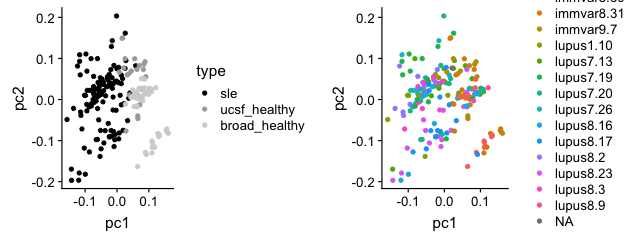

In [21]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 8, repr.plot.height = 3)

ggplot_by_disease = ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))
ggplot_by_batch = ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()
grid.arrange(ggplot_by_disease, ggplot_by_batch, ncol=2)

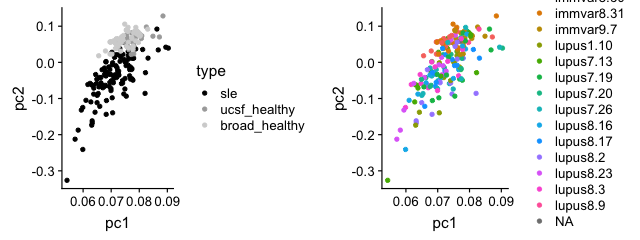

In [22]:
pbmc_expr_prcomp <- prcomp(pbmc_expr)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]


options(repr.plot.width = 8, repr.plot.height = 3)

ggplot_by_disease = ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))
ggplot_by_batch = ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()
grid.arrange(ggplot_by_disease, ggplot_by_batch, ncol=2)

In [23]:
# pbmc_expr_prcomp <- prcomp(pbmc_expr_std[na.omit(match(pbmc_deseq_sig_genes,rownames(pbmc_expr_std))),])

# df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
#             data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
#             data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
#            )
# df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

# options(repr.plot.width = 4, repr.plot.height = 3)
# ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

# ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()

## Load the differentially expression results

In [24]:
pbmc_deseq <- fread("v5.deseq/v5..PBMC.deseq.txt")##as.data.frame()
th_deseq <- as.data.frame(fread("v5.deseq/v5..Th.deseq.txt"))
tc_deseq <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.txt"))
cm_deseq <- as.data.frame(fread("v5.deseq/v5..cM.deseq.txt"))
ncm_deseq <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.txt"))
b_deseq <- as.data.frame(fread("v5.deseq/v5..B.deseq.txt"))
nk_deseq <- as.data.frame(fread("v5.deseq/v5..NK.deseq.txt"))
cdc_deseq <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.txt"))
pdc_deseq <- as.data.frame(fread("v5.deseq/v5..pDC.deseq.txt"))

pbmc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..PBMC.deseq.sig.txt",header=F))$V1
th_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Th.deseq.sig.txt",header=F))$V1
tc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.sig.txt",header=F))$V1
cm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cM.deseq.sig.txt",header=F))$V1
ncm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.sig.txt",header=F))$V1
b_deseq_sig <- as.data.frame(fread("v5.deseq/v5..B.deseq.sig.txt",header=F))$V1
nk_deseq_sig <- as.data.frame(fread("v5.deseq/v5..NK.deseq.sig.txt",header=F))$V1
cdc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.sig.txt",header=F))$V1
pdc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..pDC.deseq.sig.txt",header=F))$V1
union_deseq_sig <- unique(c(pbmc_deseq_sig, cm_deseq_sig, th_deseq_sig, 
                            tc_deseq_sig, b_deseq_sig, ncm_deseq_sig, nk_deseq_sig, cdc_deseq_sig, pdc_deseq_sig));

Warning message in fread("v5.deseq/v5..PBMC.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Th.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Tc.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not 

In [25]:
pbmc_deseq_sig_genes <- pbmc_deseq$V1[intersect(which(pbmc_deseq$baseMean > 25), intersect(which(abs(pbmc_deseq$log2FoldChange)>1),which(pbmc_deseq$qval < 0.01)))]
cm_deseq_sig_genes <- cm_deseq$V1[intersect(which(cm_deseq$baseMean > 25), intersect(which(abs(cm_deseq$log2FoldChange)>1),which(cm_deseq$qval < 0.01)))]
th_deseq_sig_genes <- th_deseq$V1[intersect(which(th_deseq$baseMean > 25), intersect(which(abs(th_deseq$log2FoldChange)>1),which(th_deseq$qval < 0.01)))]
tc_deseq_sig_genes <- tc_deseq$V1[intersect(which(tc_deseq$baseMean > 25), intersect(which(abs(tc_deseq$log2FoldChange)>1),which(tc_deseq$qval < 0.01)))]
b_deseq_sig_genes <- b_deseq$V1[intersect(which(b_deseq$baseMean > 25), intersect(which(abs(b_deseq$log2FoldChange)>1),which(b_deseq$qval < 0.01)))]
ncm_deseq_sig_genes <- ncm_deseq$V1[intersect(which(ncm_deseq$baseMean > 25), intersect(which(abs(ncm_deseq$log2FoldChange)>1),which(ncm_deseq$qval < 0.01)))]
nk_deseq_sig_genes <- nk_deseq$V1[intersect(which(nk_deseq$baseMean > 25), intersect(which(abs(nk_deseq$log2FoldChange)>1),which(nk_deseq$qval < 0.01)))]
cdc_deseq_sig_genes <- cdc_deseq$V1[intersect(which(cdc_deseq$baseMean > 25), intersect(which(abs(cdc_deseq$log2FoldChange)>1),which(cdc_deseq$qval < 0.01)))]
pdc_deseq_sig_genes <- pdc_deseq$V1[intersect(which(pdc_deseq$baseMean > 25), intersect(which(abs(pdc_deseq$log2FoldChange)>1),which(pdc_deseq$qval < 0.01)))]

union_deseq_sig_genes <- unique(c(pbmc_deseq_sig_genes, cm_deseq_sig_genes, ncm_deseq_sig_genes, cdc_deseq_sig_genes, pdc_deseq_sig_genes, th_deseq_sig_genes, tc_deseq_sig_genes,  nk_deseq_sig_genes,b_deseq_sig_genes))
length(union_deseq_sig_genes)
length(pbmc_deseq_sig_genes)
length(intersect(pbmc_deseq_sig_genes, union_deseq_sig_genes))

deseq_sig_genes <- union_deseq_sig_genes

[1] 212

[1] 149

[1] 149

## Load the joined table and preprocess the expression and counts data

In [26]:
# joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")
# joined_pivot <- as.data.frame(joined_pivot);
# ## filter for ucsf healthy only
# ##joined_pivot <- joined_pivot[grep("lupus",joined_pivot$batch_cov),]

joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")

# ##joined_pivot$batch_cov <- as.factor(joined_pivot$batch_cov)

# ind_cov = sapply(cm_covs[,"sample"], function(x) {strsplit(as.character(x),"_")[[1]][[1]]})
# ind_cov_batch = paste(ind_cov, cm_covs[,"batch"], sep="_")
# joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")
# ucsf_samples_nodups <- na.omit(match(joined_ind_cov_batch, ind_cov_batch));

# joined_pivot_filtered <- joined_pivot[match(c(colnames(pbmc_sle_expr),colnames(pbmc_ucsf_healthy_expr),colnames(pbmc_broad_healthy_expr)),joined_ind_cov_batch),]
joined_pivot_sle <- joined_pivot[match(colnames(pbmc_sle_expr), joined_ind_cov_batch),]
joined_pivot_ucsf_healthy <- joined_pivot[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch),]
joined_pivot_broad_healthy <- joined_pivot[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch),]

## get the cell type proportions

In [27]:
cm_prop = joined_pivot$"cM";##/joined_pivot_filtered$pbmc;
th_prop = joined_pivot$"Th";##/joined_pivot_filtered$pbmc;
b_prop = joined_pivot$"B";##/joined_pivot_filtered$pbmc;
nk_prop = joined_pivot$"NK";##/joined_pivot_filtered$pbmc;
ncm_prop = joined_pivot$"ncM";#/joined_pivot_filtered$pbmc;
tc_prop = joined_pivot$"Tc";#/joined_pivot_filtered$pbmc;
cdc_prop = joined_pivot$"cDC";#/joined_pivot_filtered$pbmc;
pdc_prop = joined_pivot$"pDC";#/joined_pivot_filtered$pbmc;

joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")

## set the NAs to 0
b_prop[which(is.na(b_prop))] <- 0;
cdc_prop[which(is.na(cdc_prop))] <- 0;
pdc_prop[which(is.na(pdc_prop))] <- 0;

cm_sle_prop = cm_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
th_sle_prop = th_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
b_sle_prop = b_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
nk_sle_prop = nk_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
ncm_sle_prop = ncm_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
tc_sle_prop = tc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
cdc_sle_prop = cdc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
pdc_sle_prop = pdc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
names(cm_sle_prop) <- names(th_sle_prop) <- names(b_sle_prop) <- names(nk_sle_prop) <- names(ncm_sle_prop) <- names(tc_sle_prop) <- names(cdc_sle_prop) <- names(pdc_sle_prop) <- joined_ind_cov_batch[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]

cm_ucsf_healthy_prop = cm_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
th_ucsf_healthy_prop = th_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
b_ucsf_healthy_prop = b_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
nk_ucsf_healthy_prop = nk_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
ncm_ucsf_healthy_prop = ncm_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
tc_ucsf_healthy_prop = tc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
cdc_ucsf_healthy_prop = cdc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
pdc_ucsf_healthy_prop = pdc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
names(cm_ucsf_healthy_prop) <- names(th_ucsf_healthy_prop) <- names(b_ucsf_healthy_prop) <- names(nk_ucsf_healthy_prop) <- names(ncm_ucsf_healthy_prop) <- names(tc_ucsf_healthy_prop) <- names(cdc_ucsf_healthy_prop) <- names(pdc_ucsf_healthy_prop)<- joined_ind_cov_batch[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]

cm_broad_healthy_prop = cm_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
th_broad_healthy_prop = th_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
b_broad_healthy_prop = b_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
nk_broad_healthy_prop = nk_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
ncm_broad_healthy_prop = ncm_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
tc_broad_healthy_prop = tc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
cdc_broad_healthy_prop = cdc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
pdc_broad_healthy_prop = pdc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
names(cm_broad_healthy_prop) <- names(th_broad_healthy_prop) <- names(b_broad_healthy_prop) <- names(nk_broad_healthy_prop) <- names(ncm_broad_healthy_prop) <- names(tc_broad_healthy_prop) <- names(cdc_broad_healthy_prop)<- names(pdc_broad_healthy_prop)  <- joined_ind_cov_batch[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]


In [28]:
cm_broad_healthy_prop

IGTB1372_immvar9.7   IGTB141_immvar9.7   IGTB143_immvar9.7  IGTB1506_immvar9.7 
          12.591850           20.969661           13.469500           13.318284 
 IGTB1539_immvar9.7  IGTB1540_immvar9.7  IGTB1575_immvar9.7 IGTB1650_immvar8.31 
           2.543507           11.411765           12.284693           11.127308 
IGTB1731_immvar8.31 IGTB1762_immvar8.30 IGTB1768_immvar8.31 IGTB1789_immvar8.30 
          21.874126           17.105263           17.729931           18.334423 
IGTB1793_immvar8.30 IGTB1814_immvar8.31 IGTB1815_immvar8.30 IGTB1819_immvar8.30 
          12.871758            9.564982           15.011990           12.886328 
IGTB1826_immvar8.31 IGTB1827_immvar8.31 IGTB1828_immvar8.30 IGTB1840_immvar8.30 
          20.698333           24.260355           19.444444           11.402811 
IGTB1844_immvar8.31 IGTB1871_immvar8.30 IGTB1895_immvar8.30 IGTB1901_immvar8.30 
          22.037471           16.612049           29.362151           14.467557 
 IGTB1906_immvar9.7 IGTB1908_immvar8.31 IGTB1913_immvar8.31 IGTB1916_immvar8.31 
          15.715491           27.059897           16.645457           21.110394 
IGTB1921_immvar8.31   IGTB195_immvar9.7 IGTB1952_immvar8.30 IGTB1966_immvar8.30 
          19.931271           14.487720           15.299685           21.623235 
IGTB1974_immvar8.31 IGTB1982_immvar8.30 IGTB1987_immvar8.31 IGTB1996_immvar8.30 
          17.811966           26.426332           14.861153           29.188869 
IGTB2007_immvar8.30 IGTB2065_immvar8.30   IGTB469_immvar9.7   IGTB498_immvar9.7 
          19.361005           31.832431           16.517013           10.965993 
  IGTB508_immvar9.7   IGTB514_immvar9.7   IGTB645_immvar9.7   IGTB670_immvar9.7 
          18.278506           11.920530           24.258475           13.508950 
  IGTB826_immvar9.7  IGTB884_immvar8.31  IGTB986_immvar8.31 
          16.761364           11.434736           18.570451

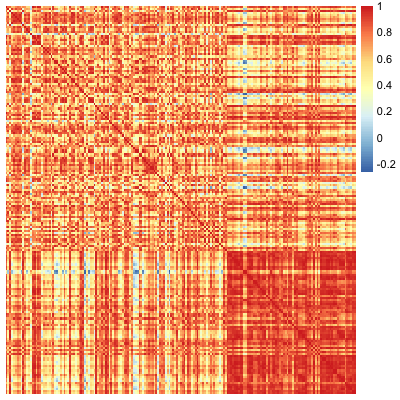

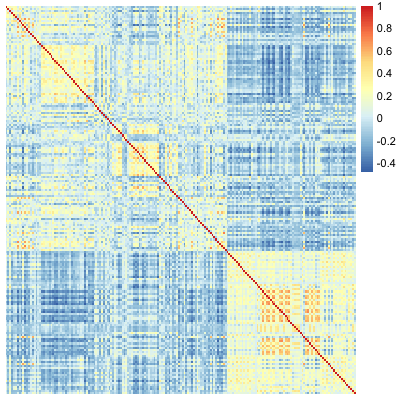

In [45]:
options(repr.plot.width = 5, repr.plot.height = 5)

a=pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, cdc_prop, pdc_prop))),cluster_rows=F,cluster_cols=F)
##options(repr.plot.width = 5, repr.plot.height = 5)
b=pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F, show_colnames=FALSE, show_rownames=FALSE)
##grid.arrange(a,b,ncol=2)

# Let's do some batch adjustments

## first, let's adjust cell type proportion

In [38]:
props <- as.matrix(data.frame(cM=cm_prop, Th=th_prop, B=b_prop, NK=nk_prop, ncM=ncm_prop, Tc=tc_prop, cDC=cdc_prop, pDC=pdc_prop));

props_sle <- as.matrix(data.frame(cM=cm_sle_prop, Th=th_sle_prop, B=b_sle_prop, NK=nk_sle_prop, ncM=ncm_sle_prop, Tc=tc_sle_prop, cDC=cdc_sle_prop, pDC=pdc_sle_prop));
props_ucsf_healthy <- as.matrix(data.frame(cM=cm_ucsf_healthy_prop, Th=th_ucsf_healthy_prop, B=b_ucsf_healthy_prop, NK=nk_ucsf_healthy_prop, ncM=ncm_ucsf_healthy_prop, Tc=tc_ucsf_healthy_prop, cDC=cdc_ucsf_healthy_prop, pDC=pdc_ucsf_healthy_prop));
props_broad_healthy <- as.matrix(data.frame(cM=cm_broad_healthy_prop, Th=th_broad_healthy_prop, B=b_broad_healthy_prop, NK=nk_broad_healthy_prop, ncM=ncm_broad_healthy_prop, Tc=tc_broad_healthy_prop, cDC=cdc_broad_healthy_prop, pDC=pdc_broad_healthy_prop));


## second, let's adjust cell type specific expression

In [47]:
# pbmc_mean <- t(lm(t(pbmc_expr)~1)$fitted)
# cm_mean <- t(lm(t(cm_expr)~1)$fitted)
# th_mean <- t(lm(t(th_expr)~1)$fitted)
# b_mean <- t(lm(t(b_expr)~1)$fitted)
# nk_mean <- t(lm(t(nk_expr)~1)$fitted)
# ncm_mean <- t(lm(t(ncm_expr)~1)$fitted)
# tc_mean <- t(lm(t(tc_expr)~1)$fitted)
# cdc_mean <- t(lm(t(cdc_expr)~1)$fitted)
# pdc_mean <- t(lm(t(pdc_expr)~1)$fitted)

##joined_pivot$seq_batch_cov <- grep("immvar",joined_pivot$batch_cov)

modcombat = model.matrix(~disease_cov, data=joined_pivot);
# modcombat = model.matrix(~1, data=joined_pivot);

# pbmc_expr <- ComBat(dat=pbmc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# cm_expr <-  ComBat(dat=cm_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# th_expr <-  ComBat(dat=th_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# b_expr <-  ComBat(dat=b_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# nk_expr <-  ComBat(dat=nk_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# ncm_expr <-  ComBat(dat=ncm_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# tc_expr <-  ComBat(dat=tc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# cdc_expr <-  ComBat(dat=cdc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
# pdc_expr <-  ComBat(dat=pdc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)


## let's remake the exprs and standardized versions

### all first

In [48]:
exprs_pbmc_counts <- array(c(cm_expr_pbmc_counts, th_expr_pbmc_counts, b_expr_pbmc_counts, nk_expr_pbmc_counts, ncm_expr_pbmc_counts, tc_expr_pbmc_counts, cdc_expr_pbmc_counts, pdc_expr_pbmc_counts),
               c(nrow(cm_expr_pbmc_counts) , ncol(cm_expr_pbmc_counts), 8),
               list(rownames(cm_expr_pbmc_counts),colnames(cm_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

exprs_ct_counts <- array(c(cm_expr_ct_counts, th_expr_ct_counts, b_expr_ct_counts, nk_expr_ct_counts, ncm_expr_ct_counts, tc_expr_ct_counts, cdc_expr_ct_counts, pdc_expr_ct_counts),
               c(nrow(cm_expr_ct_counts) , ncol(cm_expr_ct_counts), 8),
               list(rownames(cm_expr_ct_counts),colnames(cm_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))

cm_expr_pbmc_counts_std <- t(apply(cm_expr_pbmc_counts,1,standardize))
th_expr_pbmc_counts_std <- t(apply(th_expr_pbmc_counts,1,standardize))
b_expr_pbmc_counts_std <- t(apply(b_expr_pbmc_counts,1,standardize))
nk_expr_pbmc_counts_std <- t(apply(nk_expr_pbmc_counts,1,standardize))
ncm_expr_pbmc_counts_std <- t(apply(ncm_expr_pbmc_counts,1,standardize))
tc_expr_pbmc_counts_std <- t(apply(tc_expr_pbmc_counts,1,standardize))
cdc_expr_pbmc_counts_std <- t(apply(cdc_expr_pbmc_counts,1,standardize))
pdc_expr_pbmc_counts_std <- t(apply(pdc_expr_pbmc_counts,1,standardize))

cm_expr_ct_counts_std <- t(apply(cm_expr_ct_counts,1,standardize))
th_expr_ct_counts_std <- t(apply(th_expr_ct_counts,1,standardize))
b_expr_ct_counts_std <- t(apply(b_expr_ct_counts,1,standardize))
nk_expr_ct_counts_std <- t(apply(nk_expr_ct_counts,1,standardize))
ncm_expr_ct_counts_std <- t(apply(ncm_expr_ct_counts,1,standardize))
tc_expr_ct_counts_std <- t(apply(tc_expr_ct_counts,1,standardize))
cdc_expr_ct_counts_std <- t(apply(cdc_expr_ct_counts,1,standardize))
pdc_expr_ct_counts_std <- t(apply(pdc_expr_ct_counts,1,standardize))

exprs_pbmc_counts_std <- array(c(cm_expr_pbmc_counts_std, th_expr_pbmc_counts_std, b_expr_pbmc_counts_std, nk_expr_pbmc_counts_std, ncm_expr_pbmc_counts_std, tc_expr_pbmc_counts_std, cdc_expr_pbmc_counts_std, pdc_expr_pbmc_counts_std),
               c(nrow(cm_expr_pbmc_counts_std) , ncol(cm_expr_pbmc_counts_std), 8),
               list(rownames(cm_expr_pbmc_counts_std),colnames(cm_expr_pbmc_counts_std),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

exprs_ct_counts_std <- array(c(cm_expr_ct_counts_std, th_expr_ct_counts_std, b_expr_ct_counts_std, nk_expr_ct_counts_std, ncm_expr_ct_counts_std, tc_expr_ct_counts_std, cdc_expr_ct_counts_std, pdc_expr_ct_counts_std),
               c(nrow(cm_expr_ct_counts_std) , ncol(cm_expr_ct_counts_std), 8),
               list(rownames(cm_expr_ct_counts_std),colnames(cm_expr_ct_counts_std),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))


### SLE

In [40]:
cm_sle_expr_pbmc_counts <- cm_expr_pbmc_counts[,sle_indices]
th_sle_expr_pbmc_counts <- th_expr_pbmc_counts[,sle_indices]
tc_sle_expr_pbmc_counts <- tc_expr_pbmc_counts[,sle_indices]
ncm_sle_expr_pbmc_counts <- ncm_expr_pbmc_counts[,sle_indices]
b_sle_expr_pbmc_counts <- b_expr_pbmc_counts[,sle_indices]
nk_sle_expr_pbmc_counts <- nk_expr_pbmc_counts[,sle_indices]
cdc_sle_expr_pbmc_counts <- cdc_expr_pbmc_counts[,sle_indices]
pdc_sle_expr_pbmc_counts <- pdc_expr_pbmc_counts[,sle_indices]
pbmc_sle_expr <- pbmc_expr[,sle_indices]

cm_sle_expr_ct_counts <- cm_expr_ct_counts[,sle_indices]
th_sle_expr_ct_counts <- th_expr_ct_counts[,sle_indices]
tc_sle_expr_ct_counts <- tc_expr_ct_counts[,sle_indices]
ncm_sle_expr_ct_counts <- ncm_expr_ct_counts[,sle_indices]
b_sle_expr_ct_counts <- b_expr_ct_counts[,sle_indices]
nk_sle_expr_ct_counts <- nk_expr_ct_counts[,sle_indices]
cdc_sle_expr_ct_counts <- cdc_expr_ct_counts[,sle_indices]
pdc_sle_expr_ct_counts <- pdc_expr_ct_counts[,sle_indices]

exprs_sle_pbmc_counts <- array(c(cm_sle_expr_pbmc_counts, th_sle_expr_pbmc_counts, b_sle_expr_pbmc_counts, nk_sle_expr_pbmc_counts, ncm_sle_expr_pbmc_counts, tc_sle_expr_pbmc_counts, cdc_sle_expr_pbmc_counts, pdc_sle_expr_pbmc_counts),
                       c(nrow(cm_sle_expr_pbmc_counts) , ncol(cm_sle_expr_pbmc_counts), 8),
                       list(rownames(cm_sle_expr_pbmc_counts),colnames(cm_sle_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

exprs_sle_ct_counts <- array(c(cm_sle_expr_ct_counts, th_sle_expr_ct_counts, b_sle_expr_ct_counts, nk_sle_expr_ct_counts, ncm_sle_expr_ct_counts, tc_sle_expr_ct_counts, cdc_sle_expr_ct_counts, pdc_sle_expr_ct_counts),
                       c(nrow(cm_sle_expr_ct_counts) , ncol(cm_sle_expr_ct_counts), 8),
                       list(rownames(cm_sle_expr_ct_counts),colnames(cm_sle_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_sle_expr_std <- t(apply(pbmc_sle_expr,1,standardize))
cm_sle_expr_pbmc_counts_std <- t(apply(cm_sle_expr_pbmc_counts,1,standardize))
th_sle_expr_pbmc_counts_std <- t(apply(th_sle_expr_pbmc_counts,1,standardize))
b_sle_expr_pbmc_counts_std <- t(apply(b_sle_expr_pbmc_counts,1,standardize))
nk_sle_expr_pbmc_counts_std <- t(apply(nk_sle_expr_pbmc_counts,1,standardize))
ncm_sle_expr_pbmc_counts_std <- t(apply(ncm_sle_expr_pbmc_counts,1,standardize))
tc_sle_expr_pbmc_counts_std <- t(apply(tc_sle_expr_pbmc_counts,1,standardize))
cdc_sle_expr_pbmc_counts_std <- t(apply(cdc_sle_expr_pbmc_counts,1,standardize))
pdc_sle_expr_pbmc_counts_std <- t(apply(pdc_sle_expr_pbmc_counts,1,standardize))

expr_sle_std_pbmc_counts <- array(c(cm_sle_expr_pbmc_counts_std, th_sle_expr_pbmc_counts_std, b_sle_expr_pbmc_counts_std, nk_sle_expr_pbmc_counts_std, ncm_sle_expr_pbmc_counts_std, tc_sle_expr_pbmc_counts_std, cdc_sle_expr_pbmc_counts_std, pdc_sle_expr_pbmc_counts_std),
                       c(nrow(cm_sle_expr_pbmc_counts) , ncol(cm_sle_expr_pbmc_counts), 8),
                       list(rownames(cm_sle_expr_pbmc_counts),colnames(cm_sle_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_sle_expr_ct_counts_std <- t(apply(cm_sle_expr_ct_counts,1,standardize))
th_sle_expr_ct_counts_std <- t(apply(th_sle_expr_ct_counts,1,standardize))
b_sle_expr_ct_counts_std <- t(apply(b_sle_expr_ct_counts,1,standardize))
nk_sle_expr_ct_counts_std <- t(apply(nk_sle_expr_ct_counts,1,standardize))
ncm_sle_expr_ct_counts_std <- t(apply(ncm_sle_expr_ct_counts,1,standardize))
tc_sle_expr_ct_counts_std <- t(apply(tc_sle_expr_ct_counts,1,standardize))
cdc_sle_expr_ct_counts_std <- t(apply(cdc_sle_expr_ct_counts,1,standardize))
pdc_sle_expr_ct_counts_std <- t(apply(pdc_sle_expr_ct_counts,1,standardize))

expr_sle_std_ct_counts <- array(c(cm_sle_expr_ct_counts_std, th_sle_expr_ct_counts_std, b_sle_expr_ct_counts_std, nk_sle_expr_ct_counts_std, ncm_sle_expr_ct_counts_std, tc_sle_expr_ct_counts_std, cdc_sle_expr_ct_counts_std, pdc_sle_expr_ct_counts_std),
                       c(nrow(cm_sle_expr_ct_counts) , ncol(cm_sle_expr_ct_counts), 8),
                       list(rownames(cm_sle_expr_ct_counts),colnames(cm_sle_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

### UCSF healthy

In [50]:
cm_ucsf_healthy_expr_pbmc_counts <- cm_expr_pbmc_counts[,ucsf_healthy_indices]
th_ucsf_healthy_expr_pbmc_counts <- th_expr_pbmc_counts[,ucsf_healthy_indices]
tc_ucsf_healthy_expr_pbmc_counts <- tc_expr_pbmc_counts[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr_pbmc_counts <- ncm_expr_pbmc_counts[,ucsf_healthy_indices]
b_ucsf_healthy_expr_pbmc_counts <- b_expr_pbmc_counts[,ucsf_healthy_indices]
nk_ucsf_healthy_expr_pbmc_counts <- nk_expr_pbmc_counts[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr_pbmc_counts <- cdc_expr_pbmc_counts[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr_pbmc_counts <- pdc_expr_pbmc_counts[,ucsf_healthy_indices]
pbmc_ucsf_healthy_expr <- pbmc_expr[,ucsf_healthy_indices]

cm_ucsf_healthy_expr_ct_counts <- cm_expr_ct_counts[,ucsf_healthy_indices]
th_ucsf_healthy_expr_ct_counts <- th_expr_ct_counts[,ucsf_healthy_indices]
tc_ucsf_healthy_expr_ct_counts <- tc_expr_ct_counts[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr_ct_counts <- ncm_expr_ct_counts[,ucsf_healthy_indices]
b_ucsf_healthy_expr_ct_counts <- b_expr_ct_counts[,ucsf_healthy_indices]
nk_ucsf_healthy_expr_ct_counts <- nk_expr_ct_counts[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr_ct_counts <- cdc_expr_ct_counts[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr_ct_counts <- pdc_expr_ct_counts[,ucsf_healthy_indices]

exprs_ucsf_healthy_pbmc_counts <- array(c(cm_ucsf_healthy_expr_pbmc_counts, th_ucsf_healthy_expr_pbmc_counts, b_ucsf_healthy_expr_pbmc_counts, nk_ucsf_healthy_expr_pbmc_counts, ncm_ucsf_healthy_expr_pbmc_counts, tc_ucsf_healthy_expr_pbmc_counts, cdc_ucsf_healthy_expr_pbmc_counts, pdc_ucsf_healthy_expr_pbmc_counts),
                       c(nrow(cm_ucsf_healthy_expr_pbmc_counts) , ncol(cm_ucsf_healthy_expr_pbmc_counts), 8),
                       list(rownames(cm_ucsf_healthy_expr_pbmc_counts),colnames(cm_ucsf_healthy_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

exprs_ucsf_healthy_ct_counts <- array(c(cm_ucsf_healthy_expr_ct_counts, th_ucsf_healthy_expr_ct_counts, b_ucsf_healthy_expr_ct_counts, nk_ucsf_healthy_expr_ct_counts, ncm_ucsf_healthy_expr_ct_counts, tc_ucsf_healthy_expr_ct_counts, cdc_ucsf_healthy_expr_ct_counts, pdc_ucsf_healthy_expr_ct_counts),
                       c(nrow(cm_ucsf_healthy_expr_ct_counts) , ncol(cm_ucsf_healthy_expr_ct_counts), 8),
                       list(rownames(cm_ucsf_healthy_expr_ct_counts),colnames(cm_ucsf_healthy_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_ucsf_healthy_expr_std <- t(apply(pbmc_ucsf_healthy_expr,1,standardize))
cm_ucsf_healthy_expr_pbmc_counts_std <- t(apply(cm_ucsf_healthy_expr_pbmc_counts,1,standardize))
th_ucsf_healthy_expr_pbmc_counts_std <- t(apply(th_ucsf_healthy_expr_pbmc_counts,1,standardize))
b_ucsf_healthy_expr_pbmc_counts_std <- t(apply(b_ucsf_healthy_expr_pbmc_counts,1,standardize))
nk_ucsf_healthy_expr_pbmc_counts_std <- t(apply(nk_ucsf_healthy_expr_pbmc_counts,1,standardize))
ncm_ucsf_healthy_expr_pbmc_counts_std <- t(apply(ncm_ucsf_healthy_expr_pbmc_counts,1,standardize))
tc_ucsf_healthy_expr_pbmc_counts_std <- t(apply(tc_ucsf_healthy_expr_pbmc_counts,1,standardize))
cdc_ucsf_healthy_expr_pbmc_counts_std <- t(apply(cdc_ucsf_healthy_expr_pbmc_counts,1,standardize))
pdc_ucsf_healthy_expr_pbmc_counts_std <- t(apply(pdc_ucsf_healthy_expr_pbmc_counts,1,standardize))

expr_ucsf_healthy_std_pbmc_counts <- array(c(cm_ucsf_healthy_expr_pbmc_counts_std, th_ucsf_healthy_expr_pbmc_counts_std, b_ucsf_healthy_expr_pbmc_counts_std, nk_ucsf_healthy_expr_pbmc_counts_std, ncm_ucsf_healthy_expr_pbmc_counts_std, tc_ucsf_healthy_expr_pbmc_counts_std, cdc_ucsf_healthy_expr_pbmc_counts_std, pdc_ucsf_healthy_expr_pbmc_counts_std),
                       c(nrow(cm_ucsf_healthy_expr_pbmc_counts) , ncol(cm_ucsf_healthy_expr_pbmc_counts), 8),
                       list(rownames(cm_ucsf_healthy_expr_pbmc_counts),colnames(cm_ucsf_healthy_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_ucsf_healthy_expr_ct_counts_std <- t(apply(cm_ucsf_healthy_expr_ct_counts,1,standardize))
th_ucsf_healthy_expr_ct_counts_std <- t(apply(th_ucsf_healthy_expr_ct_counts,1,standardize))
b_ucsf_healthy_expr_ct_counts_std <- t(apply(b_ucsf_healthy_expr_ct_counts,1,standardize))
nk_ucsf_healthy_expr_ct_counts_std <- t(apply(nk_ucsf_healthy_expr_ct_counts,1,standardize))
ncm_ucsf_healthy_expr_ct_counts_std <- t(apply(ncm_ucsf_healthy_expr_ct_counts,1,standardize))
tc_ucsf_healthy_expr_ct_counts_std <- t(apply(tc_ucsf_healthy_expr_ct_counts,1,standardize))
cdc_ucsf_healthy_expr_ct_counts_std <- t(apply(cdc_ucsf_healthy_expr_ct_counts,1,standardize))
pdc_ucsf_healthy_expr_ct_counts_std <- t(apply(pdc_ucsf_healthy_expr_ct_counts,1,standardize))

expr_ucsf_healthy_std_ct_counts <- array(c(cm_ucsf_healthy_expr_ct_counts_std, th_ucsf_healthy_expr_ct_counts_std, b_ucsf_healthy_expr_ct_counts_std, nk_ucsf_healthy_expr_ct_counts_std, ncm_ucsf_healthy_expr_ct_counts_std, tc_ucsf_healthy_expr_ct_counts_std, cdc_ucsf_healthy_expr_ct_counts_std, pdc_ucsf_healthy_expr_ct_counts_std),
                       c(nrow(cm_ucsf_healthy_expr_ct_counts) , ncol(cm_ucsf_healthy_expr_ct_counts), 8),
                       list(rownames(cm_ucsf_healthy_expr_ct_counts),colnames(cm_ucsf_healthy_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))


### broad healthy

In [51]:
cm_broad_healthy_expr_pbmc_counts <- cm_expr_pbmc_counts[,broad_healthy_indices]
th_broad_healthy_expr_pbmc_counts <- th_expr_pbmc_counts[,broad_healthy_indices]
tc_broad_healthy_expr_pbmc_counts <- tc_expr_pbmc_counts[,broad_healthy_indices]
ncm_broad_healthy_expr_pbmc_counts <- ncm_expr_pbmc_counts[,broad_healthy_indices]
b_broad_healthy_expr_pbmc_counts <- b_expr_pbmc_counts[,broad_healthy_indices]
nk_broad_healthy_expr_pbmc_counts <- nk_expr_pbmc_counts[,broad_healthy_indices]
cdc_broad_healthy_expr_pbmc_counts <- cdc_expr_pbmc_counts[,broad_healthy_indices]
pdc_broad_healthy_expr_pbmc_counts <- pdc_expr_pbmc_counts[,broad_healthy_indices]
pbmc_broad_healthy_expr <- pbmc_expr[,broad_healthy_indices]

cm_broad_healthy_expr_ct_counts <- cm_expr_ct_counts[,broad_healthy_indices]
th_broad_healthy_expr_ct_counts <- th_expr_ct_counts[,broad_healthy_indices]
tc_broad_healthy_expr_ct_counts <- tc_expr_ct_counts[,broad_healthy_indices]
ncm_broad_healthy_expr_ct_counts <- ncm_expr_ct_counts[,broad_healthy_indices]
b_broad_healthy_expr_ct_counts <- b_expr_ct_counts[,broad_healthy_indices]
nk_broad_healthy_expr_ct_counts <- nk_expr_ct_counts[,broad_healthy_indices]
cdc_broad_healthy_expr_ct_counts <- cdc_expr_ct_counts[,broad_healthy_indices]
pdc_broad_healthy_expr_ct_counts <- pdc_expr_ct_counts[,broad_healthy_indices]

exprs_broad_healthy_pbmc_counts <- array(c(cm_broad_healthy_expr_pbmc_counts, th_broad_healthy_expr_pbmc_counts, b_broad_healthy_expr_pbmc_counts, nk_broad_healthy_expr_pbmc_counts, ncm_broad_healthy_expr_pbmc_counts, tc_broad_healthy_expr_pbmc_counts, cdc_broad_healthy_expr_pbmc_counts, pdc_broad_healthy_expr_pbmc_counts),
                       c(nrow(cm_broad_healthy_expr_pbmc_counts) , ncol(cm_broad_healthy_expr_pbmc_counts), 8),
                       list(rownames(cm_broad_healthy_expr_pbmc_counts),colnames(cm_broad_healthy_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

exprs_broad_healthy_ct_counts <- array(c(cm_broad_healthy_expr_ct_counts, th_broad_healthy_expr_ct_counts, b_broad_healthy_expr_ct_counts, nk_broad_healthy_expr_ct_counts, ncm_broad_healthy_expr_ct_counts, tc_broad_healthy_expr_ct_counts, cdc_broad_healthy_expr_ct_counts, pdc_broad_healthy_expr_ct_counts),
                       c(nrow(cm_broad_healthy_expr_ct_counts) , ncol(cm_broad_healthy_expr_ct_counts), 8),
                       list(rownames(cm_broad_healthy_expr_ct_counts),colnames(cm_broad_healthy_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_broad_healthy_expr_std <- t(apply(pbmc_broad_healthy_expr,1,standardize))
cm_broad_healthy_expr_pbmc_counts_std <- t(apply(cm_broad_healthy_expr_pbmc_counts,1,standardize))
th_broad_healthy_expr_pbmc_counts_std <- t(apply(th_broad_healthy_expr_pbmc_counts,1,standardize))
b_broad_healthy_expr_pbmc_counts_std <- t(apply(b_broad_healthy_expr_pbmc_counts,1,standardize))
nk_broad_healthy_expr_pbmc_counts_std <- t(apply(nk_broad_healthy_expr_pbmc_counts,1,standardize))
ncm_broad_healthy_expr_pbmc_counts_std <- t(apply(ncm_broad_healthy_expr_pbmc_counts,1,standardize))
tc_broad_healthy_expr_pbmc_counts_std <- t(apply(tc_broad_healthy_expr_pbmc_counts,1,standardize))
cdc_broad_healthy_expr_pbmc_counts_std <- t(apply(cdc_broad_healthy_expr_pbmc_counts,1,standardize))
pdc_broad_healthy_expr_pbmc_counts_std <- t(apply(pdc_broad_healthy_expr_pbmc_counts,1,standardize))

expr_broad_healthy_std_pbmc_counts <- array(c(cm_broad_healthy_expr_pbmc_counts_std, th_broad_healthy_expr_pbmc_counts_std, b_broad_healthy_expr_pbmc_counts_std, nk_broad_healthy_expr_pbmc_counts_std, ncm_broad_healthy_expr_pbmc_counts_std, tc_broad_healthy_expr_pbmc_counts_std, cdc_broad_healthy_expr_pbmc_counts_std, pdc_broad_healthy_expr_pbmc_counts_std),
                       c(nrow(cm_broad_healthy_expr_pbmc_counts) , ncol(cm_broad_healthy_expr_pbmc_counts), 8),
                       list(rownames(cm_broad_healthy_expr_pbmc_counts),colnames(cm_broad_healthy_expr_pbmc_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_broad_healthy_expr_ct_counts_std <- t(apply(cm_broad_healthy_expr_ct_counts,1,standardize))
th_broad_healthy_expr_ct_counts_std <- t(apply(th_broad_healthy_expr_ct_counts,1,standardize))
b_broad_healthy_expr_ct_counts_std <- t(apply(b_broad_healthy_expr_ct_counts,1,standardize))
nk_broad_healthy_expr_ct_counts_std <- t(apply(nk_broad_healthy_expr_ct_counts,1,standardize))
ncm_broad_healthy_expr_ct_counts_std <- t(apply(ncm_broad_healthy_expr_ct_counts,1,standardize))
tc_broad_healthy_expr_ct_counts_std <- t(apply(tc_broad_healthy_expr_ct_counts,1,standardize))
cdc_broad_healthy_expr_ct_counts_std <- t(apply(cdc_broad_healthy_expr_ct_counts,1,standardize))
pdc_broad_healthy_expr_ct_counts_std <- t(apply(pdc_broad_healthy_expr_ct_counts,1,standardize))

expr_broad_healthy_std_ct_counts <- array(c(cm_broad_healthy_expr_ct_counts_std, th_broad_healthy_expr_ct_counts_std, b_broad_healthy_expr_ct_counts_std, nk_broad_healthy_expr_ct_counts_std, ncm_broad_healthy_expr_ct_counts_std, tc_broad_healthy_expr_ct_counts_std, cdc_broad_healthy_expr_ct_counts_std, pdc_broad_healthy_expr_ct_counts_std),
                       c(nrow(cm_broad_healthy_expr_ct_counts) , ncol(cm_broad_healthy_expr_ct_counts), 8),
                       list(rownames(cm_broad_healthy_expr_ct_counts),colnames(cm_broad_healthy_expr_ct_counts),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

## plot both after correcting for batch

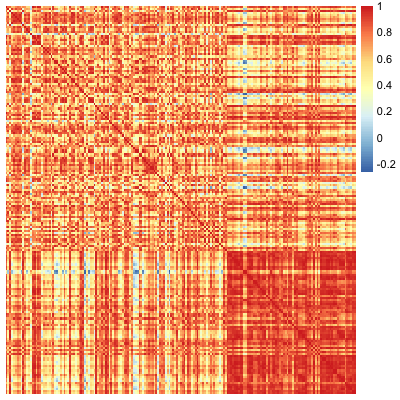

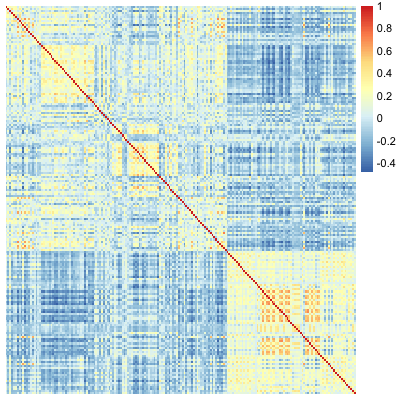

In [52]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, cdc_prop, pdc_prop))),cluster_rows=F,cluster_cols=F)
##options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F, show_colnames=FALSE, show_rownames=FALSE)

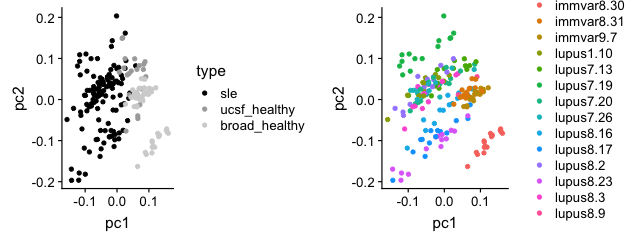

In [53]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 8, repr.plot.height = 3)

ggplot_by_disease = ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))
ggplot_by_batch = ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()
grid.arrange(ggplot_by_disease, ggplot_by_batch, ncol=2)

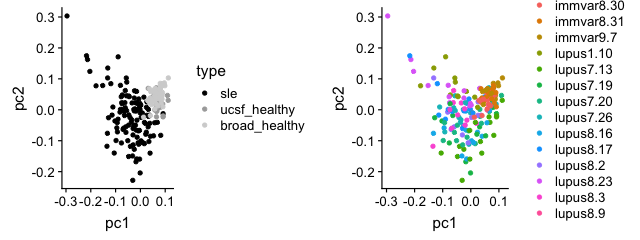

In [54]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std[na.omit(match(deseq_sig_genes,rownames(pbmc_expr_std))),])

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 8, repr.plot.height = 3)

ggplot_by_disease = ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))
ggplot_by_batch = ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()
grid.arrange(ggplot_by_disease, ggplot_by_batch, ncol=2)

In [55]:
t(c(cor(colMeans(cm_expr_pbmc_counts), props[,"cM"]),cor(colMeans(th_expr_pbmc_counts), props[,"Th"]),cor(colMeans(tc_expr_pbmc_counts), props[,"Tc"]),cor(colMeans(nk_expr_pbmc_counts), props[,"NK"]),cor(colMeans(ncm_expr_pbmc_counts), props[,"ncM"]),cor(colMeans(pdc_expr_pbmc_counts), props[,"pDC"]),cor(colMeans(cdc_expr_pbmc_counts), props[,"cDC"])))

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,] 0.9758975 0.9711998 0.9433848 0.9794247 0.9891783 0.9882446 0.9795742

In [57]:
# cor(colMeans(cm_expr_std), props[,"cM"])
# cor(colMeans(th_expr_std), props[,"Th"])
# cor(colMeans(tc_expr_std), props[,"Tc"])
# cor(colMeans(nk_expr_std), props[,"NK"])
# cor(colMeans(ncm_expr_std), props[,"ncM"])
# cor(colMeans(pdc_expr_std), props[,"pDC"])
# cor(colMeans(cdc_expr_std), props[,"cDC"])

In [43]:
pbmc_expr["CD14",]

1004_lupus7.13      1014_lupus7.13      1019_lupus7.13      1045_lupus7.13 
       1.064492e-04        2.200186e-04        9.721327e-05        3.042538e-04 
     1051_lupus7.13      1054_lupus7.13      1056_lupus7.19      1078_lupus7.13 
       1.497022e-04        1.724190e-04        3.127442e-04        1.167878e-04 
     1110_lupus7.19      1127_lupus7.19      1132_lupus7.19      1195_lupus7.20 
       3.085727e-04        9.833591e-05        5.196301e-04        1.765766e-04 
     1196_lupus7.19      1197_lupus7.20      1203_lupus7.19      1219_lupus7.20 
       1.976301e-04        9.184140e-05        1.480689e-04        1.240234e-04 
     1221_lupus7.20      1243_lupus7.20      1250_lupus7.20      1251_lupus7.26 
       2.643183e-04        1.171622e-04        1.395449e-04        2.621846e-04 
     1259_lupus7.26      1262_lupus7.26      1270_lupus7.26      1279_lupus7.26 
       2.543614e-04        1.543966e-04        1.849048e-04        2.296626e-04 
     1297_lupus7.26       1324_lupus8.2       1326_lupus8.2       1329_lupus8.2 
       1.482063e-04        2.085228e-04        2.666476e-04        4.240809e-04 
      1334_lupus8.2      1338_lupus7.26       1340_lupus8.2       1404_lupus8.3 
       2.541805e-04        2.065550e-04        4.364600e-04        3.135551e-04 
      1414_lupus8.2       1417_lupus8.3       1420_lupus8.3      1472_lupus1.10 
       2.262005e-04        2.738290e-04        1.416597e-04        4.143491e-04 
     1479_lupus1.10      1480_lupus1.10      1492_lupus1.10       1496_lupus8.2 
       3.775627e-04        2.770789e-04        3.120783e-04        1.909883e-04 
      1510_lupus8.2       1514_lupus8.2      1522_lupus1.10      1535_lupus1.10 
       1.997313e-04        1.837617e-04        4.220287e-04        2.679536e-04 
      1543_lupus8.3       1545_lupus8.3       1558_lupus8.3      1567_lupus8.16 
       1.127993e-04        2.316128e-04        2.473481e-04        1.400499e-04 
     1582_lupus8.16      1584_lupus8.16       1596_lupus8.3      1597_lupus8.16 
       8.902919e-05        2.132530e-04        1.770428e-04        1.242083e-04 
     1602_lupus1.10      1614_lupus8.16      1615_lupus1.10      1621_lupus1.10 
       2.407024e-04        1.032690e-04        1.726258e-04        1.436593e-04 
     1623_lupus8.16      1641_lupus8.17      1660_lupus8.17      1667_lupus8.17 
       8.572149e-05        2.083145e-04        1.825726e-04        1.289053e-04 
     1672_lupus8.17      1682_lupus8.17      1716_lupus1.10      1726_lupus1.10 
       3.494055e-04        2.785688e-04        1.700574e-04        1.344583e-04 
     1730_lupus1.10      1731_lupus8.16      1741_lupus8.23      1743_lupus8.23 
       1.487714e-04        1.208661e-04        1.274031e-04        1.914821e-04 
     1754_lupus8.23      1760_lupus8.16      1763_lupus8.23      1767_lupus8.23 
       2.625480e-04        3.087266e-04        5.210385e-04        1.295406e-04 
     1768_lupus8.23      1771_lupus8.23      1775_lupus8.16      1791_lupus8.23 
       2.114465e-04        4.397280e-04        3.061371e-04        3.098060e-04 
     1827_lupus8.17      1848_lupus8.17      1891_lupus8.17      1892_lupus8.17 
       1.250868e-04        1.538014e-04        2.113734e-04        1.801194e-04 
     1958_lupus8.23      1961_lupus8.23 900033200_lupus7.13 900034200_lupus7.13 
       2.090851e-04        4.837243e-04        1.336910e-04        1.858001e-04 
900216200_lupus7.20 900260200_lupus8.17 900358200_lupus7.26 900373200_lupus8.17 
       9.461861e-05        1.957029e-04        1.717747e-04        3.405415e-04 
900556200_lupus8.23 900598200_lupus7.20 900759200_lupus8.16 900805200_lupus8.23 
       1.286855e-04        3.424147e-04        2.386372e-04        1.659563e-04 
900903200_lupus7.19 901347200_lupus7.13  901457200_lupus8.3 901560200_lupus8.16 
       2.523619e-04        1.101801e-04        1.620531e-04        9.208874e-05 
901911200_lupus7.20 902289200_lupus7.26  902299200_lupus8.2 902692200_lupus7.19 
       2.190431e-04        1.738165e

In [41]:
cor(pbmc_expr["CD14",], props[,"cM"])
cor(pbmc_sle_expr["CD14",], props_sle[,"cM"])

cor(pbmc_expr_std["CD14",], props[,"cM"])
cor(pbmc_sle_expr_std["CD14",], props_sle[,"cM"])

[1] 0.7572499

[1] 0.6820872

[1] 0.7572499

[1] 0.6820872

# Figure 2A - heatmap

In [66]:
cell_types <- c("PBMC","cM","ncM", "cDC","pDC","Th","Tc","NK","B")


pbmc_col_clust <- hclust(dist(t(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),]),method = "manhattan"), method="ward.D")
pbmc_row_clust <- hclust(dist(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),],method = "manhattan"), method="ward.D")

all_expr_pbmc_counts_std <- data.frame(pbmc=pbmc_expr_std[,pbmc_col_clust$order],
                                   cm=cm_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   ncm=ncm_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   cdc=cdc_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   pdc=pdc_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   th=th_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   tc=tc_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   nk=nk_expr_pbmc_counts_std[,pbmc_col_clust$order],
                                   b=b_expr_pbmc_counts_std[,pbmc_col_clust$order])


all_expr_pbmc_counts <- data.frame(pbmc=pbmc_expr[,pbmc_col_clust$order],
                      cm=cm_expr_pbmc_counts[,pbmc_col_clust$order],
                      ncm=ncm_expr_pbmc_counts[,pbmc_col_clust$order],
                      cdc=cdc_expr_pbmc_counts[,pbmc_col_clust$order],
                       pdc=pdc_expr_pbmc_counts[,pbmc_col_clust$order],
                      th=th_expr_pbmc_counts[,pbmc_col_clust$order],
                      tc=tc_expr_pbmc_counts[,pbmc_col_clust$order],
                      nk=nk_expr_pbmc_counts[,pbmc_col_clust$order],
                      b=b_expr_pbmc_counts[,pbmc_col_clust$order]
                      )

all_expr_pbmc_counts_sig <- all_expr_pbmc_counts[match(deseq_sig_genes,expr_gene_names),]
all_expr_pbmc_counts_std_sig <- all_expr_pbmc_counts_std[match(deseq_sig_genes,expr_gene_names),]
                                       
all_expr_ct_counts_std <- data.frame(pbmc=pbmc_expr_std[,pbmc_col_clust$order],
                                   cm=cm_expr_ct_counts_std[,pbmc_col_clust$order],
                                   ncm=ncm_expr_ct_counts_std[,pbmc_col_clust$order],
                                   cdc=cdc_expr_ct_counts_std[,pbmc_col_clust$order],
                                   pdc=pdc_expr_ct_counts_std[,pbmc_col_clust$order],
                                   th=th_expr_ct_counts_std[,pbmc_col_clust$order],
                                   tc=tc_expr_ct_counts_std[,pbmc_col_clust$order],
                                   nk=nk_expr_ct_counts_std[,pbmc_col_clust$order],
                                   b=b_expr_ct_counts_std[,pbmc_col_clust$order])


all_expr_ct_counts <- data.frame(pbmc=pbmc_expr[,pbmc_col_clust$order],
                      cm=cm_expr_ct_counts[,pbmc_col_clust$order],
                      ncm=ncm_expr_ct_counts[,pbmc_col_clust$order],
                      cdc=cdc_expr_ct_counts[,pbmc_col_clust$order],
                       pdc=pdc_expr_ct_counts[,pbmc_col_clust$order],
                      th=th_expr_ct_counts[,pbmc_col_clust$order],
                      tc=tc_expr_ct_counts[,pbmc_col_clust$order],
                      nk=nk_expr_ct_counts[,pbmc_col_clust$order],
                      b=b_expr_ct_counts[,pbmc_col_clust$order]
                      )

all_expr_ct_counts_sig <- all_expr_ct_counts[match(deseq_sig_genes,expr_gene_names),]
all_expr_ct_counts_std_sig <- all_expr_ct_counts_std[match(deseq_sig_genes,expr_gene_names),]

                                     
                                     
ct_annotation_one <- data.frame(disease_pop_cov=joined_pivot$disease_pop_cov,
                           sledaiscore=joined_pivot$sledaiscore)
rownames(ct_annotation_one) <- colnames(pbmc_expr);


ct_annotation <- data.frame(type=factor(rep(cell_types,each=ncol(ncm_expr_pbmc_counts))),
                           disease_pop_cov=joined_pivot$disease_pop_cov[pbmc_col_clust$order],
                           sledaiscore=joined_pivot$sledaiscore[pbmc_col_clust$order])
rownames(ct_annotation) <- colnames(all_expr_pbmc_counts_std);


In [67]:
dim(ct_annotation)

[1] 1683    3

In [68]:
# options(repr.plot.width = 16, repr.plot.height = 16)

# breaksList = seq(-2, 2, by = .1)
# pheatmap_out <- pheatmap(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),pbmc_col_clust$order],
#          cluster_rows=T, cluster_cols=F,annotation_col = ct_annotation_one[pbmc_col_clust$order,],#annotation_row = kmeans_annotation,
#          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), 
#                          cutree_rows=8, 
#                          scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",# Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
#         breaks = breaksList) # Sets the breaks of the color scale as in breaksList

In [69]:
ifn_crow <- read.table("ifn.lupus.crow.etal.txt")
crow_annotation <- matrix(nrow=nrow(all_expr_pbmc_counts_std_sig), ncol=1, 0);
crow_annotation[na.omit(match(ifn_crow$V1, rownames(all_expr_pbmc_counts_std_sig))),1] <- 1;
rownames(crow_annotation) <- rownames(all_expr_pbmc_counts_std_sig)
colnames(crow_annotation) <- "Crow"
crow_annotation <- as.data.frame(crow_annotation)
sum(crow_annotation$Crow)

[1] 25

In [70]:
pbmc_deseq_sig_annotation <- matrix(nrow=nrow(all_expr_pbmc_counts_std_sig), ncol=1, 0);
pbmc_deseq_sig_annotation[na.omit(match(pbmc_deseq_sig_genes, rownames(all_expr_pbmc_counts_std_sig))),1] <- 1;
rownames(pbmc_deseq_sig_annotation) <- rownames(all_expr_pbmc_counts_std_sig)
colnames(pbmc_deseq_sig_annotation) <- "PBMC Sig"
pbmc_deseq_sig_annotation <- as.data.frame(pbmc_deseq_sig_annotation)
row_annotations <- cbind(crow_annotation, pbmc_deseq_sig_annotation)
sum(row_annotations$Crow[row_annotations$"PBMC Sig"==1])

[1] 21

In [71]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

annotation_colors = list(
    type = c(PBMC="#000000", cM="#E58606", ncM="#5D69B1", cDC="#52BCA3", pDC="#99C945", Th="#CC61B0", Tc="#24796C", NK="#DAA51B", B="#764E9F"),
    disease_pop_cov = c(healthyWHITE="#D82B29", sleWHITE="#1B78B6", sleASIAN="#F57F20")
)

pheatmap_std_out <- pheatmap(all_expr_pbmc_counts_std_sig,
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors = annotation_colors,#annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_pbmc_counts),ncol(cm_expr_pbmc_counts)*length(cell_types),ncol(cm_expr_pbmc_counts)),
                         cutree_rows=8, 
                         scale="none",fontsize=2,clustering_method="ward.D",clustering_distance_row="manhattan", filename="expr_std_heatmap.png",
                            width=10, height=10, dpi=600)
options(repr.plot.width = 10, repr.plot.height = 4)



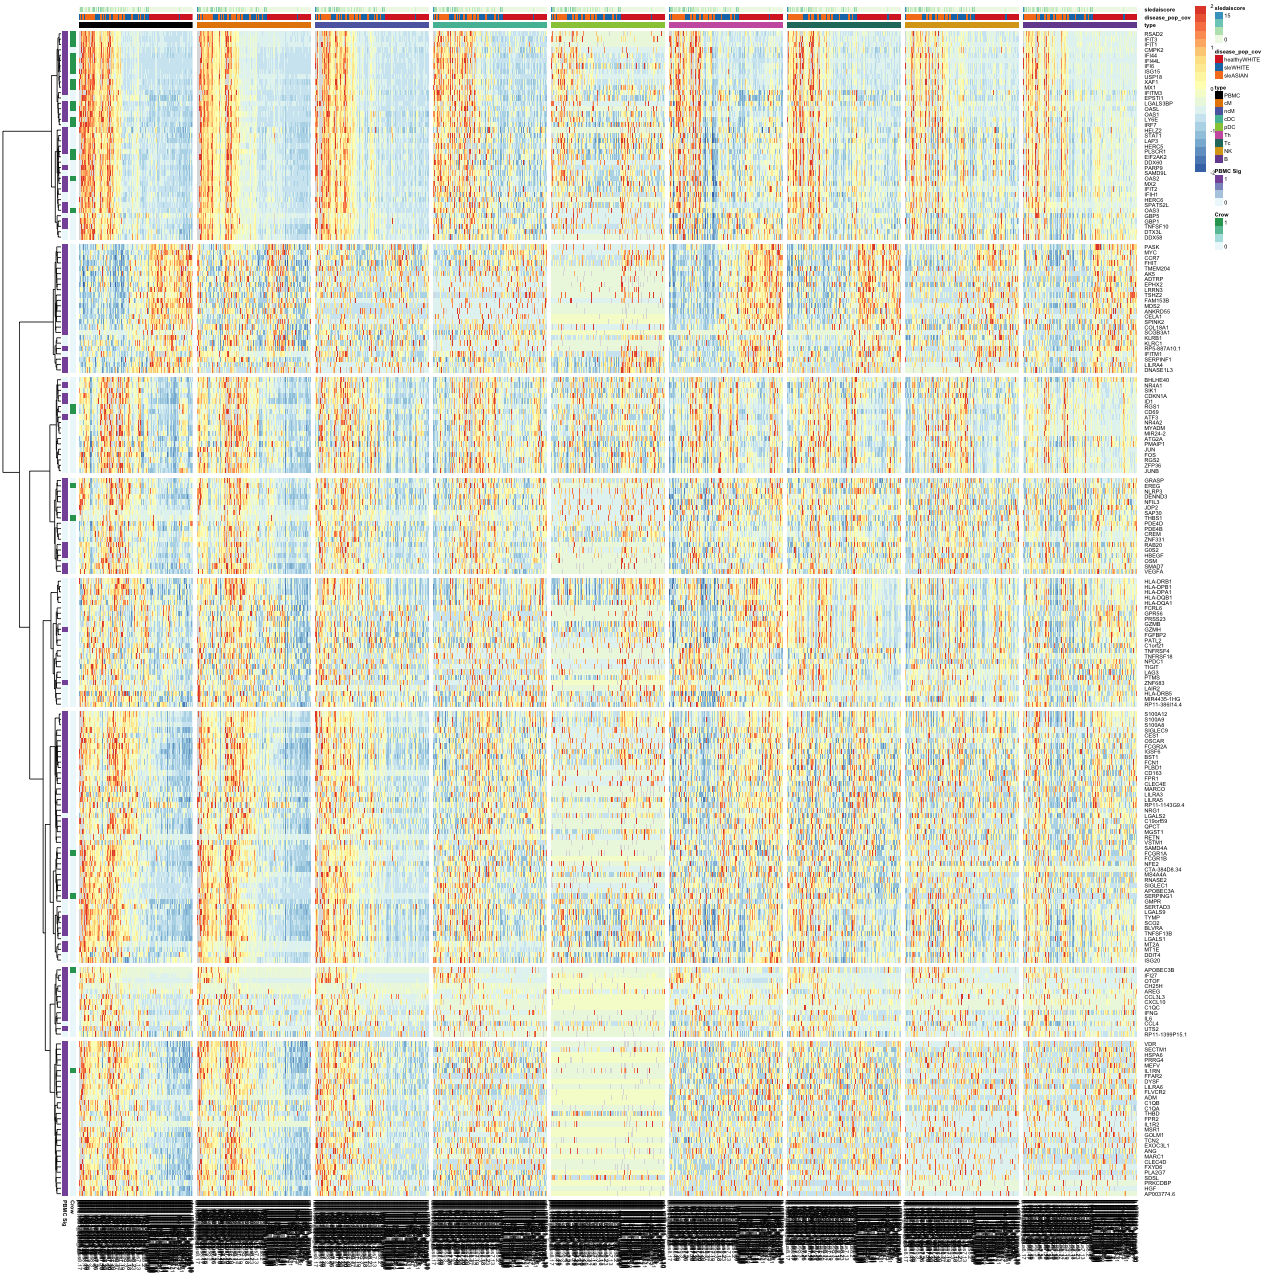

In [72]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

pheatmap_std_out <- pheatmap(all_expr_pbmc_counts_std_sig,
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,#annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_pbmc_counts),ncol(cm_expr_pbmc_counts)*length(cell_types),ncol(cm_expr_pbmc_counts)),
                         cutree_rows=8, 
                         scale="none",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",
                            width=10, height=10)
options(repr.plot.width = 10, repr.plot.height = 4)



## first let's run clustering using pheatmap and save the ordering of genes

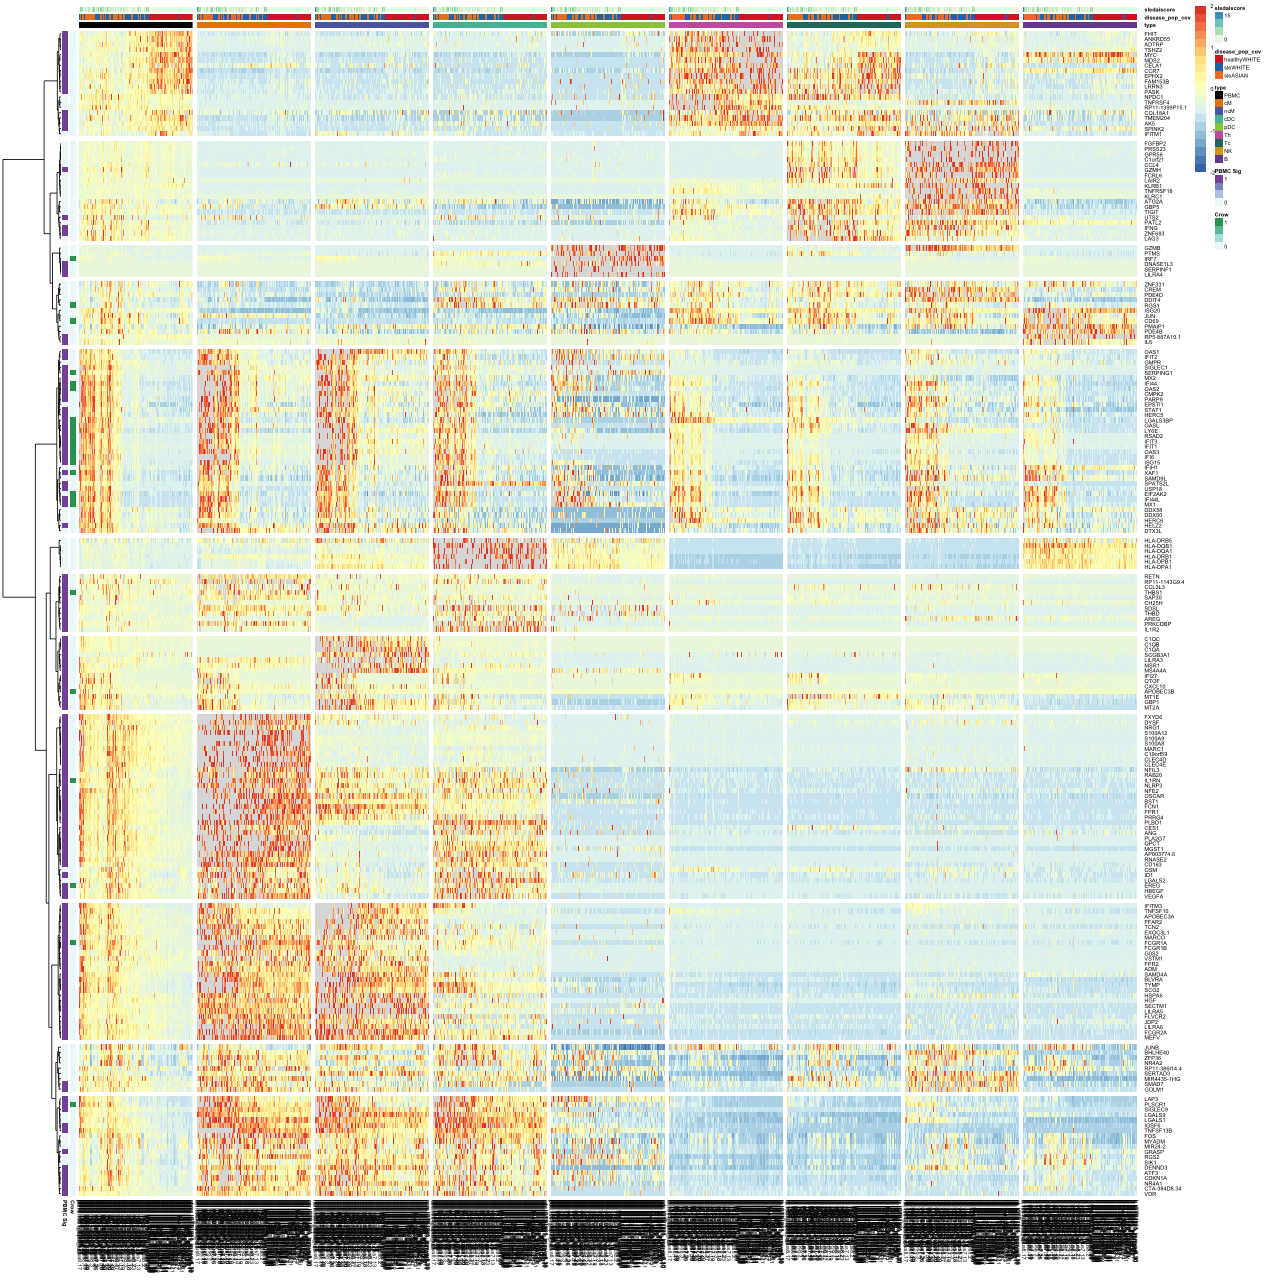

In [73]:
options(repr.plot.width = 16, repr.plot.height = 16)
pheatmap_ct_counts_out <- pheatmap(log(all_expr_ct_counts_sig+1),
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_ct_counts),ncol(cm_expr_ct_counts)*length(cell_types),ncol(cm_expr_ct_counts)),
                         cutree_rows=12, 
                         scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan")


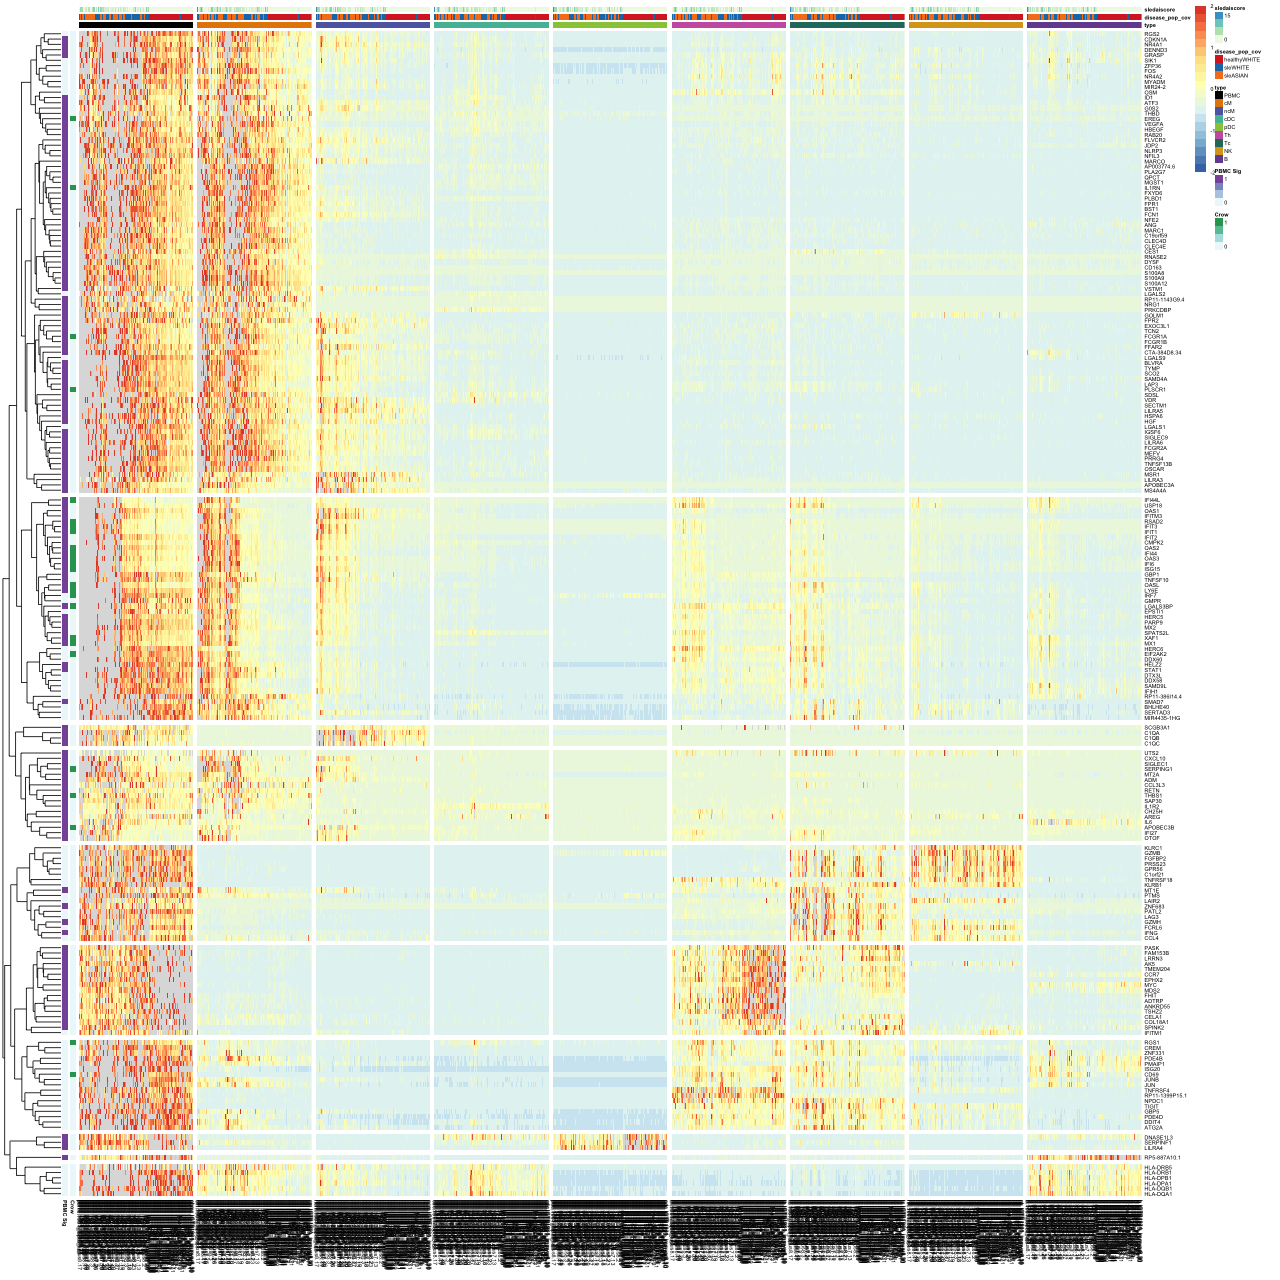

In [74]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)
pheatmap_pbmc_counts_out <- pheatmap(log(all_expr_pbmc_counts_sig+1),
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_pbmc_counts),ncol(cm_expr_pbmc_counts)*(length(cell_types)-1),ncol(cm_expr_pbmc_counts)),
                         cutree_rows=10,
                         scale="row",fontsize=5,clustering_method="complete",clustering_distance_row="manhattan")

## now let's plot it by ordering the clusters in a reasonable way

In [75]:
cuttree_out_unordered <- cutree(pheatmap_pbmc_counts_out$tree_row, k = 10)
t(unique(cuttree_out_unordered[pheatmap_pbmc_counts_out$tree_row$order]))

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,] 2    4    7    5    6    1    9    3    8    10

In [76]:
cuttree_out_unordered[which(cuttree_out_unordered==2)] <- "Mono";
cuttree_out_unordered[which(cuttree_out_unordered==4)] <- "Pan";
cuttree_out_unordered[which(cuttree_out_unordered==7)] <- "ncM";
cuttree_out_unordered[which(cuttree_out_unordered==5)] <- "Misc";
cuttree_out_unordered[which(cuttree_out_unordered==6)] <- "T8";
cuttree_out_unordered[which(cuttree_out_unordered==1)] <- "T4";
cuttree_out_unordered[which(cuttree_out_unordered==9)] <- "Lymph";
cuttree_out_unordered[which(cuttree_out_unordered==3)] <- "pDC";
cuttree_out_unordered[which(cuttree_out_unordered==8)] <- "B";
cuttree_out_unordered[which(cuttree_out_unordered==10)] <- "cDC";

# cuttree_out[which(cuttree_out==1)] <- "T1";
# cuttree_out[which(cuttree_out==5)] <- "Mono";
# cuttree_out[which(cuttree_out==8)] <- "T2";
# cuttree_out[which(cuttree_out==2)] <- "Mye1";
# cuttree_out[which(cuttree_out==6)] <- "Pan";
# cuttree_out[which(cuttree_out==3)] <- "Lymph";
# cuttree_out[which(cuttree_out==4)] <- "Mye2";
cuttree_out_unordered <- factor(cuttree_out_unordered, levels=c("Pan","Mono","ncM","cDC","pDC","Lymph","T4","T8","B","Misc"), ordered=T)
cuttree_out <- cuttree_out_unordered[order(cuttree_out_unordered)];

##cuttree_out <- cuttree_out[pheatmap_pbmc_counts_out$tree_row$order];


# cuttree_out[which(cuttree_out==7)] <- "T3";
# cuttree_out[which(cuttree_out==1)] <- "T1";
# cuttree_out[which(cuttree_out==5)] <- "Mono";
# cuttree_out[which(cuttree_out==8)] <- "T2";
# cuttree_out[which(cuttree_out==2)] <- "Mye1";
# cuttree_out[which(cuttree_out==6)] <- "Pan";
# cuttree_out[which(cuttree_out==3)] <- "Lymph";
# cuttree_out[which(cuttree_out==4)] <- "Mye2";

cuttree_gene_names <- names(cuttree_out);
cuttree_out <- data.frame(cuttree_gene_names,cuttree_out)
colnames(cuttree_out) <- c("gene","cluster")
cuttree_out <- as.data.frame(cuttree_out);
##cuttree_out[,"cluster"] <- factor(cuttree_out[,"cluster"], levels=unique(as.character(cuttree_out[,"cluster"])))
cuttree_out[,"gene"] <- as.character(cuttree_out[,"gene"])
write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

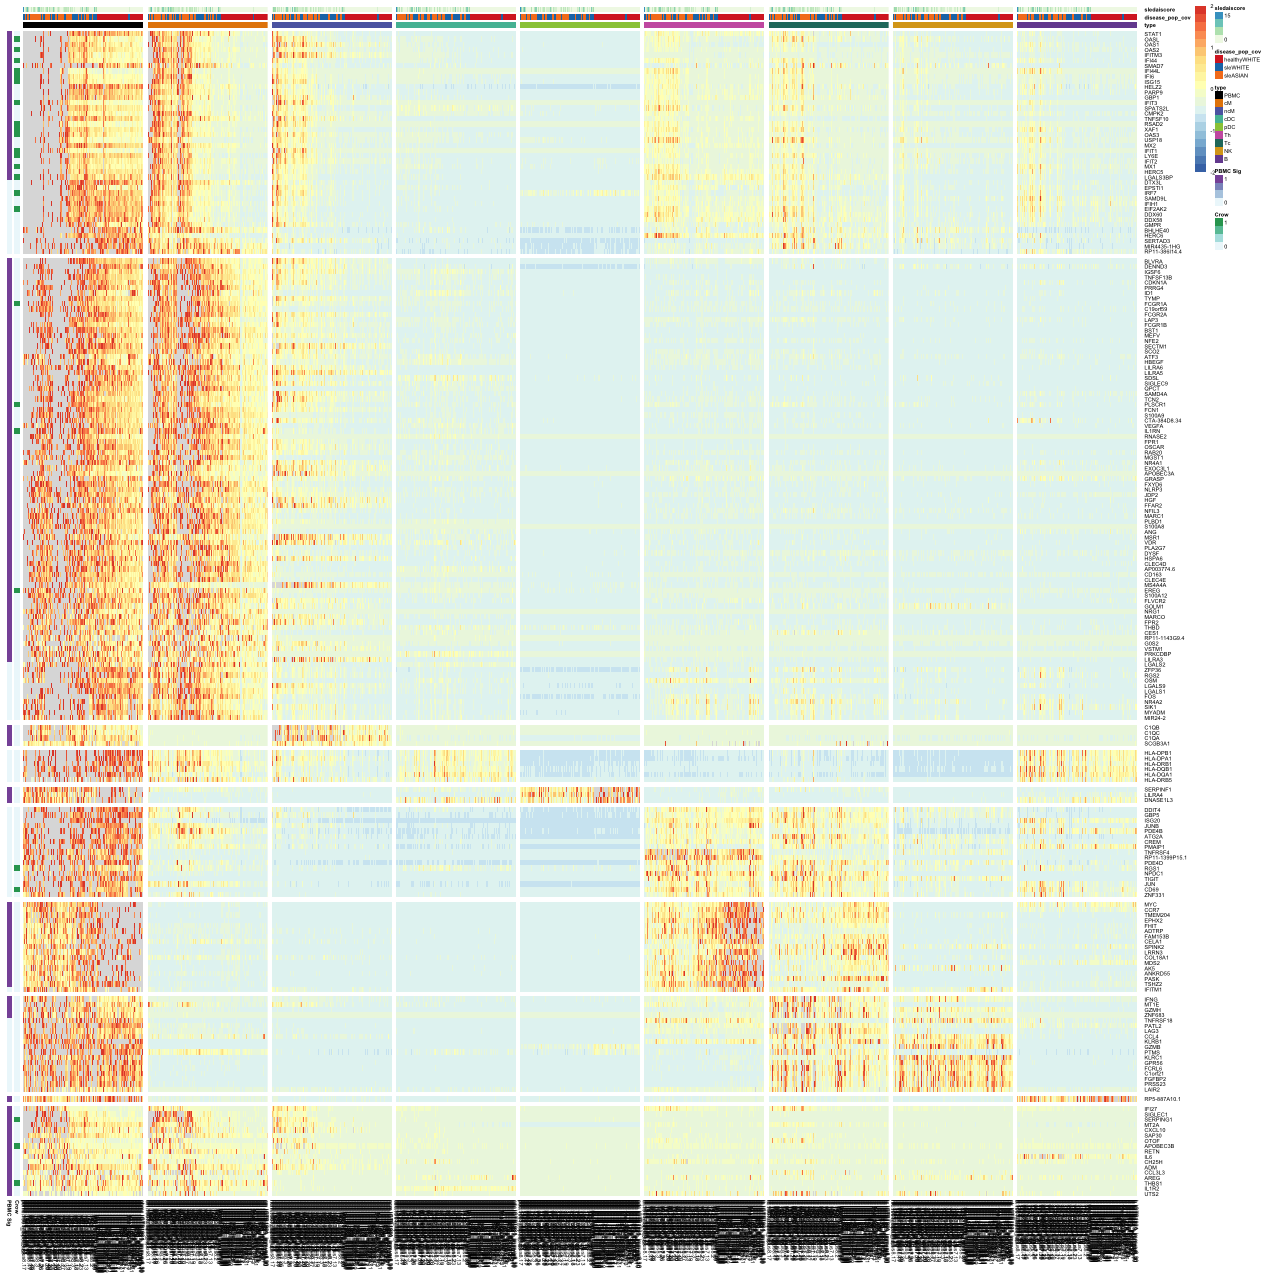

In [77]:
# options(repr.plot.width = 16, repr.plot.height = 16)
# breaksList = seq(-2.8, 2.8, by = .2)

options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

pheatmap_pbmc_counts_out <- pheatmap(log(all_expr_pbmc_counts_sig+1)[cuttree_out$gene,],
         cluster_rows=F, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_pbmc_counts),ncol(cm_expr_pbmc_counts)*length(cell_types),ncol(cm_expr_pbmc_counts)),
        gaps_row=(which(!duplicated(cuttree_out$cluster))-1)[-1],
                         scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan")

pheatmap_pbmc_counts_out <- pheatmap(log(all_expr_pbmc_counts_sig+1)[cuttree_out$gene,],
         cluster_rows=F, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_pbmc_counts),ncol(cm_expr_pbmc_counts)*length(cell_types),ncol(cm_expr_pbmc_counts)),
      gaps_row=(which(!duplicated(cuttree_out$cluster))-1)[-1],
                   scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",filename="expr_pbmc_counts_heatmap.png")


options(repr.plot.width = 10, repr.plot.height = 4)

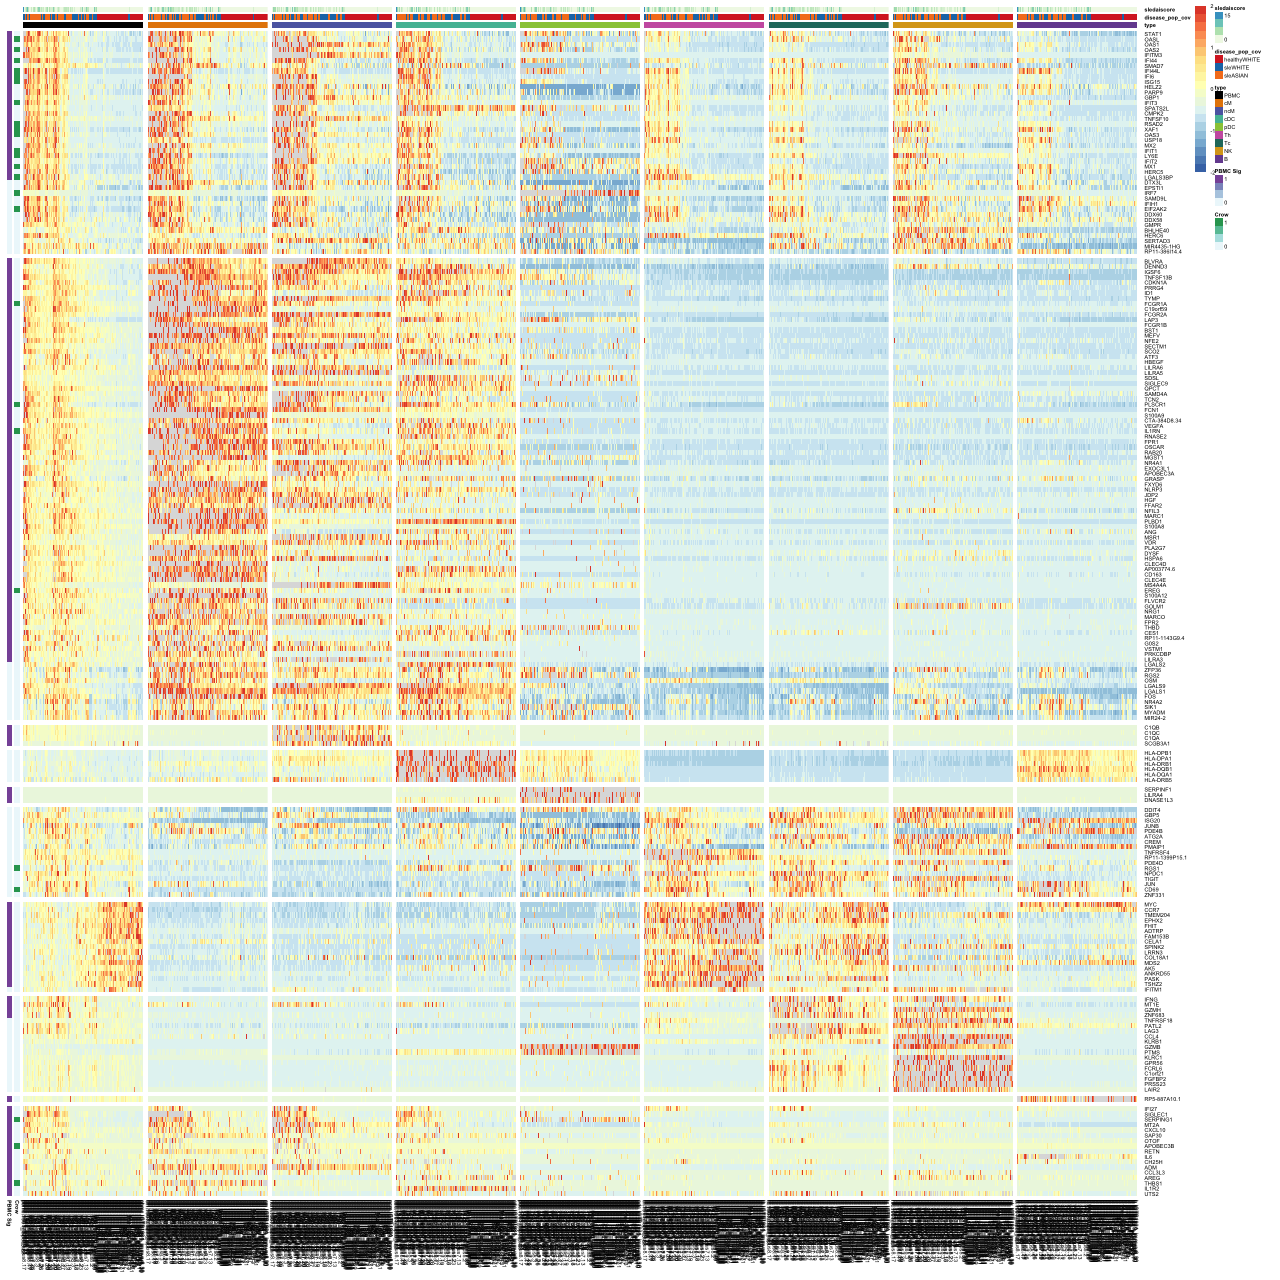

In [78]:
# options(repr.plot.width = 16, repr.plot.height = 16)
# breaksList = seq(-2.8, 2.8, by = .2)

options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

pheatmap_ct_counts_out <- pheatmap(log(all_expr_ct_counts_sig+1)[cuttree_out$gene,],
         cluster_rows=F, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_ct_counts),ncol(cm_expr_ct_counts)*length(cell_types),ncol(cm_expr_ct_counts)),
                         gaps_row=(which(!duplicated(cuttree_out$cluster))-1)[-1],
                         scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan")

pheatmap_ct_counts_out <- pheatmap(log(all_expr_ct_counts_sig+1)[cuttree_out$gene,],
         cluster_rows=F, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr_ct_counts),ncol(cm_expr_ct_counts)*length(cell_types),ncol(cm_expr_ct_counts)),
                         gaps_row=(which(!duplicated(cuttree_out$cluster))-1)[-1],
                         scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",filename="expr_ct_counts_heatmap.png")
options(repr.plot.width = 10, repr.plot.height = 4)

In [79]:
# # options(repr.plot.width = 16, repr.plot.height = 16)
# # breaksList = seq(-2.8, 2.8, by = .2)

# options(repr.plot.width = 16, repr.plot.height = 16)
# breaksList = seq(-2, 2, by = .2)

# pheatmap_ct_counts_out <- pheatmap(props,
#          cluster_rows=pheatmap_pbmc_counts_out$tree_row, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
#          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
#         breaks = breaksList, # Sets the breaks of the color scale as in breaksList
#         gaps_col=seq(ncol(cm_expr_ct_counts),ncol(cm_expr_ct_counts)*length(cell_types),ncol(cm_expr_ct_counts)),
#                          cutree_rows=15, 
#                          scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan")

# pheatmap_ct_counts_out <- pheatmap(props,
#          cluster_rows=pheatmap_pbmc_counts_out$tree_row, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,
#          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
#         breaks = breaksList, # Sets the breaks of the color scale as in breaksList
#         gaps_col=seq(ncol(cm_expr_ct_counts),ncol(cm_expr_ct_counts)*length(cell_types),ncol(cm_expr_ct_counts)),
#                          cutree_rows=15, 
#                          scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",filename="props_heatmap.png")
# options(repr.plot.width = 10, repr.plot.height = 4)

## make some volcano plots

In [80]:
options(repr.plot.width = 4, repr.plot.height = 4)
pbmc_deseq$ifn=pbmc_deseq$V1 %in% ifn_crow$V1
pbmc_deseq$sig=rep("cnot significant",nrow(pbmc_deseq))
pbmc_deseq$sig[match(deseq_sig_genes, pbmc_deseq$V1)]="bct_sig";
pbmc_deseq$sig[match(pbmc_deseq_sig_genes, pbmc_deseq$V1)]="apbmc_sig";

pbmc_deseq <- pbmc_deseq[order(pbmc_deseq$sig,decreasing=T),]
# !(abs(pbmc_deseq$log2FoldChange)>1) & (which(pbmc_deseq$qval < 0.01))

lim=max(abs(pbmc_deseq$log2FoldChange)) + 0.2
min_lim=-lim

##pdf(paste(ct, '.volcano.pdf', sep=''), useDingbats=F)
g = ggplot(pbmc_deseq, aes(x=log2FoldChange, y=-log10(pvalue), color=sig))+ theme_linedraw()+theme(legend.position="none") + xlim(-4.5, 4.5) + geom_point()+geom_point(data=pbmc_deseq[pbmc_deseq$ifn,],
             pch=21, fill=NA, size=4, colour="black", stroke=1)+scale_color_grey()+scale_fill_grey()
ggsave(g, filename="pbmc_deseq.png", width=3, height=3, dpi=300)
##dev.off()


Warning message:
“Removed 2 rows containing missing values (geom_point).”

## More principled way to cut the tree and label the specific signatures

In [82]:
# cuttree_out <- cutree(pheatmap_pbmc_counts_out$tree_row, k = 15)
# cuttree_out <- cuttree_out[pheatmap_pbmc_counts_out$tree_row$order];
# # cuttree_out[which(cuttree_out==7)] <- "T3";
# # cuttree_out[which(cuttree_out==1)] <- "T1";
# # cuttree_out[which(cuttree_out==5)] <- "Mono";
# # cuttree_out[which(cuttree_out==8)] <- "T2";
# # cuttree_out[which(cuttree_out==2)] <- "Mye1";
# # cuttree_out[which(cuttree_out==6)] <- "Pan";
# # cuttree_out[which(cuttree_out==3)] <- "Lymph";
# # cuttree_out[which(cuttree_out==4)] <- "Mye2";

# cuttree_gene_names <- names(cuttree_out);
# cuttree_out <- cbind(cuttree_gene_names,cuttree_out)
# colnames(cuttree_out) <- c("gene","cluster")
# cuttree_out <- as.data.frame(cuttree_out);
# cuttree_out[,"cluster"] <- factor(cuttree_out[,"cluster"], levels=unique(as.character(cuttree_out[,"cluster"])))
# write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

In [83]:
# cuttree_out <- cutree(pheatmap_std_out$tree_row, k = 8)
# cuttree_out <- cuttree_out[pheatmap_std_out$tree_row$order];
# cuttree_out[which(cuttree_out==7)] <- "T3";
# cuttree_out[which(cuttree_out==1)] <- "T1";
# cuttree_out[which(cuttree_out==5)] <- "Mono";
# cuttree_out[which(cuttree_out==8)] <- "T2";
# cuttree_out[which(cuttree_out==2)] <- "Mye1";
# cuttree_out[which(cuttree_out==6)] <- "Pan";
# cuttree_out[which(cuttree_out==3)] <- "Lymph";
# cuttree_out[which(cuttree_out==4)] <- "Mye2";

# cuttree_gene_names <- names(cuttree_out);
# cuttree_out <- cbind(cuttree_gene_names,cuttree_out)
# colnames(cuttree_out) <- c("gene","cluster")
# cuttree_out <- as.data.frame(cuttree_out);
# cuttree_out[,"cluster"] <- factor(cuttree_out[,"cluster"], levels=unique(as.character(cuttree_out[,"cluster"])))
# write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

In [84]:
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Pan"]), file="Pan.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mye2"]), file="Mye2.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mye1"]), file="Mye1.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mono"]), file="Mono.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T1"]), file="T1.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T2"]), file="T2.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T3"]), file="T3.txt", row.names=F, col.names=F, quote=F, sep=",")
# write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Lymph"]), file="Lymph.txt", row.names=F, col.names=F, quote=F, sep=",")

# write.table(as.character(cuttree_out$gene), file="All.txt", row.names=F, col.names=F, quote=F, sep=",")



# Figure 2B - correlogram to show coexpressed genes

In [85]:
# no_pbmc_cor <- cor(t(all_expr_sig[,-c(1,ncol(pbmc_expr))]))
# options(repr.plot.width = 6, repr.plot.height = 6)
# pheatmap(no_pbmc_cor,
#          cluster_rows=pheatmap_out$tree_row, cluster_cols=pheatmap_out$tree_row, #annotation_row = kmeans_annotation,
#          fontsize=3)
# options(repr.plot.width = 4, repr.plot.height = 4)

In [86]:
# cor(joined_pivot$sledaiscore, joined_pivot$cM)
# cor(joined_pivot_sle$sledaiscore, joined_pivot_sle$cM)
# cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")], joined_pivot_sle$cM[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")])
# cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")], joined_pivot_sle$cM[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")])
# cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(deseq_sig_genes,rownames(pbmc_sle_expr_std)),]))
# cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),]))
# cor(joined_pivot_sle$sledaiscore, colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),]))
# cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene,rownames(pbmc_sle_expr_std)),]))
# cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Lymph"],rownames(pbmc_sle_expr_std)),]))


# cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")], colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),])[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")])
# cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")], colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),])[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")])

# Figure 2C: Proportion of variance explained


First, we are going to estimate proportion of variance explained by cell type proportion

This will be a multiple regression

\begin{equation*}
e_i = -1 + b_1\times p_1 + b_2\times p_2 + ... + b_n\times p_n
\end{equation*}

Next, we are going to estimate proportion of variance explained by cell type specific expression

This will be a multiple regression


\begin{equation*}
e_i = -1 + b_1\times e_1 + b_2\times e_2 + ... + b_n\times e_n
\end{equation*}

calculate adjusted r_2 and also the cell type specific r2

Y_i = %mono*mono_i + %other*other_i + err
Or
Y_i = %mono*mono_i
log(Y_i) = log(%mono)+log(mono_i)+err


## Let's define some useful functions

## Processing all - now, let's fit with -1 but we need to standardize the outcome

In [87]:
# i = 347;

# expr <- pbmc_expr;
# props <- props;
# exprs <- exprs;
# expr_res <- pbmc_expr;
# cov_prop_mat <- cov(props);

# model <- lm(expr[i,]~props-1)
# coef = summary(model)$coef[,1];
# expr_res[i,] <- residuals(model);

# vars_prop = NULL;
        
# for(j in 1:ncol(props)) {
#             var_j_prop = sum(cov_prop_mat[j,]*coef[j]*coef);
#             vars_prop <- c(vars_prop, var_j_prop);
#         }
        
#         r2s_prop = vars_prop/sum(vars_prop);
        
#         r2_prop = sum(vars_prop)/var(expr[i,]);
#         r2_prop_adj = r2_prop-(1-r2_prop)*(ncol(props))/(ncol(expr)-ncol(props)-1);

#         cov_expr_mat <- cov(exprs[i,,]);
        
#         vars_expr <- NULL;
#         covars_expr <- NULL;
        
#         for(j in 1:dim(exprs)[[3]]) {
#             var_j_expr = diag(cov_expr_mat)[[j]]; ##sum(cov_expr_mat[j,]);
#             covar_j_expr = sum(cov_expr_mat[j,])-diag(cov_expr_mat)[[j]];
#             vars_expr <- c(vars_expr, var_j_expr);
#             covars_expr <- c(covars_expr, covar_j_expr)
#         }
        
#         if(i == 1){
#             print(cov_expr_mat);
#             print(var_j_expr)};
        
#         r2s_expr = vars_expr/sum(vars_expr);
#         r2_expr = sum(vars_expr)/var(expr_res[i,]);
#         r2_expr_adj = r2_expr-(1-r2_expr)*dim(exprs)[[3]]/(ncol(expr)-dim(exprs)[[3]]-1);
    
#         r2s_covar_expr = covars_expr/sum(covars_expr);
#         r2_covar_expr = sum(covars_expr)/var(expr_res[i,]);
#         r2_covar_expr_adj = r2_covar_expr-(1-r2_covar_expr)*dim(exprs)[[3]]/(ncol(expr)-dim(exprs)[[3]]-1);
    
# var(expr[i,])
# t(vars_expr)
# t(covars_expr)
# sum(t(vars_expr))/var(expr[i,])
# sum(t(covars_expr))/var(expr[i,])
# sum(t(covars_expr))/var(expr[i,])

# sum(cov_expr_mat[j,])

In [88]:
# source("helper_functions.R")
# output_prop_expr_noint_noah <- model_prop_expr_noah(pbmc_expr, props, exprs);
# # output_prop_noint <- model_prop(pbmc_expr_std, props);
# # output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
# output_prop_noint_noah <- output_prop_expr_noint_noah[[1]];
# output_expr_noint_noah <- output_prop_expr_noint_noah[[2]];
# output_covar_expr_noint_noah <- output_prop_expr_noint_noah[[3]];

In [89]:
# mean(output_prop_noint_noah[,"total r2"])
# mean(output_expr_noint_noah[,"total r2"])
# mean(output_covar_expr_noint_noah[,"total r2"])

In [90]:
# t(output_expr_noint_noah[347,])

# write.table(pbmc_expr["CD14",],file="pbmc.counts");
# write.table(props, file="cell.props")
# write.table(exprs["CD14",,], file="ct.counts")
# write.table(pbmc_total[match(colnames(exprs),names(pbmc_total))], file="cell.counts")

In [102]:
source("helper_functions.R")
output_prop_expr_noint <- model_prop_expr_noah(pbmc_expr, props, exprs_pbmc_counts);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint <- output_prop_expr_noint[[1]];
output_expr_noint <- output_prop_expr_noint[[2]];

In [ ]:
# output_prop_expr_noint_prop_rand <- model_prop_expr_noah(pbmc_expr, props[sample(1:nrow(props)),], exprs);
# # output_prop_noint <- model_prop(pbmc_expr_std, props);
# # output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
# output_prop_noint_prop_rand <- output_prop_expr_noint_prop_rand[[1]];
# output_expr_noint_prop_rand <- output_prop_expr_noint_prop_rand[[2]];
# mean(output_prop_noint_prop_rand[,"adj prop_expr r2"])

In [ ]:
# output_prop_expr_noint_expr_rand <- model_prop_expr_noah(pbmc_expr, props, exprs[,sample(dimnames(exprs)[[2]]),]);
# # output_prop_noint <- model_prop(pbmc_expr_std, props);
# # output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
# output_prop_noint_expr_rand <- output_prop_expr_noint_expr_rand[[1]];
# output_expr_noint_expr_rand <- output_prop_expr_noint_expr_rand[[2]];
# mean(output_prop_noint_expr_rand[,"adj prop_expr r2"])

In [ ]:
# output_prop_expr_noint_both_rand <- model_prop_expr_noah(pbmc_expr[,sample(colnames(pbmc_expr))], props, exprs);
# # output_prop_noint <- model_prop(pbmc_expr_std, props);
# # output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
# output_prop_noint_both_rand <- output_prop_expr_noint_both_rand[[1]];
# output_expr_noint_both_rand <- output_prop_expr_noint_both_rand[[2]];
# mean(output_prop_noint_both_rand[,"adj prop_expr r2"])

## testing out nnls fit

In [ ]:
# model_lm <- lm(pbmc_expr_std[407,]~props+exprs_std[407,,]-1)
# ##model_nnls <- nnls(cbind(props,exprs_std[407,,]), pbmc_expr_std[407,])
# model_nnls <- nnls(cbind(props), pbmc_expr_std[407,])

# cov_mat <- cov(cbind(props, exprs_std[407,,]));

# vars_lm <- NULL;
# coef = summary(model_lm)$coef[,1]
# for(j in 1:(ncol(props)+dim(exprs)[[3]])) {
#             var_j = sum(cov_mat[j,]*coef[j]*coef);
#             vars_lm <- c(vars_lm, var_j);
#         }

# vars_nnls <- NULL;
# coef = model_nnls$x
# # for(j in 1:(ncol(props)+dim(exprs)[[3]])) {
# #             var_j = sum(cov_mat[j,]*coef[j]*coef);
# #             vars_nnls <- c(vars_nnls, var_j);
# #         }

# for(j in 1:(ncol(props))) {
#             var_j = sum(cov_mat[j,]*coef[j]*coef);
#             vars_nnls <- c(vars_nnls, var_j);
#         }

# vars_lm/sum(vars_lm)*100

## Processing SLE

In [103]:
output_sle_prop_expr_noint <- model_prop_expr_noah(pbmc_sle_expr, props_sle, exprs_sle_pbmc_counts);
# output_sle_prop_noint <- model_prop(pbmc_sle_expr_std, props_sle);
# output_sle_expr_noint <- model_expr(pbmc_sle_expr_std, exprs_sle_std);
output_sle_prop_noint <- output_sle_prop_expr_noint[[1]];
output_sle_expr_noint <- output_sle_prop_expr_noint[[2]];

In [ ]:
# output_sle_prop_noint_small <- model_prop(pbmc_sle_expr_std[1:100,], props_sle);
# output_sle_expr_noint_small <- model_expr(pbmc_sle_expr_std[1:100,], exprs_sle_std);

### Downsampled SLE to 46 samples

In [111]:
## including dc analysis
##N <- 22;
samples_asian <- joined_ind_cov_batch[which(joined_pivot$disease_pop=="sleASIAN")]
samples_white <- joined_ind_cov_batch[which(joined_pivot$disease_pop=="sleWHITE")]

## including dc analysis
output_sle_asian_prop_expr_noint <- model_prop_expr_noah(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle_pbmc_counts[,samples_asian,]);
# output_sle_asian_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,]);
# output_sle_asian_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_asian], exprs_sle_std[,samples_asian,]);
output_sle_asian_prop_noint <- output_sle_asian_prop_expr_noint[[1]];
output_sle_asian_expr_noint <- output_sle_asian_prop_expr_noint[[2]];

output_sle_white_prop_expr_noint <- model_prop_expr_noah(pbmc_sle_expr[,samples_white], props_sle[samples_white,], exprs_sle_pbmc_counts[,samples_white,]);
# output_sle_white_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,]);
# output_sle_white_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_white], exprs_sle_std[,samples_white,]);
output_sle_white_prop_noint <- output_sle_white_prop_expr_noint[[1]]
output_sle_white_expr_noint <- output_sle_white_prop_expr_noint[[2]]

# samples <- sample(1:ncol(pbmc_sle_expr_std), N)
# output_sle_down_prop_noint <- model_prop(pbmc_sle_expr_std[,samples], props_sle[samples,]);
# output_sle_down_expr_noint <- model_expr(pbmc_sle_expr_std[,samples], exprs_sle_std[,samples,]);


In [ ]:
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^UTS2$",expr_gene_names)[1])


In [36]:
source("helper_functions.R")
options(repr.plot.width = 20, repr.plot.height = 3)
props_all = rbind(data.frame(props_broad_healthy,pop="broad_white"),
                  data.frame(props_sle[samples_asian,],pop="sle_asian"),
                  data.frame(props_sle[samples_white,],pop="sle_white"))

exprs_all = list(exprs_broad_healthy_std, exprs_sle_std[,samples_asian,], exprs_sle_std[,samples_white,])

expr_all = cbind(pbmc_broad_healthy_expr_std, pbmc_sle_expr_std[,c(samples_asian,samples_white)])

il6 <- plot_single_gene_prop(expr_all, props_all,grep("^IL6$",expr_gene_names)[1])
ggsave(il6, file="IL6_prop.png",width=11, height=2)

il6 <- plot_single_gene_expr(expr_all, exprs_all, grep("^IL6$",expr_gene_names)[1])
ggsave(il6, file="IL6_expr.png",width=11, height=2)

## ifi27 asian vs cau differences
ifi27 <- plot_single_gene_prop(expr_all, props_all, grep("^IFI27$",expr_gene_names)[1])
ggsave(ifi27, file="IFI27.png",width=11, height=2)
ifi44l <- plot_single_gene_prop(expr_all, props_all, grep("^IFI44L$",expr_gene_names)[1])
ggsave(ifi44l, file="IFI44L.png",width=11, height=2)
ccr7 <- plot_single_gene_prop(expr_all, props_all, grep("^CCR7$",expr_gene_names)[1])
ggsave(ccr7, file="CCR7.png",width=11, height=2)
nlrp3 <- plot_single_gene_prop(expr_all, props_all, grep("^NLRP3$",expr_gene_names)[1])
ggsave(nlrp3, file="NLRP3.png", width=11, height=2)
thbs1 <- plot_single_gene_prop(expr_all, props_all, grep("^THBS1$",expr_gene_names)[1])
ggsave(thbs1, file="THBS1.png", width=11, height=2)
ifng <- plot_single_gene_prop(expr_all, props_all, grep("^IFNG$",expr_gene_names)[1])
ggsave(ifng, file="IFNG.png",width=11, height=2)
lilra4 <- plot_single_gene_prop(expr_all, props_all, grep("^LILRA4$",expr_gene_names)[1])
ggsave(lilra4, file="LILRA4.png",width=11, height=2)
cd4 <- plot_single_gene_prop(expr_all, props_all, grep("^CD4$",expr_gene_names)[1])
ggsave(cd4, file="CD4.png",width=11, height=2)
lck <- plot_single_gene_prop(expr_all, props_all, grep("^LCK$",expr_gene_names)[1])
ggsave(lck, file="LCK.png",width=11, height=2)
cd14 <- plot_single_gene_prop(expr_all, props_all, grep("^CD14$",expr_gene_names)[1])
ggsave(cd14, file="CD14.png",width=11, height=2)


ERROR: Error in data.frame(props_broad_healthy, pop = "broad_white"): object 'props_broad_healthy' not found


In [ ]:
# head(props_all)

In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(props_all$pop, expr_all[grep("^IFI6$",expr_gene_names),])

In [ ]:
# plot(expr_all[grep("^IFI44L$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [ ]:
# plot(expr_all[grep("^IFNG$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [ ]:
# cor(expr_all[grep("^IL6$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [ ]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^IL6$",expr_gene_names)[1])


# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^ERAP2$",expr_gene_names)[1])

# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^CD3E$",expr_gene_names)[1])

# # test_single_gene(pbmc_sle_expr_std, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])
# # test_single_gene(pbmc_sle_expr, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])

## Processing UCSF healthy

In [112]:
output_ucsf_healthy_prop_expr_noint <- model_prop_expr_noah(pbmc_ucsf_healthy_expr, props_ucsf_healthy, exprs_ucsf_healthy_pbmc_counts);
# output_ucsf_healthy_prop_noint <- model_prop(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy);
# output_ucsf_healthy_expr_noint <- model_expr(pbmc_ucsf_healthy_expr_std, exprs_ucsf_healthy_std);
output_ucsf_healthy_prop_noint <- output_ucsf_healthy_prop_expr_noint[[1]]
output_ucsf_healthy_expr_noint <- output_ucsf_healthy_prop_expr_noint[[2]]

In [ ]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# t(which(output_ucsf_healthy_expr_noint[,8]>1000))
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy_std, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr, props_ucsf_healthy, exprs_ucsf_healthy, grep("^RALBP1$",expr_gene_names)[1])

In [ ]:
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy_std, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr, props_ucsf_healthy, exprs_ucsf_healthy, grep("^IL6$",expr_gene_names)[1])

## Processing Broad healthy

In [113]:
output_broad_healthy_prop_expr_noint <- model_prop_expr_noah(pbmc_broad_healthy_expr, props_broad_healthy, exprs_broad_healthy_pbmc_counts);
# output_broad_healthy_prop_noint <- model_prop(pbmc_broad_healthy_expr_std, props_broad_healthy);
# output_broad_healthy_expr_noint <- model_expr(pbmc_broad_healthy_expr_std, exprs_broad_healthy_std);
output_broad_healthy_prop_noint <- output_broad_healthy_prop_expr_noint[[1]];
output_broad_healthy_expr_noint <- output_broad_healthy_prop_expr_noint[[2]];


In [ ]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# t(which(output_broad_healthy_expr_noint[,8]>1000))
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr, props_broad_healthy, exprs_broad_healthy, grep("^RALBP1$",expr_gene_names)[1])

In [ ]:
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr, props_broad_healthy, exprs_broad_healthy, grep("^IL6$",expr_gene_names)[1])

## matching ucsf and broad

In [ ]:
# a <- match(sapply(rownames(props_ucsf_healthy),function(x){strsplit(x,"_")[[1]][[1]]}), sapply(rownames(props_broad_healthy), function(x) {strsplit(x,"_")[[1]][[1]]}))

# props_ucsf_healthy_matched <- props_ucsf_healthy[!is.na(a),]
# props_broad_healthy_matched <- props_broad_healthy[na.omit(a),]

# pbmc_ucsf_healthy_expr_matched <- pbmc_ucsf_healthy_expr[,!is.na(a)]
# pbmc_broad_healthy_expr_matched <- pbmc_broad_healthy_expr[,na.omit(a)]

# pbmc_ucsf_healthy_expr_std_matched <- pbmc_ucsf_healthy_expr_std[,!is.na(a)]
# pbmc_broad_healthy_expr_std_matched <- pbmc_broad_healthy_expr_std[,na.omit(a)]

# exprs_ucsf_healthy_std_matched <- exprs_ucsf_healthy_std[,!is.na(a),]
# exprs_broad_healthy_std_matched <- exprs_broad_healthy_std[,na.omit(a),]

# exprs_ucsf_healthy_matched <- exprs_ucsf_healthy[,!is.na(a),]
# exprs_broad_healthy_matched <- exprs_broad_healthy[,na.omit(a),]


# output_ucsf_healthy_prop_expr_noint_matched <- model_prop_expr_noah(pbmc_ucsf_healthy_expr_matched, props_ucsf_healthy_matched,exprs_ucsf_healthy_matched);
# # output_ucsf_healthy_prop_noint_matched <- model_prop(pbmc_ucsf_healthy_expr_std_matched, props_ucsf_healthy_matched);
# # output_ucsf_healthy_expr_noint_matched <- model_expr(pbmc_ucsf_healthy_expr_std_matched, exprs_ucsf_healthy_std_matched);
# output_ucsf_healthy_prop_noint_matched <- output_ucsf_healthy_prop_expr_noint_matched[[1]]
# output_ucsf_healthy_expr_noint_matched <- output_ucsf_healthy_prop_expr_noint_matched[[2]]

# output_broad_healthy_prop_expr_noint_matched <- model_prop_expr_noah(pbmc_broad_healthy_expr_std_matched, props_broad_healthy_matched, exprs_broad_healthy_std_matched);
# # output_broad_healthy_prop_noint_matched <- model_prop(pbmc_broad_healthy_expr_std_matched, props_broad_healthy_matched);
# # output_broad_healthy_expr_noint_matched <- model_expr(pbmc_broad_healthy_expr_std_matched, exprs_broad_healthy_std_matched);
# output_broad_healthy_prop_noint_matched <- output_broad_healthy_prop_expr_noint_matched[[1]];
# output_broad_healthy_expr_noint_matched <- output_broad_healthy_prop_expr_noint_matched[[2]];


## Summarize and plotting results

Warning message:
“Removed 47 rows containing missing values (geom_point).”

cor         prop_mean expr_mean sum_mean 
all           -0.65995476 21.754380  61.32895  83.08333
sle           -0.55504366 16.307915  62.31758  78.62550
sle_asian     -0.45086304 14.257269  64.89831  79.15558
sle_white     -0.53853610 16.512799  64.22605  80.73885
ucsf_healthy  -0.06223841  8.183567 122.26617 130.44974
broad_healthy -0.45376968 15.347445  72.18976  87.53721

cM        Th         B         NK        ncM      Tc       
all_prop            7.106874  1.9687108  2.935631  2.318147 2.973545  1.576858
all_expr           14.472057 13.6944422  7.122476  4.310541 3.796790 11.321233
sle_prop            5.862229  1.7132709  3.693279  2.543524 3.046843  2.212167
sle_expr           18.134211 12.2816519  7.623298  4.651917 4.516470 12.212587
sle_asian_prop      5.366511  3.4607539  3.946254  2.190167 3.334704  2.901377
sle_asian_expr     18.656526 11.4210049  9.046439  4.683996 4.736075 13.479540
sle_white_prop      7.588606  1.9460944  3.877818  5.281007 4.142758  1.592154
sle_white_expr     18.201989 14.5131245  6.855457  6.302430 5.526021 11.283170
ucsf_healthy_prop   6.752497  0.7601364  5.093721 10.273714 5.443268  4.261150
ucsf_healthy_expr  17.218180 25.4536637 11.921373 13.021911 9.077373 16.859466
broad_healthy_prop  8.364758  0.6055175  4.451641  5.234538 2.971752  2.055808
broad_healthy_expr 13.735185 17.1993488  9.996351  7.530758 6.089356 12.963795
                   cDC      pDC       total.r2  adj.r2     adj.prop_expr.r2
all_prop           1.005107  5.234909  25.11978  21.754380  83.08333       
all_expr           2.770955  5.503726  62.99222  61.328948  83.08333       
sle_prop           1.797138  1.162000  22.03045  16.307915  78.62550       
sle_expr           3.611346  1.862678  64.89416  62.317583  78.62550       
sle_asian_prop     2.373496  1.928954  25.50222  14.257269  79.15558       
sle_asian_expr     4.763124  2.715103  69.50181  64.898306  79.15558       
sle_white_prop     2.180839  2.047115  28.65639  16.512799  80.73885       
sle_white_expr     3.912826  2.834518  69.42954  64.226055  80.73885       
ucsf_healthy_prop  5.205296  5.371474  43.16126   8.183567 130.44974       
ucsf_healthy_expr  9.877265 10.354589 113.78382 122.266171 130.44974       
broad_healthy_prop 2.005950  4.379664  30.06963  15.347445  87.53721       
broad_healthy_expr 4.437716  5.073814  77.02633  72.189763  87.53721

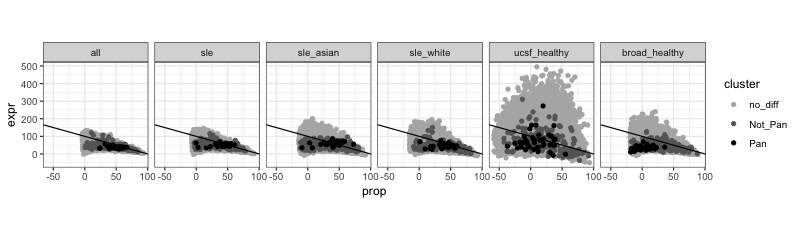

In [115]:
output_noint_df <- data.frame(prop=output_prop_noint[,"adj r2"], expr=output_expr_noint[,"adj r2"], type="all")
output_noint_df$cluster <- "no_diff";
output_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_sle_noint_df <- data.frame(prop=output_sle_prop_noint[,"adj r2"], expr=output_sle_expr_noint[,"adj r2"], type="sle")
output_sle_noint_df$cluster <- "no_diff";
output_sle_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_noint_df))] <- as.character(cuttree_out[,"cluster"]);

# output_sle_down_noint_df <- data.frame(prop=output_sle_down_prop_noint[,"adj r2"], expr=output_sle_down_expr_noint[,"adj r2"], type="sle_down")
# output_sle_down_noint_df$cluster <- "no_diff";
# output_sle_down_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_down_noint_df))] <- cuttree_out[,"cluster"];

output_sle_asian_noint_df <- data.frame(prop=output_sle_asian_prop_noint[,"adj r2"], expr=output_sle_asian_expr_noint[,"adj r2"], type="sle_asian")
output_sle_asian_noint_df$cluster <- "no_diff";
output_sle_asian_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_asian_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_sle_white_noint_df <- data.frame(prop=output_sle_white_prop_noint[,"adj r2"], expr=output_sle_white_expr_noint[,"adj r2"], type="sle_white")
output_sle_white_noint_df$cluster <- "no_diff";
output_sle_white_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_white_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_ucsf_healthy_noint_df <- data.frame(prop=output_ucsf_healthy_prop_noint[,"adj r2"], expr=output_ucsf_healthy_expr_noint[,"adj r2"], type="ucsf_healthy")
output_ucsf_healthy_noint_df$cluster <- "no_diff";
output_ucsf_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_ucsf_healthy_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_broad_healthy_noint_df <- data.frame(prop=output_broad_healthy_prop_noint[,"adj r2"], expr=output_broad_healthy_expr_noint[,"adj r2"], type="broad_healthy")
output_broad_healthy_noint_df$cluster <- "no_diff";
output_broad_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_broad_healthy_noint_df))] <- as.character(cuttree_out[,"cluster"]);

# output_ucsf_healthy_noint_matched_df <- data.frame(prop=output_ucsf_healthy_prop_noint_matched[,"adj r2"], expr=output_ucsf_healthy_expr_noint_matched[,"adj r2"], type="ucsf_healthy_matched")
# output_ucsf_healthy_noint_matched_df$cluster <- "no_diff";
# output_ucsf_healthy_noint_matched_df$cluster[match(cuttree_out[,"gene"],rownames(output_ucsf_healthy_noint_matched_df))] <- as.character(cuttree_out[,"cluster"]);

# output_broad_healthy_noint_matched_df <- data.frame(prop=output_broad_healthy_prop_noint_matched[,"adj r2"], expr=output_broad_healthy_expr_noint_matched[,"adj r2"], type="broad_healthy_matched")
# output_broad_healthy_noint_matched_df$cluster <- "no_diff";
# output_broad_healthy_noint_matched_df$cluster[match(cuttree_out[,"gene"],rownames(output_broad_healthy_noint_matched_df))] <- as.character(cuttree_out[,"cluster"]);

df <- rbind(output_noint_df, output_sle_noint_df, 
            output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_ucsf_healthy_noint_df, output_broad_healthy_noint_df)
# ,
#             output_ucsf_healthy_noint_matched_df, output_broad_healthy_noint_matched_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "Pan")] <- "Not_Pan";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","Not_Pan","Pan"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

# ggplot(aes(prop, expr,color=(cluster=="Pan")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Pan'),
#              aes(x = prop, y = expr, color = (cluster=="Pan")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="Mye1")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mye1'),
#              aes(x = prop, y = expr, color = (cluster=="Mye1")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="Mye2")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mye2'),
#              aes(x = prop, y = expr, color = (cluster=="Mye2")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="Mono")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mono'),
#              aes(x = prop, y = expr, color = (cluster=="Mono")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="T1")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T1'),
#              aes(x = prop, y = expr, color = (cluster=="T1")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="T2")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T2'),
#              aes(x = prop, y = expr, color = (cluster=="T2")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="T3")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T3'),
#              aes(x = prop, y = expr, color = (cluster=="T3")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="Lymph")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Lymph'),
#              aes(x = prop, y = expr, color = (cluster=="Lymph")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]),
                        cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]),
                        ##cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]),
                        cor(output_sle_asian_prop_noint[,"adj r2"], output_sle_asian_expr_noint[,"adj r2"]),
                        cor(output_sle_white_prop_noint[,"adj r2"], output_sle_white_expr_noint[,"adj r2"], use='complete.obs'),
                        cor(output_ucsf_healthy_prop_noint[,"adj r2"], output_ucsf_healthy_expr_noint[,"adj r2"], use='complete.obs'),
                        cor(output_broad_healthy_prop_noint[,"adj r2"], output_broad_healthy_expr_noint[,"adj r2"], use='complete.obs')),
#                         cor(output_ucsf_healthy_prop_noint_matched[,"adj r2"], output_ucsf_healthy_expr_noint_matched[,"adj r2"]),
#                         cor(output_broad_healthy_prop_noint_matched[,"adj r2"], output_broad_healthy_expr_noint_matched[,"adj r2"])),
                  prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]),
                              mean(output_sle_asian_prop_noint[,"adj r2"]), mean(output_sle_white_prop_noint[,"adj r2"], na.rm=T),
                              mean(output_ucsf_healthy_prop_noint[,"adj r2"],na.rm=T), mean(output_broad_healthy_prop_noint[,"adj r2"], na.rm=T)),
#                               mean(output_ucsf_healthy_prop_noint_matched[,"adj r2"]), mean(output_broad_healthy_prop_noint_matched[,"adj r2"])),
                  expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]),
                              mean(output_sle_asian_expr_noint[,"adj r2"]), mean(output_sle_white_expr_noint[,"adj r2"],na.rm=T),
                              mean(output_ucsf_healthy_expr_noint[,"adj r2"],na.rm=T), mean(output_broad_healthy_expr_noint[,"adj r2"],na.rm=T)),
#                               mean(output_ucsf_healthy_expr_noint_matched[,"adj r2"]), mean(output_broad_healthy_expr_noint_matched[,"adj r2"])),
                  sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), 
                               mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), 
                               mean(output_sle_asian_prop_noint[,"adj r2"]+output_sle_asian_expr_noint[,"adj r2"]), 
                               mean(output_sle_white_prop_noint[,"adj r2"]+output_sle_white_expr_noint[,"adj r2"],na.rm=T), 
                               mean(output_ucsf_healthy_prop_noint[,"adj r2"]+output_ucsf_healthy_expr_noint[,"adj r2"],na.rm=T),
                               mean(output_broad_healthy_prop_noint[,"adj r2"]+output_broad_healthy_expr_noint[,"adj r2"],na.rm=T)))
#                                mean(output_ucsf_healthy_prop_noint_matched[,"adj r2"]+output_ucsf_healthy_expr_noint_matched[,"adj r2"]),
#                                mean(output_broad_healthy_prop_noint_matched[,"adj r2"]+output_broad_healthy_expr_noint_matched[,"adj r2"])))
rownames(df2) <- c("all", "sle", "sle_asian","sle_white", "ucsf_healthy", "broad_healthy")##, "ucsf_healthy_matched", "broad_healthy_matched")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_asian_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_asian_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_white_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_white_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_expr_noint,2,mean,na.rm=T))))
#             data.frame(t(apply(output_ucsf_healthy_prop_noint_matched,2,mean,na.rm=T))),
#             data.frame(t(apply(output_ucsf_healthy_expr_noint_matched,2,mean,na.rm=T))),
#             data.frame(t(apply(output_broad_healthy_prop_noint_matched,2,mean,na.rm=T))),
#             data.frame(t(apply(output_broad_healthy_expr_noint_matched,2,mean,na.rm=T))))

rownames(df3) <- c("all_prop", "all_expr", "sle_prop", "sle_expr", 
                   "sle_asian_prop", "sle_asian_expr", "sle_white_prop", "sle_white_expr", 
                   "ucsf_healthy_prop", "ucsf_healthy_expr","broad_healthy_prop", "broad_healthy_expr")
##                  "ucsf_healthy_matched_prop", "ucsf_healthy_matched_expr","broad_healthy_matched_prop", "broad_healthy_matched_expr")

df3

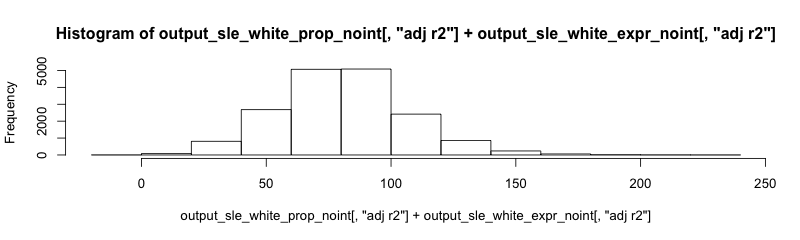

In [116]:
hist(output_sle_white_prop_noint[,"adj r2"]+output_sle_white_expr_noint[,"adj r2"])

In [117]:
df <- rbind(output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_broad_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 3, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster2 <- as.character(df_all_ifn$cluster);


In [118]:
df <- rbind(output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_broad_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 3, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);

df_all_ifn$cluster2 <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster2[which(df_all_ifn$cluster2 != "no_diff" & df_all_ifn$cluster == "Pan")] <- "pan";
df_all_ifn$cluster2[which(df_all_ifn$cluster2 != "no_diff" & df_all_ifn$cluster != "Pan")] <- "no_pan";
df_all_ifn$cluster2 <- factor(df_all_ifn$cluster2, levels=c("no_diff","no_pan","pan"));

##df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff")] <- "diff";
##df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","diff"));

df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]

##ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

sle_asian_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))
ggsave("sle_asian_diff_no_diff_histogram.png", sle_asian_p, dpi=300, height=3, width=3)

sle_asian_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("sle_asian_cluster_histogram.png", sle_asian_p, dpi=300, height=3, width=3)

sle_white_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))##+scale_color_manual(values=c("gray70", "black"))+scale_fill_manual(values=c("gray70", "black"))
ggsave("sle_white_diff_no_diff_histogram.png", sle_white_p, dpi=300, height=3, width=3)

sle_white_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("sle_white_cluster_histogram.png", sle_white_p, dpi=300, height=3, width=3)

broad_white_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))##+scale_color_manual(values=c("gray70", "black"))+scale_fill_manual(values=c("gray70", "black"))
ggsave("broad_white_diff_no_diff_histogram.png", broad_white_p, dpi=300, height=3, width=3)


broad_white_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("broad_white_cluster_histogram.png", broad_white_p, dpi=300, height=3, width=3)

# sle_asian_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("sle_asian_plot.png", ggMarginal(sle_asian_p, type="histogram"),dpi = 300, height=3, width=3)

# sle_white_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("sle_white_plot.png", ggMarginal(sle_white_p, type="histogram"),dpi = 300, height=3, width=3)

# broad_white_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("broad_white_plot.png", ggMarginal(broad_white_p, type="histogram"), dpi = 300, height=3, width=3)


Warning message:
“Removed 4203 rows containing non-finite values (stat_density).”Warning message:
“Removed 4203 rows containing non-finite values (stat_density).”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Removed 3815 rows containing non-finite values (stat_density).”Warning message:
“Removed 3815 rows containing non-finite values (stat_density).”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Removed 4064 rows containing non-finite values (stat_density).”Warning message:
“Removed 4064 rows containing non-finite values (stat_density).”Warning message:
“Groups with fewer than two data points have been dropped.”

In [119]:
# mean(df_all_ifn$prop[intersect(grep("healthy",df_all_ifn$type), which(df_all_ifn$cluster=="1"))])

In [120]:
# colMeans(output_prop_noint[match(pbmc_deseq_sig_genes,rownames(output_prop_noint)),],na.rm=T)


In [121]:
# output_prop_noint[match("IFI6",rownames(output_prop_noint)),]
# output_expr_noint[match("IFI6",rownames(output_expr_noint)),]

In [122]:
rst_sle <- NULL;
rst_ctrl <- NULL;
rst_sle_asian <- NULL;
rst_sle_white <- NULL;
rst <- NULL;

for ( i in unique(df_all_ifn[,"cluster"])) {
    print(i);
    
        rst <- rbind(rst,
                     c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_prop_noint)),],na.rm=T),cluster=i))

    rst_sle <- rbind(rst_sle,
                     c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_prop_noint)),],na.rm=T),cluster=i))
    
     rst_sle_asian <- rbind(rst_sle_asian,
                     c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster=i))
    
       rst_sle_white <- rbind(rst_sle_white,
                     c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_white_prop_noint)),],na.rm=T),cluster=i))
    
    rst_ctrl <- rbind(rst_ctrl,
                      c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster=i))
}

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_white_prop_noint)),],na.rm=T),cluster="diff"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                            rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster="diff"))

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_white_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                            rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster="cell_type"))

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint),cluster="all"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint),cluster="all"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint),cluster="all"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint),cluster="all"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint),cluster="all"))

# rst_sle <- rbind(rst_sle,
#                  c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                  rownames(output_sle_prop_noint)),],na.rm=T), cluster="no_diff"))
                 
# rst_ctrl <- rbind(rst_ctrl,
#                   c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                                   rownames(output_broad_healthy_prop_noint)),],na.rm=T), cluster="no_diff"))
rst
rst_sle
rst_ctrl

[1] "B"
[1] "cDC"
[1] "Lymph"
[1] "Misc"
[1] "Mono"
[1] "ncM"
[1] "no_diff"
[1] "Pan"
[1] "pDC"
[1] "T4"
[1] "T8"


cM                Th                B                 
 [1,] 1.85054392158752  1.53466315548912  19.6009246354943  
 [2,] 5.79242801067585  4.18729047009016  17.9208732315673  
 [3,] 3.59395264994277  -1.92734271870351 2.2569782860105   
 [4,] 20.7695919138684  2.64420409209834  2.09549676359012  
 [5,] 43.4866740895594  3.26092001515129  -0.64016036818062 
 [6,] 9.99448179738603  4.44628851602065  0.112921357298053 
 [7,] 6.88025940002918  1.90986791214812  2.96012422466198  
 [8,] 25.2582708277932  5.63632745890487  1.05436480540109  
 [9,] 0.638735625239015 1.15321155785608  0.0302096854780846
[10,] 0.874704581839687 41.2103638348251  0.350901001815089 
[11,] 1.74375237046343  7.93561720566483  0.398077836590981 
[12,] 25.3920992677089  6.7166647525828   0.959342652067742 
[13,] 25.4251627646293  6.98357161337382  0.935866590655973 
[14,] 7.106873908168    1.96871078835623  2.93563146029023  
      NK                   ncM                Tc                 
 [1,] 0.560925403267903    2.12992477342086   -0.0259115470113765
 [2,] -0.174459469694611   9.82436462285292   -1.42260935248509  
 [3,] 0.155157004830346    0.652104504642667  7.48857023359557   
 [4,] 0.460686047483726    2.20716145745438   0.687225763412701  
 [5,] -0.00595926515952015 6.37241361763943   -0.176912522953041 
 [6,] 0.353892616646493    10.5339393726048   1.05427778410518   
 [7,] 2.33062401662711     2.94667467855039   1.56464336041917   
 [8,] -0.0139958200124085  8.2619773466734    0.976682441789054  
 [9,] 1.21623568009434     -0.211569851338329 -0.774384034694088 
[10,] 0.465523059570218    1.54119702961978   0.15407274408229   
[11,] 14.2314564440018     0.625008320177831  21.2588908566588   
[12,] 1.31142266734261     5.14168969039737   2.56240315305207   
[13,] 1.63887899951268     4.37079509296447   2.95416944642294   
[14,] 2.31814736308465     2.97354517066908   1.57685753503738   
      cDC               pDC              total r2         adj r2          
 [1,] 1.21613858434258  3.49592202467262 30.3631309512635 27.2333840277248
 [2,] 6.88344114475446  3.61744800630727 46.6287766640683 44.2300699972848
 [3,] 2.27936357698601  7.70069020114793 22.1994737384523 18.7028208727647
 [4,] 2.65835680811181  2.10418971232367 33.6269125583432 30.6438524486058
 [5,] 0.939776506094412 3.17932642291886 56.4160784950702 54.4572505622643
 [6,] 1.33990919019792  4.05229196578402 31.8880026000431 28.8267892337529
 [7,] 0.982829697155209 5.24003447462037 24.8150577642115 21.4359592367604
 [8,] 8.09006191486656  3.36911596505961 52.6328049404754 50.5039422411709
 [9,] 2.10038569636813  68.7845232829591 72.9373476419623 71.7210486595786
[10,] 0.814609542678921 7.75931619661802 53.1706879910491 51.0659998108716
[11,] 1.14726551680806  3.20410432163729 50.5441728720029 48.3214390684975
[12,] 2.80264681052889  4.82138126774514 49.7076502614255 47.4473199360963
[13,] 1.49634425533958  5.18017622487921 48.9849649877779 46.6921544254309
[14,] 1.00510716730391  5.23490949021931 25.1197828831288 21.7543798666402
      adj prop_expr r2 cluster  
 [1,] 109.631613580667 B        
 [2,] 72.7121195225411 cDC      
 [3,] 73.0098563735145 Lymph    
 [4,] 85.2743770788726 Misc     
 [5,] 91.2806318809831 Mono     
 [6,] 112.692025411568 ncM      
 [7,] 83.0085590125911 no_diff  
 [8,] 87.0966202424095 Pan      
 [9,] 95.7478360655703 pDC      
[10,] 88.0738324587233 T4       
[11,] 101.177435257345 T8       
[12,] 89.116367544843  diff     
[13,] 89.6153639372089 cell_type
[14,] 83.0833283513622 all

cM                 Th                 B                 
 [1,] -0.972404756862312 -0.161855690118492 19.5956660525014  
 [2,] 1.84188263161071   2.6676773205123    23.943884775548   
 [3,] -1.12575564061826  3.27888523481035   2.88459064354962  
 [4,] 19.5708273634089   3.08911908956892   2.683357832985    
 [5,] 38.3779328908196   2.66665295151209   -0.7803805473641  
 [6,] 8.05991893079424   5.1086629504333    0.138602200011252 
 [7,] 5.67240715600838   1.66007610097251   3.72050082473422  
 [8,] 18.4425521234584   5.46289440816719   2.12826679262572  
 [9,] 0.822113518582869  0.0944945763725875 -0.167384768072571
[10,] -0.361635885604304 33.3607607038944   1.73230505224806  
[11,] 1.34505228532481   5.54283850651078   0.467340392665936 
[12,] 21.1786868319165   6.00548497304824   1.4968007732477   
[13,] 21.8546730540062   6.13953675966591   1.34079152140137  
[14,] 5.86222880350189   1.71327085099445   3.69327918188197  
      NK                  ncM                Tc                
 [1,] -0.0167295945594816 1.17769168773628   -0.22611206412762 
 [2,] 0.120820914431734   7.19810401537889   -2.94741191361529 
 [3,] 0.0845463441739078  0.956161807218332  8.3724710951868   
 [4,] 0.455617039948541   2.33794564574644   0.951602818598386 
 [5,] 0.284570589895249   5.68126634879408   -0.844255403689688
 [6,] 1.85522597248984    8.45724867274935   1.35076232312824  
 [7,] 2.55678641742797    3.03397984904746   2.20619100215504  
 [8,] 0.0561995981967034  5.30348504756923   0.454530937799084 
 [9,] 0.743941235238601   0.547358153313417  -2.54366818325994 
[10,] 0.801445277135811   0.736518679766431  0.701164890550665 
[11,] 14.0041389023769    0.0330871166355985 26.4039253538565  
[12,] 1.47339997838221    4.08476481900854   2.69434554955943  
[13,] 1.82353183701628    3.78366923312884   3.24771151246493  
[14,] 2.54352403579743    3.04684313658827   2.21216679405074  
      cDC               pDC                 total r2         adj r2          
 [1,] 0.665087146576956 0.00273656469915793 20.0640793458459 14.1972227840731
 [2,] 9.37813617204099  0.481775549771854   42.6848694656792 38.4782543805914
 [3,] 3.1656660495869   0.713681412269287   18.3302469461769 12.3361366303   
 [4,] 3.92341594447878  0.486393129295735   33.4982788640307 28.6174185971705
 [5,] 1.38508157626837  0.422479077156902   47.1933474833925 43.3176298674947
 [6,] 1.83556503743359  0.80167844734796    27.6076645343878 22.2944656011318
 [7,] 1.76339298823075  1.16049159889281    21.7738259374691 16.0324553640724
 [8,] 13.7474013891761  0.0500354427118631  45.6453657397043 41.6560347848203
 [9,] 5.60547723572784  62.2192423021827    67.3215740700855 64.9231574880734
[10,] 1.52460144165327  0.479744199182519   38.9749043588268 34.4959982567224
[11,] 1.82338679556001  0.66533351263648    50.285102865567  46.6363030758838
[12,] 4.51999590681032  1.28371660700936    42.7371954389823 38.5344207923021
[13,] 2.24028396410818  1.58850842407109    42.0187063058628 37.7631985117976
[14,] 1.79713821393458  1.16200006994725    22.0304510866966 16.3079153866376
      adj prop_expr r2 cluster  
 [1,] 96.3421528764488 B        
 [2,] 66.2339681631606 cDC      
 [3,] 57.3782880516491 Lymph    
 [4,] 88.6749762281596 Misc     
 [5,] 88.2672061150878 Mono     
 [6,] 115.810598167955 ncM      
 [7,] 78.5295793334411 no_diff  
 [8,] 92.8111819120224 Pan      
 [9,] 94.4690437488708 pDC      
[10,] 75.5199399577148 T4       
[11,] 95.8302975184465 T8       
[12,] 86.3651032333083 diff     
[13,] 84.7725426185672 cell_type
[14,] 78.6254986697832 all

cM               Th                 B                 NK                
 [1,] 6.19674066774595 0.38523809063263   42.0044883103649  3.86014606510034  
 [2,] 2.77504507843662 3.44149075981193   19.1542266355691  -0.12040917450708 
 [3,] 3.68402112202791 3.64412360647836   6.61897987175955  8.39979230554916  
 [4,] 6.14522732346559 0.847344411354237  1.94533617318436  1.6454238465274   
 [5,] 38.9525894044973 0.641791355867026  0.180741913099993 1.26271766661874  
 [6,] 1.07046701387534 2.38555192406104   2.83885198826042  -0.429338282557459
 [7,] 8.24557742194123 0.568804747311378  4.48259822527015  5.24699910779924  
 [8,] 4.90655236319698 0.0800448980857656 0.896756633598595 1.2588877086357   
 [9,] 2.06611738492251 -0.963516273464812 0.444731539780657 1.47357332678063  
[10,] -1.0771842625003 30.9320535956509   1.35669497850737  2.47119250645301  
[11,] 1.90286599412022 3.72633574460297   1.26161768867458  28.627182160646   
[12,] 17.9778980556567 3.56678059451632   1.95459472425386  4.22942926751571  
[13,] 21.2072893443821 4.42820941363446   2.21594295841575  4.96332777029783  
[14,] NaN              NaN                NaN               NaN               
      ncM               Tc                   cDC               
 [1,] 1.75573363540701  2.28039313856029     3.33220759915337  
 [2,] 5.20281467049575  -0.00728911721618562 12.1629490411366  
 [3,] 1.4291311105379   2.4494315004394      0.986396100822702 
 [4,] 1.61472326268288  2.03019052651471     1.6831560837853   
 [5,] 2.65717675036816  0.846294519379692    1.11651149170981  
 [6,] 17.044878466051   0.428430949030582    3.10426271984625  
 [7,] 2.97666927129583  2.05307975834929     2.00832500549167  
 [8,] 2.36657494600431  3.33353935942764     2.32517396145001  
 [9,] 0.292242546962172 0.384428859932383    0.0297297825604432
[10,] 3.17904781029046  1.23317357216917     2.3441079870679   
[11,] 0.418802506508425 9.25660376867388     0.878383189436013 
[12,] 2.57512816233267  2.2758317835585      1.81440126679732  
[13,] 2.62665307460203  2.01451579422613     1.68821036576548  
[14,] NaN               NaN                  NaN               
      pDC               total r2         adj r2             adj prop_expr r2
 [1,] 0.461584321479344 60.2765318284438 51.9136964239057   116.960762832367
 [2,] 1.91049337217332  44.5193212659    32.8391783745106   58.513453412448 
 [3,] 4.95953169133608  32.1714073089511 17.8917035845197   62.3449593988112
 [4,] 2.1961338976191   18.1075355251336 0.867016688319599  57.314091084664 
 [5,] 4.84999934844697  50.5078224499877 40.0884166499851   84.7018189846937
 [6,] 5.88795458260303  32.3310593611702 18.0849665951008   104.573794715513
 [7,] 4.37968543492972  29.9617389723885 15.216841913944    87.7545188267082
 [8,] 1.9594289061889   17.1269587765879 -0.319997270446234 32.7900973447906
 [9,] 62.2415414372902  65.9688486047642 58.8043956794514   96.4704834266469
[10,] 0.957567254510805 41.3966534421493 29.0591067983913   80.8203477098417
[11,] 3.54194643139599  49.6137374840581 39.0061032701755   83.9847114963427
[12,] 4.37795725790411  38.7720211125352 25.8819202941216   70.0087973057507
[13,] 4.9754760271514   44.1196247484751 32.3553352218383   79.2040055313997
[14,] NaN               NaN              NaN                NaN             
      cluster  
 [1,] B        
 [2,] cDC      
 [3,] Lymph    
 [4,] Misc     
 [5,] Mono     
 [6,] ncM      
 [7,] no_diff  
 [8,] Pan      
 [9,] pDC      
[10,] T4       
[11,] T8       
[12,] diff     
[13,] cell_type
[14,] all

In [123]:
rst_sle <- NULL;
rst_ctrl <- NULL;
rst_sle_asian <- NULL;
rst_sle_white <- NULL;
rst <- NULL;

for ( i in unique(df_all_ifn[,"cluster"])) {
    print(i);
    
        rst <- rbind(rst,
                     c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_expr_noint)),],na.rm=T),cluster=i))

    rst_sle <- rbind(rst_sle,
                     c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_expr_noint)),],na.rm=T),cluster=i))
    
     rst_sle_asian <- rbind(rst_sle_asian,
                     c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster=i))
    
       rst_sle_white <- rbind(rst_sle_white,
                     c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_white_expr_noint)),],na.rm=T),cluster=i))
    
    rst_ctrl <- rbind(rst_ctrl,
                      c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster=i))
}

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_white_expr_noint)),],na.rm=T),cluster="diff"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                            rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster="diff"))

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_white_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                            rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster="cell_type"))

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint),cluster="all"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint),cluster="all"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint),cluster="all"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint),cluster="all"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint),cluster="all"))

# rst_sle <- rbind(rst_sle,
#                  c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                  rownames(output_sle_expr_noint)),],na.rm=T), cluster="no_diff"))
                 
# rst_ctrl <- rbind(rst_ctrl,
#                   c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                                   rownames(output_broad_healthy_expr_noint)),],na.rm=T), cluster="no_diff"))
rst
rst_sle
rst_ctrl

[1] "B"
[1] "cDC"
[1] "Lymph"
[1] "Misc"
[1] "Mono"
[1] "ncM"
[1] "no_diff"
[1] "Pan"
[1] "pDC"
[1] "T4"
[1] "T8"


cM                Th                B                  NK               
 [1,] 0.411092000207177 0.712590126510261 76.41129080481     0.427185612243054
 [2,] 10.7737097204141  1.17861456484246  7.57317390490871   0.177072328522744
 [3,] 8.39439468045515  22.0617145855193  4.35906886318377   1.65547969449417 
 [4,] 37.2104789296012  1.06324492081995  5.06222666353204   0.785327627907732
 [5,] 29.6592493149471  1.12895065696006  0.757755584331871  0.351347395167856
 [6,] 6.49773865948745  6.55400585691531  0.0750221934999327 0.310390459573411
 [7,] 14.4020640280986  13.7985371404376  7.18263667623314   4.34494500694594 
 [8,] 18.3153792387693  2.67165452176121  2.47737207665367   0.664041167197548
 [9,] 1.35390488675129  0.34870408927647  1.92597016118542   0.699055589399289
[10,] 0.669209162904237 21.1558586710391  0.690466570499362  1.37790766351221 
[11,] 1.88911579745687  6.90694329877298  0.613793748914832  10.9510098006787 
[12,] 20.1196704223781  5.29515801261272  2.26816480981731   1.53453599888928 
[13,] 20.565436479505   5.9433176985878   2.21647830859892   1.74959942789547 
[14,] 14.4720566690263  13.6944421886476  7.12247568560604   4.31054110870665 
      ncM               Tc                 cDC               pDC             
 [1,] 1.00500242341929  0.0340452214722995 1.92300536736234  2.23108339249014
 [2,] 3.12096332187984  1.5852483801623    4.27840202683536  2.87090615832487
 [3,] 1.24246923340543  9.89618285214518   1.95203511540703  6.71097927180633
 [4,] 5.82747441074507  1.75043742374423   3.8426119609178   1.04009797771843
 [5,] 3.16537057728609  0.801407052332364  1.98024747162633  1.69632718784269
 [6,] 59.9894825061725  8.13329421129371   1.28129250190559  1.71797812540558
 [7,] 3.79801328752456  11.3936091093387   2.76346431879157  5.5421216159518 
 [8,] 2.52926514969502  2.9444793717695    8.40060893621979  1.31707418428058
 [9,] 0.365047739964116 0.758324579132764  8.00759526517878  13.8358501529104
[10,] 0.557469544948862 9.70387017348447   1.15265557729475  4.40973581544393
[11,] 0.662232242643497 31.1853642106818   0.867910241267223 1.80732593708338
[12,] 3.69804922968223  5.48131663530133   3.37535381197452  2.40565685545688
[13,] 3.98680764944378  6.10806466511508   2.13382019304334  2.67460080951221
[14,] 3.79678956768032  11.3212331996208   2.77095482419374  5.5037262741557 
      total r2         adj r2           adj prop_expr r2 cluster  
 [1,] 83.1552949485146 82.3982295529422 109.631613580667 B        
 [2,] 31.5580904058904 28.4820495252562 72.7121195225411 cDC      
 [3,] 56.2723242964164 54.3070355007497 73.0098563735145 Lymph    
 [4,] 56.5818999149865 54.6305246302668 85.2743770788726 Misc     
 [5,] 39.5406552404943 36.8233813187188 91.2806318809831 Mono     
 [6,] 84.5592045142535 83.8652361778154 112.692025411568 ncM      
 [7,] 63.2253911833219 61.5725997758308 83.0085590125911 no_diff  
 [8,] 39.3198746463466 36.5926780012386 87.0966202424095 Pan      
 [9,] 27.2944524637985 24.0267874059917 95.7478360655703 pDC      
[10,] 39.7171731791269 37.0078326478517 88.0738324587233 T4       
[11,] 54.8836952774993 52.8559961888475 101.177435257345 T8       
[12,] 44.1779057761124 41.6690476087466 89.116367544843  diff     
[13,] 45.3781252317016 42.923209511778  89.6153639372089 cell_type
[14,] 62.9922195176372 61.328948484722  83.0833283513622 all

cM                Th                 B                
 [1,] 0.457442549312375 0.0626081723734901 80.1076252218823 
 [2,] 12.7291593724306  0.989306568671613  7.16733950214502 
 [3,] 8.36340120847947  18.6786117029331   4.67115096987378 
 [4,] 40.1009088471168  1.50005996663157   5.17468335415096 
 [5,] 36.595899738836   1.16192643631302   1.02561724068022 
 [6,] 7.69111636619753  6.67405291097598   0.161472127665272
 [7,] 18.0565527334796  12.3648853296977   7.6843957694538  
 [8,] 23.4543502849313  3.67225407005193   3.23363534995851 
 [9,] 3.30028535841319  0.868788942859236  3.06053123740414 
[10,] 1.56329255686538  25.7158919683547   1.69502149239563 
[11,] 1.99926707470111  6.06050351356962   0.935008341169015
[12,] 24.400376232671   5.56566010399613   2.69342088733609 
[13,] 24.6341002903478  6.03344277120588   2.55995613774702 
[14,] 18.1342112726775  12.2816519454819   7.62329825963691 
      NK                  ncM               Tc                 cDC             
 [1,] 0.00287990426793742 0.986865229993454 0.0436015938720645 1.70312037769211
 [2,] 0.360032831009224   3.51582557343057  1.99559588592396   4.58010699019035
 [3,] 1.58464660434983    1.81319144512816  10.1014009528339   2.9093035037965 
 [4,] 0.834177739923647   6.28719241121251  2.05172636217641   6.05775686755077
 [5,] 0.650015174692391   4.07368473453399  1.10395237031529   3.63892938619173
 [6,] 1.55943601155597    65.2573406975757  9.9633979668489    2.06679348491037
 [7,] 4.68728413488967    4.51912423896211  12.2914400304691   3.58167224413299
 [8,] 0.800400946922756   2.75790591809379  3.78159093556871   16.1758877548994
 [9,] 0.480550041229511   0.446247301675015 2.62654109468238   8.71493495056102
[10,] 2.11635570242659    0.638855489637362 11.0905328822179   1.70252238314536
[11,] 11.3391207138252    0.490415684860605 29.4687909794697   1.79187472365896
[12,] 1.79817388996219    4.30229761811047  5.8500072101675    6.00569120408891
[13,] 2.04468249941899    4.68385321458517  6.36102770153896   3.49305440918279
[14,] 4.65191680771998    4.51646993456088  12.2125865971682   3.61134611060202
      pDC                 total r2         adj r2           adj prop_expr r2
 [1,] 0.00164652384509715 83.3657895732388 82.1449300923756 96.3421528764488
 [2,] 1.35812731295114    32.6954940367525 27.7557137825692 66.2339681631606
 [3,] 0.678246646169709   48.7999530335645 45.042151421349  57.3782880516491
 [4,] 0.782159252757105   62.7886648015197 60.0575576309891 88.6749762281596
 [5,] 0.463682704656558   48.7137077862192 44.9495762475931 88.2672061150878
 [6,] 0.585864364045883   93.9594739297756 93.5161325668234 115.810598167955
 [7,] 1.8760687040534     65.0614231851384 62.4971239693688 78.5295793334411
 [8,] 0.618940866625234   54.4949661270516 51.1551471272022 92.8111819120224
 [9,] 14.8653826323799    34.3632615592044 29.5458862607974 94.4690437488708
[10,] 0.534020220753441   45.0564926957963 41.0239417009924 75.5199399577148
[11,] 0.582928321218649   52.6679093524729 49.1939944425626 95.8302975184465
[12,] 0.782188119220545   51.3978152655528 47.8306824410062 86.3651032333083
[13,] 0.822519793391151   50.6326368174178 47.0093441067696 84.7725426185672
[14,] 1.86267785730525    64.8941587851527 62.3175832831456 78.6254986697832
      cluster  
 [1,] B        
 [2,] cDC      
 [3,] Lymph    
 [4,] Misc     
 [5,] Mono     
 [6,] ncM      
 [7,] no_diff  
 [8,] Pan      
 [9,] pDC      
[10,] T4       
[11,] T8       
[12,] diff     
[13,] cell_type
[14,] all

cM               Th                B                NK               
 [1,] 2.97047846169318 0.296136679016722 53.4815758649645 3.02277289041834 
 [2,] 9.27678688038589 2.01773098024682  12.3429269841192 0.726708906433128
 [3,] 5.75467629804092 16.0668957041611  6.44675704705845 6.86271254295575 
 [4,] 39.7451211071089 4.06058677815754  2.95754559480905 2.75533043041319 
 [5,] 35.6016120130136 1.42988526299029  1.88237723542994 1.76810040376328 
 [6,] 1.65069261549748 7.55493665502342  1.78621903124157 1.42636458499551 
 [7,] 13.628213597158  17.3318103825577  10.0823804610983 7.58291338870041 
 [8,] 17.2762438413118 5.78380573489455  2.95121045089586 2.34698607164812 
 [9,] 3.01943842439035 0.894758376017598 2.84323700758029 1.50988227479283 
[10,] 1.59960234167266 31.933059014106   1.90294521568162 3.56083578969232 
[11,] 2.39725452287187 4.63959950526853  1.38752718396214 11.7006350024668 
[12,] 22.3635620238402 6.51494528107746  3.05721738786355 3.32390872946438 
[13,] 23.6204288689355 6.69557975719324  3.08340733699674 3.56526609198369 
[14,] NaN              NaN               NaN              NaN              
      ncM               Tc                cDC              pDC              
 [1,] 6.23253478217391  0.836918817070943 3.92612174310695 0.359298229414516
 [2,] 3.44262974193068  1.18912644458304  8.511350854331   1.09322728278811 
 [3,] 2.4612456454412   10.4680724698008  1.59240125100169 4.46079819247653 
 [4,] 6.90364195395375  3.18084289560371  2.38257886612938 2.03584861428292 
 [5,] 5.35216943879564  1.83742015240627  2.84403757362724 3.53025202255908 
 [6,] 57.2524988293361  6.59073745776819  3.76161253809495 8.81553543099192 
 [7,] 6.09327058344627  13.0450149560394  4.45403125668244 5.09609847616622 
 [8,] 4.71793728320326  5.65933064877014  4.05500355322987 1.95260405472031 
 [9,] 0.702671858295068 1.42174438595631  16.2292003891432 21.8858354228119 
[10,] 4.79257037336764  12.400199556638   2.1933922407882  1.76798578620822 
[11,] 3.4181347788408   26.6936494043574  1.13784438659733 3.17290114159932 
[12,] 5.77359265448983  6.4125846411998   3.12176049704484 3.27637066419188 
[13,] 6.03440162857239  6.59868268638831  2.89119456551678 3.60341888535544 
[14,] NaN               NaN               NaN              NaN              
      total r2         adj r2           adj prop_expr r2 cluster  
 [1,] 71.1258374678591 65.047066408461  116.960762832367 B        
 [2,] 38.6004880748179 25.6742750379375 58.513453412448  cDC      
 [3,] 54.1135591509364 44.4532558142915 62.3449593988112 Lymph    
 [4,] 64.0214962404584 56.4470743963444 57.314091084664  Misc     
 [5,] 54.2458541025853 44.6134023347086 84.7018189846937 Mono     
 [6,] 88.8385971429491 86.4888281204121 104.573794715513 ncM      
 [7,] 77.3137331018487 72.5376769127642 87.7545188267082 no_diff  
 [8,] 44.7431216386739 33.1100946152369 32.7900973447906 Pan      
 [9,] 48.5067681389876 37.6660877471955 96.4704834266469 pDC      
[10,] 60.1505903181547 51.7612409114504 80.8203477098417 T4       
[11,] 54.5475459259642 44.9786082261671 83.9847114963427 T8       
[12,] 53.8439418791719 44.1268770116292 70.0087973057507 diff     
[13,] 56.092379820942  46.8486703095614 79.2040055313997 cell_type
[14,] NaN              NaN              NaN              all

In [126]:
# cor(colMeans(cm_expr_std), props[,"cM"])
# cor(colMeans(th_expr_std), props[,"Th"])
# cor(colMeans(tc_expr_std), props[,"Tc"])
# cor(colMeans(nk_expr_std), props[,"NK"])
# cor(colMeans(ncm_expr_std), props[,"ncM"])
# cor(colMeans(pdc_expr_std), props[,"pDC"])
# cor(colMeans(cdc_expr_std), props[,"cDC"])
# cor(colMeans(b_expr_std), props[,"B"])

## Plot stacked barcharts

In [ ]:
output_expr_noint["BLVRA",]

In [ ]:
source("helper_functions.R")

a <- plot_bar_chart(output_prop_noint, output_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
b <- plot_bar_chart(output_sle_prop_noint, output_sle_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
c <- plot_bar_chart(output_sle_asian_prop_noint, output_sle_asian_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
ggsave(c, file="sle_asian_partitioned.png",width=3)
d <- plot_bar_chart(output_sle_white_prop_noint, output_sle_white_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
ggsave(d, file="sle_white_partitioned.png",width=3);
e <- plot_bar_chart(output_ucsf_healthy_prop_noint, output_ucsf_healthy_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
f <- plot_bar_chart(output_broad_healthy_prop_noint, output_broad_healthy_expr_noint, pheatmap_pbmc_counts_out, cuttree_out)
ggsave(f, file="broad_white_partitioned.png",width=3);


In [ ]:
t(output_sle_prop_noint["C1QA",])
t(output_broad_healthy_prop_noint["C1QA",])
t(output_sle_expr_noint["C1QA",])
t(output_broad_healthy_expr_noint["C1QA",])

In [ ]:
t(output_sle_prop_noint["IL6",])
t(output_broad_healthy_prop_noint["IL6",])
t(output_sle_expr_noint["IL6",])
t(output_broad_healthy_expr_noint["IL6",])

In [ ]:
t(output_sle_prop_noint["IFNG",])
t(output_broad_healthy_prop_noint["IFNG",])
t(output_sle_expr_noint["IFNG",])
t(output_broad_healthy_expr_noint["IFNG",])

In [ ]:
t(output_sle_asian_prop_noint["CCR7",])
t(output_sle_white_prop_noint["CCR7",])
t(output_sle_prop_noint["CCR7",])
t(output_broad_healthy_prop_noint["CCR7",])
t(output_prop_noint["CCR7",])

In [ ]:
t(output_sle_asian_prop_noint["CD8B",])
t(output_sle_white_prop_noint["CD8B",])
t(output_broad_healthy_prop_noint["CD8B",])

In [ ]:
t(output_sle_asian_expr_noint["CD3E",])
t(output_sle_white_expr_noint["CD3E",])
t(output_broad_healthy_expr_noint["CD3E",])

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6);
plot(output_sle_white_prop_noint[,"cM"], output_sle_asian_prop_noint[,"cM"])
plot(output_sle_white_prop_noint[,"cM"], output_broad_healthy_prop_noint[,"cM"])

In [ ]:
a <- cbind(rownames(output_sle_white_noint_df)[output_sle_white_noint_df[,"cluster"]=="6"], output_sle_white_noint_df[output_sle_white_noint_df[,"cluster"]=="6","prop"]-output_broad_healthy_noint_df[output_sle_white_noint_df[,"cluster"]=="6","prop"])
a[order(as.numeric(a[,2]),decreasing=T),]

# Let's do the estimation using resampling

We are going to work with counts here. Given the expression of an arbitrary gene $i$ and individual $j$ in PBMCs $P$, and two cell types (B and T) for simplicity. $N_j^B$ and $N_j^T$ are the number of B cells and T cells for individual $j$.

\begin{align*}
P_{ij} &= B_{ij1}+B_{ij2}+...+B_{ijN_b}+T_{ij1}+T_{ij2}+...+T_{ijN_t} \\
P_{ij} &= \sum_k^{N_j^B}B_{ijk} + \sum_k^{N_j^T}T_{ijk} \\
P_{ij} &= N_j^B\times{\bar{B}_{ij}} + N_j^T\times{\bar{T}_{ij}} \\
\bar{P_{ij}} &= {{N_j^B}\over{N_j^{PBMC}}}\times{\bar{B_{ij}}} + {{N_j^T}\over{N_j^{PBMC}}}\times{\bar{T_{ij}}} \\
\bar{P_{ij}} &= {{{\rho}_j^B}\times{\bar{B_{ij}}} + {{\rho}_j^T}\times{\bar{T_{ij}}}}
\end{align*}


$\bar{B}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type B. $\bar{T}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type T

First, fit proportion

\begin{align*}
\bar{P_{ij}} &= {{\rho}_j^B}\times{\bar{B_{i}}} + {{\rho}_j^T}\times{\bar{T_{i}}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{B_{i}} = {{\sum_j^{J}\bar{B_{ij}}}\over{J}}$

Second, fit expression

\begin{align*}
\bar{P_{ij}} &= {\bar{{\rho}^B}}\times{B_{ij}} + {\bar{{\rho}^T}}\times{T_{ij}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{{\rho}^B} = {{{\sum_j^{J}{\rho_j^B}}}\over{J}}$


## First, let's do all individuals

In [ ]:
# ##joined_pivot_filtered <- joined_pivot[match(colnames(pbmc_expr),joined_pivot$ind_cov),]
# # cm_counts_mean <- sweep(exp(cm_expr), 2, joined_pivot_filtered$counts*cm_prop/100, "/")
# # th_counts_mean <- sweep(exp(th_expr), 2, joined_pivot_filtered$counts*th_prop/100, "/")
# # tc_counts_mean <- sweep(exp(tc_expr), 2, joined_pivot_filtered$counts*tc_prop/100, "/")
# # b_counts_mean <- sweep(exp(b_expr), 2, joined_pivot_filtered$counts*b_prop/100, "/")
# # nk_counts_mean <- sweep(exp(nk_expr), 2, joined_pivot_filtered$counts*nk_prop/100, "/")
# # ncm_counts_mean <- sweep(exp(ncm_expr), 2, joined_pivot_filtered$counts*ncm_prop/100, "/")
# # dc_counts_mean <- sweep(exp(dc_expr), 2, joined_pivot_filtered$counts*dc_prop/100, "/")
# # pbmc_counts_mean <- sweep(exp(pbmc_expr), 2, joined_pivot_filtered$counts, "/")

# cm_counts_mean <- exp(cm_expr)
# th_counts_mean <- exp(th_expr)
# tc_counts_mean <- exp(tc_expr)
# b_counts_mean <- exp(b_expr)
# nk_counts_mean <- exp(nk_expr)
# ncm_counts_mean <- exp(ncm_expr)
# dc_counts_mean <- exp(dc_expr)
# pbmc_counts_mean <- exp(pbmc_expr)


# ## some samples do not have b cells or dcs, let's set those means to 0
# b_counts_mean[is.nan(b_counts_mean)] <- 0;
# dc_counts_mean[is.nan(dc_counts_mean)] <- 0;
# b_counts_mean[!is.finite(b_counts_mean)] <- 0;
# dc_counts_mean[!is.finite(dc_counts_mean)] <- 0;

# # cm_counts_global_mean <- rowSums(exp(cm_expr))/sum(joined_pivot_filtered$counts*cm_prop/100, na.rm=T)
# # th_counts_global_mean <- rowSums(exp(th_expr))/sum(joined_pivot_filtered$counts*th_prop/100, na.rm=T)
# # tc_counts_global_mean <- rowSums(exp(tc_expr))/sum(joined_pivot_filtered$counts*tc_prop/100, na.rm=T)
# # b_counts_global_mean <- rowSums(exp(b_expr))/sum(joined_pivot_filtered$counts*b_prop/100, na.rm=T)
# # nk_counts_global_mean <- rowSums(exp(nk_expr))/sum(joined_pivot_filtered$counts*nk_prop/100, na.rm=T)
# # ncm_counts_global_mean <- rowSums(exp(ncm_expr))/sum(joined_pivot_filtered$counts*ncm_prop/100, na.rm=T)
# # dc_counts_global_mean <- rowSums(exp(dc_expr))/sum(joined_pivot_filtered$counts*dc_prop/100, na.rm=T)

# cm_counts_global_mean <- apply(exp(cm_expr),1,mean)
# th_counts_global_mean <- apply(exp(th_expr),1,mean)
# tc_counts_global_mean <- apply(exp(tc_expr),1,mean)
# b_counts_global_mean <- apply(exp(b_expr),1,mean)
# nk_counts_global_mean <- apply(exp(nk_expr),1,mean)
# ncm_counts_global_mean <- apply(exp(ncm_expr),1,mean)
# dc_counts_global_mean <- apply(exp(dc_expr),1,mean)


# a <- cbind(cm_counts_global_mean, th_counts_global_mean, tc_counts_global_mean, b_counts_global_mean, nk_counts_global_mean, ncm_counts_global_mean, dc_counts_global_mean)
# ##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

# output_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
#                                th_counts_global_mean[i]*th_prop/100, 
#                                b_counts_global_mean[i]*b_prop/100, 
#                                nk_counts_global_mean[i]*nk_prop/100, 
#                                ncm_counts_global_mean[i]*ncm_prop/100, 
#                                tc_counts_global_mean[i]*tc_prop/100,##), na.rm=T)
#                                dc_counts_global_mean[i]*dc_prop/100), na.rm=T)

#     output_direct_global_prop <- rbind(output_direct_global_prop, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
# }


# rownames(output_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_direct_global_prop) <- c("r2", "res")

# output_direct_global_expr <- NULL;

# cm_prop_global_mean <- sum(joined_pivot_filtered$counts*cm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# th_prop_global_mean <- sum(joined_pivot_filtered$counts*th_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# tc_prop_global_mean <- sum(joined_pivot_filtered$counts*tc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# b_prop_global_mean <- sum(joined_pivot_filtered$counts*b_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# nk_prop_global_mean <- sum(joined_pivot_filtered$counts*nk_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# ncm_prop_global_mean <- sum(joined_pivot_filtered$counts*ncm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# dc_prop_global_mean <- sum(joined_pivot_filtered$counts*dc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)

# a_prop <- c(cm_prop_global_mean, th_prop_global_mean, tc_prop_global_mean, b_prop_global_mean, nk_prop_global_mean, ncm_prop_global_mean, dc_prop_global_mean);

# for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
#                               th_counts_mean[i,]*th_prop_global_mean, 
#                               b_counts_mean[i,]*b_prop_global_mean,
#                               nk_counts_mean[i,]*nk_prop_global_mean, 
#                                ncm_counts_mean[i,]*ncm_prop_global_mean,
#                               tc_counts_mean[i,]*tc_prop_global_mean,##), na.rm=T)
#                               dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)

#     output_direct_global_expr <- rbind(output_direct_global_expr, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
# }

# rownames(output_direct_global_expr) <- expr_gene_names;
# colnames(output_direct_global_expr) <- c("r2", "res")

In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=10
# i=grep("^CD22$",expr_gene_names)[1]
# ##i=grep("ERAP2",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
#                                th_counts_global_mean[i]*th_prop/100,
#                                b_counts_global_mean[i]*b_prop/100,
#                                nk_counts_global_mean[i]*nk_prop/100, 
#                                ncm_counts_global_mean[i]*ncm_prop/100,
#                                tc_counts_global_mean[i]*tc_prop/100,
#                      dc_counts_global_mean[i]*dc_prop/100),na.rm=T)
# plot(log(predicted), log(pbmc_counts_mean[i,]))
# cor(log(predicted), pbmc_expr_std[i,])^2

# predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
#                               th_counts_mean[i,]*th_prop_global_mean, 
#                               b_counts_mean[i,]*b_prop_global_mean,
#                               nk_counts_mean[i,]*nk_prop_global_mean, 
#                                ncm_counts_mean[i,]*ncm_prop_global_mean,
#                               tc_counts_mean[i,]*tc_prop_global_mean,
#                           dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)
# plot(log(predicted), pbmc_expr_std[i,])
# cor(log(predicted), pbmc_expr_std[i,])^2


# predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop, 
#                               th_counts_mean[i,]*th_prop, 
#                               b_counts_mean[i,]*b_prop,
#                               nk_counts_mean[i,]*nk_prop, 
#                                ncm_counts_mean[i,]*ncm_prop,
#                               tc_counts_mean[i,]*tc_prop,
#                           dc_counts_mean[i,]*dc_prop), na.rm=T)
# plot(log(predicted), pbmc_expr_std[i,])
# cor(log(predicted), pbmc_expr_std[i,])^2

## Second, let's do SLE

Mean of means might be a bit unstable, let's calculate a global mean

### All SLE

In [ ]:
# # cm_sle_counts_mean <- sweep(exp(cm_sle_expr), 2, joined_pivot_sle$counts*cm_sle_prop/100, "/")
# # th_sle_counts_mean <- sweep(exp(th_sle_expr), 2, joined_pivot_sle$counts*th_sle_prop/100, "/")
# # tc_sle_counts_mean <- sweep(exp(tc_sle_expr), 2, joined_pivot_sle$counts*tc_sle_prop/100, "/")
# # b_sle_counts_mean <- sweep(exp(b_sle_expr), 2, joined_pivot_sle$counts*b_sle_prop/100, "/")
# # nk_sle_counts_mean <- sweep(exp(nk_sle_expr), 2, joined_pivot_sle$counts*nk_sle_prop/100, "/")
# # ncm_sle_counts_mean <- sweep(exp(ncm_sle_expr), 2, joined_pivot_sle$counts*ncm_sle_prop/100, "/")
# # dc_sle_counts_mean <- sweep(exp(dc_sle_expr), 2, joined_pivot_sle$counts*dc_sle_prop/100, "/")
# # pbmc_sle_counts_mean <- sweep(exp(pbmc_sle_expr), 2, joined_pivot_sle$counts, "/")


# cm_sle_counts_mean <- exp(cm_sle_expr);
# th_sle_counts_mean <- exp(th_sle_expr);
# tc_sle_counts_mean <- exp(tc_sle_expr);
# b_sle_counts_mean <- exp(b_sle_expr);
# nk_sle_counts_mean <- exp(nk_sle_expr);
# ncm_sle_counts_mean <- exp(ncm_sle_expr);
# dc_sle_counts_mean <- exp(dc_sle_expr);
# pbmc_sle_counts_mean <- exp(pbmc_sle_expr);

# # cm_sle_counts_global_mean <- rowSums(exp(cm_sle_expr))/sum(joined_pivot_sle$counts*cm_sle_prop/100, na.rm=T)
# # th_sle_counts_global_mean <- rowSums(exp(th_sle_expr))/sum(joined_pivot_sle$counts*th_sle_prop/100, na.rm=T)
# # tc_sle_counts_global_mean <- rowSums(exp(tc_sle_expr))/sum(joined_pivot_sle$counts*tc_sle_prop/100, na.rm=T)
# # b_sle_counts_global_mean <- rowSums(exp(b_sle_expr))/sum(joined_pivot_sle$counts*b_sle_prop/100, na.rm=T)
# # nk_sle_counts_global_mean <- rowSums(exp(nk_sle_expr))/sum(joined_pivot_sle$counts*nk_sle_prop/100, na.rm=T)
# # ncm_sle_counts_global_mean <- rowSums(exp(ncm_sle_expr))/sum(joined_pivot_sle$counts*ncm_sle_prop/100, na.rm=T)
# # dc_sle_counts_global_mean <- rowSums(exp(dc_sle_expr))/sum(joined_pivot_sle$counts*dc_sle_prop/100, na.rm=T)

# cm_sle_counts_global_mean <- apply(exp(cm_sle_expr),1,mean)
# th_sle_counts_global_mean <- apply(exp(th_sle_expr),1,mean)
# tc_sle_counts_global_mean <- apply(exp(tc_sle_expr),1,mean)
# b_sle_counts_global_mean <- apply(exp(b_sle_expr),1,mean)
# nk_sle_counts_global_mean <- apply(exp(nk_sle_expr),1,mean)
# ncm_sle_counts_global_mean <- apply(exp(ncm_sle_expr),1,mean)
# dc_sle_counts_global_mean <- apply(exp(dc_sle_expr),1,mean)


# ## some samples do not have b cells or dcs, let's set those means to 0
# b_sle_counts_mean[is.nan(b_sle_counts_mean)] <- 0;
# dc_sle_counts_mean[is.nan(dc_sle_counts_mean)] <- 0;
# b_sle_counts_mean[!is.finite(b_sle_counts_mean)] <- 0;
# dc_sle_counts_mean[!is.finite(dc_sle_counts_mean)] <- 0;

# ##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

# output_sle_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
#                                th_sle_counts_global_mean[i]*th_sle_prop/100,
#                                b_sle_counts_global_mean[i]*b_sle_prop/100,
#                                nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
#                                tc_sle_counts_global_mean[i]*tc_sle_prop/100,##), na.rm=T)
#                                dc_sle_counts_global_mean[i]*dc_sle_prop/100),na.rm=T)

#     output_sle_direct_global_prop <- rbind(output_sle_direct_global_prop, 
#                                                c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
# }


# rownames(output_sle_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_sle_direct_global_prop) <- c("r2", "res")

# output_sle_direct_global_expr <- NULL;

# cm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*cm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# th_sle_prop_global_mean <- sum(joined_pivot_sle$counts*th_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# tc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*tc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# b_sle_prop_global_mean <- sum(joined_pivot_sle$counts*b_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# nk_sle_prop_global_mean <- sum(joined_pivot_sle$counts*nk_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# ncm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*ncm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# dc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*dc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean,
#                               th_sle_counts_mean[i,]*th_sle_prop_global_mean,
#                               b_sle_counts_mean[i,]*b_sle_prop_global_mean,
#                               nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
#                               tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
#                               dc_sle_counts_mean[i]*dc_sle_prop_global_mean),na.rm=T)

#    ##output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, c(var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100))
#   output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, 
#                                          c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
# }

# rownames(output_sle_direct_global_expr) <- expr_gene_names;
# colnames(output_sle_direct_global_expr) <- c("r2", "res")

In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=2
# i=grep("^CD22$",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
#                                th_sle_counts_global_mean[i]*th_sle_prop/100,
#                                b_sle_counts_global_mean[i]*b_sle_prop/100,
#                                nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
#                                tc_sle_counts_global_mean[i]*tc_sle_prop/100,
#                           dc_sle_counts_global_mean[i]*dc_sle_prop/100), na.rm=T)
# plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
# cor(predicted, pbmc_sle_counts_mean[i,])^2
# output_sle_prop_noint[i,"adj r2"]

# predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean, 
#                               th_sle_counts_mean[i,]*th_sle_prop_global_mean, 
#                               b_sle_counts_mean[i,]*b_sle_prop_global_mean,
#                               nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
#                               tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
#                           dc_sle_counts_mean[i,]*dc_sle_prop_global_mean), na.rm=T)

# plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
# cor(predicted, pbmc_sle_counts_mean[i,])^2

# predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop, 
#                               th_sle_counts_mean[i,]*th_sle_prop, 
#                               b_sle_counts_mean[i,]*b_sle_prop,
#                               nk_sle_counts_mean[i,]*nk_sle_prop, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop,
#                               tc_sle_counts_mean[i,]*tc_sle_prop,
#                           dc_sle_counts_mean[i,]*dc_sle_prop), na.rm=T)
# plot(predicted, pbmc_sle_counts_mean[i,])
# cor(predicted, pbmc_sle_counts_mean[i,])^2



### Now, let's downsample to 46 and redo SLE

In [ ]:
# cm_sle_down_counts_global_mean <- apply(exp(cm_sle_expr[,samples]),1,mean)
# th_sle_down_counts_global_mean <- apply(exp(th_sle_expr[,samples]),1,mean)
# tc_sle_down_counts_global_mean <- apply(exp(tc_sle_expr[,samples]),1,mean)
# b_sle_down_counts_global_mean <- apply(exp(b_sle_expr[,samples]),1,mean)
# nk_sle_down_counts_global_mean <- apply(exp(nk_sle_expr[,samples]),1,mean)
# ncm_sle_down_counts_global_mean <- apply(exp(ncm_sle_expr[,samples]),1,mean)
# dc_sle_down_counts_global_mean <- apply(exp(dc_sle_expr[,samples]),1,mean)

# # cm_sle_down_counts_global_mean <- rowSums(exp(cm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples])
# # th_sle_down_counts_global_mean <- rowSums(exp(th_sle_expr[,samples]))/sum((joined_pivot_sle$counts*th_sle_prop/100)[samples])
# # tc_sle_down_counts_global_mean <- rowSums(exp(tc_sle_expr[,samples]))/sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples])
# # b_sle_down_counts_global_mean <- rowSums(exp(b_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)
# # nk_sle_down_counts_global_mean <- rowSums(exp(nk_sle_expr[,samples]))/sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples])
# # ncm_sle_down_counts_global_mean <- rowSums(exp(ncm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples])
# # dc_sle_down_counts_global_mean <- rowSums(exp(dc_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)

# output_sle_down_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),samples])) {    
#     predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop[samples]/100, 
#                                th_sle_counts_global_mean[i]*th_sle_prop[samples]/100, 
#                                b_sle_counts_global_mean[i]*b_sle_prop[samples]/100, 
#                                nk_sle_counts_global_mean[i]*nk_sle_prop[samples]/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop[samples]/100, 
#                                tc_sle_counts_global_mean[i]*tc_sle_prop[samples]/100,##), na.rm=T)
#                                dc_sle_counts_global_mean[i]*dc_sle_prop[samples]/100), na.rm=T)

#     output_sle_down_direct_global_prop <- rbind(output_sle_down_direct_global_prop,
#                                                 c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
# }


# rownames(output_sle_down_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_sle_down_direct_global_prop) <- c("r2", "res")

# output_sle_down_direct_global_expr <- NULL;

# cm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# th_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*th_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# tc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# b_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)
# nk_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# ncm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# dc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_sle_counts_mean[i,samples]*cm_sle_down_prop_global_mean,
#                               th_sle_counts_mean[i,samples]*th_sle_down_prop_global_mean, 
#                               b_sle_counts_mean[i,samples]*b_sle_down_prop_global_mean, 
#                               nk_sle_counts_mean[i,samples]*nk_sle_down_prop_global_mean,
#                               ncm_sle_counts_mean[i,samples]*ncm_sle_down_prop_global_mean, 
#                               tc_sle_counts_mean[i,samples]*tc_sle_down_prop_global_mean,##), na.rm=T)
#                               dc_sle_counts_mean[i,samples]*dc_sle_down_prop_global_mean), na.rm=T)

#     output_sle_down_direct_global_expr <- rbind(output_sle_down_direct_global_expr, 
#                                                 c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
  
# }


## Finally, processed the healthy

In [ ]:
# cm_healthy_counts_mean <- exp(cm_healthy_expr)
# th_healthy_counts_mean <- exp(th_healthy_expr)
# tc_healthy_counts_mean <- exp(tc_healthy_expr)
# b_healthy_counts_mean <- exp(b_healthy_expr)
# nk_healthy_counts_mean <- exp(nk_healthy_expr)
# ncm_healthy_counts_mean <- exp(ncm_healthy_expr)
# dc_healthy_counts_mean <- exp(dc_healthy_expr)
# pbmc_healthy_counts_mean <- exp(pbmc_healthy_expr)


# # cm_healthy_counts_mean <- sweep(exp(cm_healthy_expr), 2, joined_pivot_healthy$counts*cm_healthy_prop/100, "/")
# # th_healthy_counts_mean <- sweep(exp(th_healthy_expr), 2, joined_pivot_healthy$counts*th_healthy_prop/100, "/")
# # tc_healthy_counts_mean <- sweep(exp(tc_healthy_expr), 2, joined_pivot_healthy$counts*tc_healthy_prop/100, "/")
# # b_healthy_counts_mean <- sweep(exp(b_healthy_expr), 2, joined_pivot_healthy$counts*b_healthy_prop/100, "/")
# # nk_healthy_counts_mean <- sweep(exp(nk_healthy_expr), 2, joined_pivot_healthy$counts*nk_healthy_prop/100, "/")
# # ncm_healthy_counts_mean <- sweep(exp(ncm_healthy_expr), 2, joined_pivot_healthy$counts*ncm_healthy_prop/100, "/")
# # dc_healthy_counts_mean <- sweep(exp(dc_healthy_expr), 2, joined_pivot_healthy$counts*dc_healthy_prop/100, "/")
# # pbmc_healthy_counts_mean <- sweep(exp(pbmc_healthy_expr), 2, joined_pivot_healthy$counts, "/")

# cm_healthy_counts_global_mean <- apply(exp(cm_healthy_expr),1,mean)
# th_healthy_counts_global_mean <- apply(exp(th_healthy_expr),1,mean)
# tc_healthy_counts_global_mean <- apply(exp(tc_healthy_expr),1,mean)
# b_healthy_counts_global_mean <- apply(exp(b_healthy_expr),1,mean)
# nk_healthy_counts_global_mean <- apply(exp(nk_healthy_expr),1,mean)
# ncm_healthy_counts_global_mean <- apply(exp(ncm_healthy_expr),1,mean)
# dc_healthy_counts_global_mean <- apply(exp(dc_healthy_expr),1,mean)

# # cm_healthy_counts_global_mean <- rowSums(exp(cm_healthy_expr))/sum(joined_pivot_healthy$counts*cm_healthy_prop/100, na.rm=T)
# # th_healthy_counts_global_mean <- rowSums(exp(th_healthy_expr))/sum(joined_pivot_healthy$counts*th_healthy_prop/100, na.rm=T)
# # tc_healthy_counts_global_mean <- rowSums(exp(tc_healthy_expr))/sum(joined_pivot_healthy$counts*tc_healthy_prop/100, na.rm=T)
# # b_healthy_counts_global_mean <- rowSums(exp(b_healthy_expr))/sum(joined_pivot_healthy$counts*b_healthy_prop/100, na.rm=T)
# # nk_healthy_counts_global_mean <- rowSums(exp(nk_healthy_expr))/sum(joined_pivot_healthy$counts*nk_healthy_prop/100, na.rm=T)
# # ncm_healthy_counts_global_mean <- rowSums(exp(ncm_healthy_expr))/sum(joined_pivot_healthy$counts*ncm_healthy_prop/100, na.rm=T)
# # dc_healthy_counts_global_mean <- rowSums(exp(dc_healthy_expr))/sum(joined_pivot_healthy$counts*dc_healthy_prop/100, na.rm=T)

# ##healthy_counts_means <- cbind(cm_healthy_counts_mean, th_healthy_counts_mean, tc_healthy_counts_mean, b_healthy_counts_mean, nk_healthy_counts_mean, ncm_healthy_counts_mean, dc_healthy_counts_mean)

# output_healthy_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
#                                th_healthy_counts_global_mean[i]*th_healthy_prop/100,
#                                b_healthy_counts_global_mean[i]*b_healthy_prop/100,
#                                nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
#                                ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
#                                tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,##), na.rm=T)
#                                dc_healthy_counts_global_mean[i]*dc_healthy_prop/100),na.rm=T)

#     output_healthy_direct_global_prop <- rbind(output_healthy_direct_global_prop, 
#                                                c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
# }


# rownames(output_healthy_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_healthy_direct_global_prop) <- c("r2", "res")

# output_healthy_direct_global_expr <- NULL;

# cm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*cm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# th_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*th_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# tc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*tc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# b_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*b_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# nk_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*nk_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# ncm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*ncm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# dc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*dc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)

# for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean,
#                               th_healthy_counts_mean[i,]*th_healthy_prop_global_mean,
#                               b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,##), na.rm=T)
#                               dc_healthy_counts_mean[i]*dc_healthy_prop_global_mean),na.rm=T)

#    ##output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, c(var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100))
#   output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, 
#                                          c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
# }

# rownames(output_healthy_direct_global_expr) <- expr_gene_names;
# colnames(output_healthy_direct_global_expr) <- c("r2", "res")

In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=10
# i=grep("^CD22$",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
#                                th_healthy_counts_global_mean[i]*th_healthy_prop/100,
#                                b_healthy_counts_global_mean[i]*b_healthy_prop/100,
#                                nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
#                                ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
#                                tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,
#                           dc_healthy_counts_global_mean[i]*dc_healthy_prop/100), na.rm=T)
# plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
# cor(predicted, pbmc_healthy_counts_mean[i,])^2*100
# output_healthy_prop_noint[i,"adj r2"]

# predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean, 
#                               th_healthy_counts_mean[i,]*th_healthy_prop_global_mean, 
#                               b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,
#                           dc_healthy_counts_mean[i,]*dc_healthy_prop_global_mean), na.rm=T)
# plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
# cor(predicted, pbmc_healthy_counts_mean[i,])^2


# predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop, 
#                               th_healthy_counts_mean[i,]*th_healthy_prop, 
#                               b_healthy_counts_mean[i,]*b_healthy_prop,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop,
#                           dc_healthy_counts_mean[i,]*dc_healthy_prop), na.rm=T)
# plot(predicted, pbmc_healthy_counts_mean[i,])
# cor(predicted, pbmc_healthy_counts_mean[i,])^2

## Plotting

In [ ]:
# df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
#       prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
#       expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
#       sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
# rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

# df2

# df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
#              data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

# rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

# df3


# output_direct_global_df <- data.frame(prop=output_direct_global_prop[,1], expr=output_direct_global_expr[,1], type="all_direct")
# output_direct_global_df$cluster <- "no_diff";
# output_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_sle_direct_global_df <- data.frame(prop=output_sle_direct_global_prop[,1], expr=output_sle_direct_global_expr[,1], type="sle_direct")
# output_sle_direct_global_df$cluster <- "no_diff";
# output_sle_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_sle_down_direct_global_df <- data.frame(prop=output_sle_down_direct_global_prop[,1], expr=output_sle_down_direct_global_expr[,1], type="sle_down_direct")
# output_sle_down_direct_global_df$cluster <- "no_diff";
# output_sle_down_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_down_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_healthy_direct_global_df <- data.frame(prop=output_healthy_direct_global_prop[,1], expr=output_healthy_direct_global_expr[,1], type="healthy_direct")
# output_healthy_direct_global_df$cluster <- "no_diff";
# output_healthy_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_healthy_direct_global_df)))] <- cuttree_out[,"cluster"];

# df <- rbind(output_direct_global_df, output_sle_direct_global_df, output_sle_down_direct_global_df, output_healthy_direct_global_df)
# df$cluster <- as.factor(df$cluster)


# options(repr.plot.width = 10, repr.plot.height = 3)
# df_all_ifn <- df;
# df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
# df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
# df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
# df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
# ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)


# options(repr.plot.width = 9, repr.plot.height = 3)
# ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
#              aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
#              aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
#              aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

# df2 <- data.frame(cor=c(cor(output_direct_global_prop[,1], output_direct_global_expr[,1],use='complete.obs'), 
#                         cor(output_sle_direct_global_prop[,1], output_sle_direct_global_expr[,1],use='complete.obs'), 
#                         cor(output_sle_down_direct_global_prop[,1], output_sle_down_direct_global_expr[,1],use='complete.obs'),
#                         cor(output_healthy_direct_global_prop[,1], output_healthy_direct_global_expr[,1])),
#       prop_mean=c(mean(output_direct_global_prop[,1],na.rm=T), mean(output_sle_direct_global_prop[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1])),
#       expr_mean=c(mean(output_direct_global_expr[,1]), mean(output_sle_direct_global_expr[,1]), mean(output_sle_down_direct_global_expr[,1]), mean(output_healthy_direct_global_expr[,1])),
#       sum_mean = c(mean(output_direct_global_prop[,1]+output_direct_global_expr[,1],na.rm=T), mean(output_sle_direct_global_prop[,1]+output_sle_direct_global_expr[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1]+output_sle_down_direct_global_expr[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1]+output_healthy_direct_global_expr[,1])))
# rownames(df2) <- c("all_direct", "sle_direct", "sle_down_direct", "healthy_direct")

# df2


## Compare to previous estimates using linear regression

In [ ]:
# df <- rbind(data.frame(direct=output_direct_global_prop[,1], regression=output_prop_noint[,"adj r2"], type="all prop"),
#             data.frame(direct=output_direct_global_expr[,1], regression=output_expr_noint[,"adj r2"], type="all expr"),
            
#             data.frame(direct=output_sle_direct_global_prop[,1], regression=output_sle_prop_noint[,"adj r2"], type="sle prop"),
#             data.frame(direct=output_sle_direct_global_expr[,1], regression=output_sle_expr_noint[,"adj r2"], type="sle expr"),
            
#             data.frame(direct=output_sle_down_direct_global_prop[,1], regression=output_sle_down_prop_noint[,"adj r2"], type="sle down prop"),
#             data.frame(direct=output_sle_down_direct_global_expr[,1], regression=output_sle_down_expr_noint[,"adj r2"], type="sle down expr"),
            
#             data.frame(direct=output_healthy_direct_global_prop[,1], regression=output_healthy_prop_noint[,"adj r2"], type="healthy prop"),
#             data.frame(direct=output_healthy_direct_global_expr[,1], regression=output_healthy_expr_noint[,"adj r2"], type="healthy expr"))
  
# options(repr.plot.width = 8, repr.plot.height = 5)
# ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+xlim(0,100)+ylim(0,100)+geom_abline(slope=1, intercept=0,
#   na.rm = FALSE, show.legend = NA)
# ##ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+geom_abline(slope=1, intercept=0,
# ##  na.rm = FALSE, show.legend = NA)


In [ ]:
# cor(output_sle_direct_global_prop[,1], output_sle_prop_noint[,"adj r2"],use='complete.obs')
# cor(output_sle_direct_global_expr[,1], output_sle_expr_noint[,"adj r2"])

# cor(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"],use='complete.obs')
# cor(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])

# cor(output_healthy_direct_global_prop[,1], output_healthy_prop_noint[,"adj r2"])
# cor(output_healthy_direct_global_expr[,1], output_healthy_expr_noint[,"adj r2"])

In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"])
# plot(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])


In [ ]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(output_sle_down_direct_global_prop[,1], output_healthy_direct_global_prop[,1])
# plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
# plot(output_sle_down_direct_global_expr[,1], output_healthy_direct_global_expr[,1])
# plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])